<a href="https://colab.research.google.com/github/lianluoliang/data-science/blob/main/yinn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


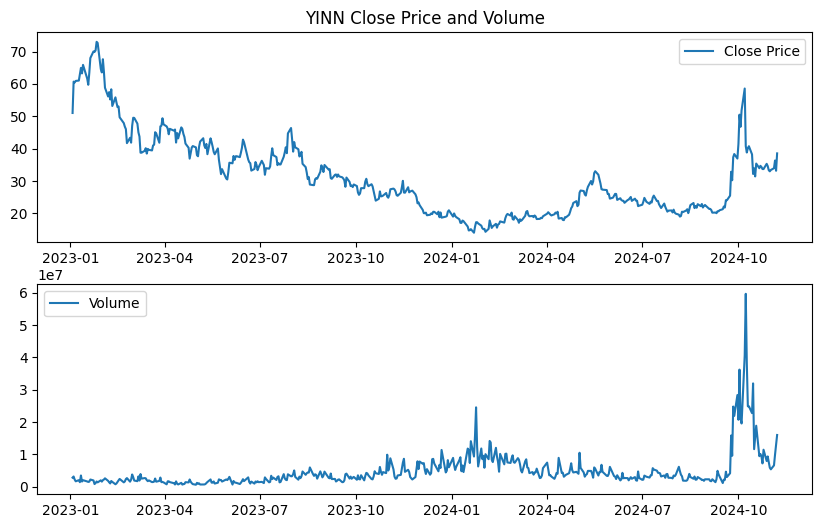

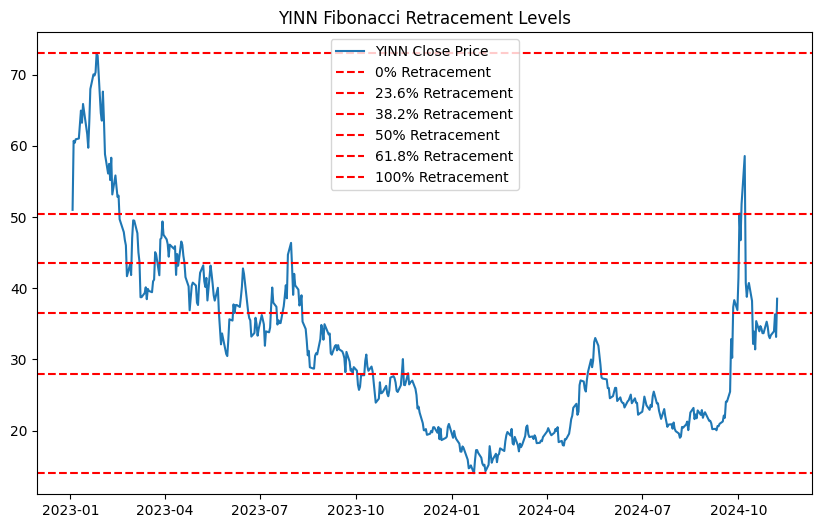

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Download YINN data
ticker = "YINN"
data = yf.download(ticker, start="2023-01-01", end="2024-11-08")
data = data.dropna()

# Volume Analysis
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(data['Close'], label='Close Price')
plt.title("YINN Close Price and Volume")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data['Volume'], label='Volume')
plt.legend()
plt.show()

# Fibonacci Retracement Levels
def fib_retracement_levels(data, high, low):
    diff = high - low
    levels = {
        "0%": low,
        "23.6%": low + 0.236 * diff,
        "38.2%": low + 0.382 * diff,
        "50%": low + 0.5 * diff,
        "61.8%": low + 0.618 * diff,
        "100%": high
    }
    return levels

# Find recent high and low
high = data['Close'].max()
low = data['Close'].min()

levels = fib_retracement_levels(data, high, low)

# Plot Close Price and Fibonacci Retracement Levels
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='YINN Close Price')
#The following loop has been modified to access the correct numerical values for the retracement levels
for level, value in levels.items():
    # Access the numerical value using .iloc[0] for plotting
    plt.axhline(y=value.iloc[0], color='r', linestyle='--', label=f'{level} Retracement')
plt.title("YINN Fibonacci Retracement Levels")
plt.legend()
plt.show()

In [ ]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.5/939.5 kB 14.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.1/101.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 59.2 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.7-cp310-cp310-linux_x86_64.whl size=830293 sha256=170def47bcb028058e7736cdcfb86c2f4a59a0b44c8d3ae54000102a7f270283
  Stored in directory: /root/.cache/pip/wheels/8d/0e/f8/48eb93a200fca4c502d7590613616fa4d2c9533f7308f9e28a
Successfully built peewee


In [ ]:
!apt-get update
!apt-get install -y build-essential wget

# Download TA-Lib source code
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz

# Build and install TA-Lib
%cd ta-lib
!./configure --prefix=/usr
!make
!sudo make install
%cd ..

# Now try installing the Python wrapper again:
!pip install TA-Lib

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:7 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
wget is already the newest version (1.21.2-2ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 1 not

[*********************100%***********************]  1 of 1 completed

Fibonacci Retracement Levels:
{'0%': Ticker
YINN    59.259998
dtype: float64, '23.6%': Ticker
YINN    48.604599
dtype: float64, '38.2%': Ticker
YINN    42.012699
dtype: float64, '50%': Ticker
YINN    36.684999
dtype: float64, '61.8%': Ticker
YINN    31.357299
dtype: float64, '100%': Ticker
YINN    14.11
dtype: float64}


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

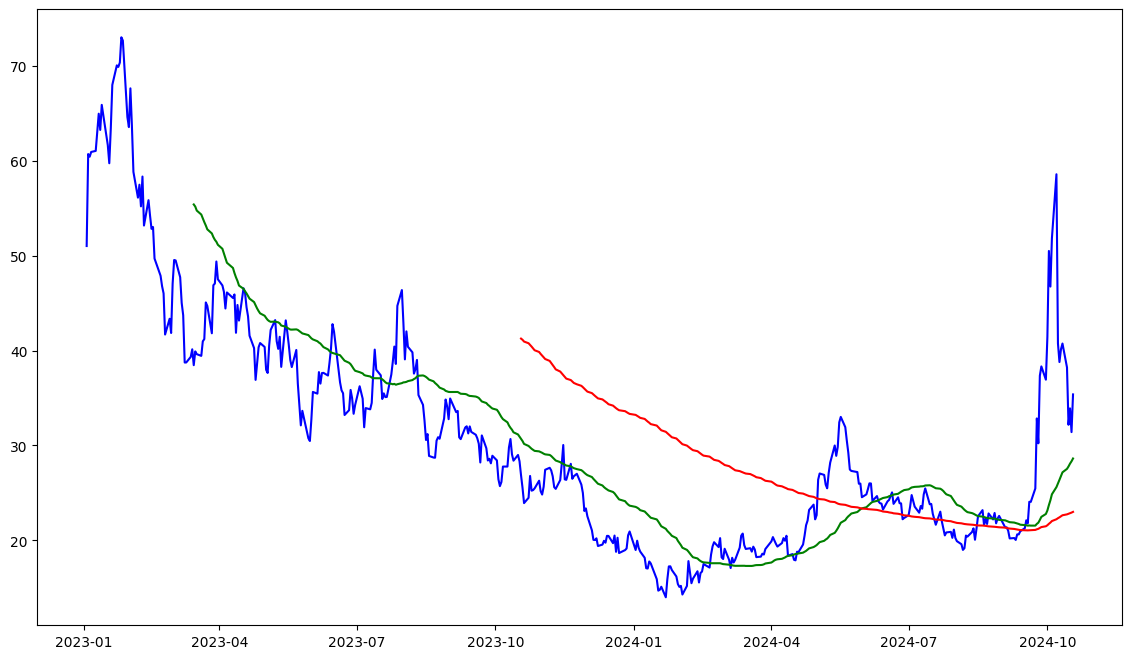

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import talib as ta
import matplotlib.pyplot as plt

# Step 1: Download YINN historical data
ticker = 'YINN'
data = yf.download(ticker, start='2023-01-01', end='2024-10-20')

# Drop missing values
data.dropna(inplace=True)

# Step 2: Calculate Technical Indicators
# 50-day and 200-day Moving Averages
data['MA50'] = ta.SMA(data['Close'].values.astype(np.float64).flatten(), timeperiod=50)
data['MA200'] = ta.SMA(data['Close'].values.astype(np.float64).flatten(), timeperiod=200)


# RSI (Relative Strength Index)
data['RSI'] = ta.RSI(data['Close'].values.astype(np.float64).flatten(), timeperiod=14)

# Step 3: Define Fibonacci Retracement Function
def fibonacci_retracement(high, low):
    diff = high - low
    return {
        '0%': high,
        '23.6%': high - 0.236 * diff,
        '38.2%': high - 0.382 * diff,
        '50%': high - 0.500 * diff,
        '61.8%': high - 0.618 * diff,
        '100%': low,
    }

# Calculate Fibonacci retracement for the last 6 months of data
# Use .iloc[-1] to get the last value (numerical) from the Series:
high_level = data['High'][-180:].max()
low_level = data['Low'][-180:].min()
fib_levels = fibonacci_retracement(high_level, low_level)

print(f"Fibonacci Retracement Levels:\n{fib_levels}")

# Step 4: Plot the Data with Technical Indicators and Fibonacci Levels
plt.figure(figsize=(14,8))

# Plot Close Price
plt.plot(data['Close'], label='Close Price', color='blue')

# Plot Moving Averages
plt.plot(data['MA50'], label='50-Day MA', color='green')
plt.plot(data['MA200'], label='200-Day MA', color='red')

# Plot Fibonacci Retracement Levels
# Access the numerical values in fib_levels for plotting:
for level, value in fib_levels.items():
    plt.axhline(value, linestyle='--', alpha=0.6, label=f'Fibonacci {level}')

plt.title('YINN Price with Fibonacci Retracement Levels, Moving Averages, and RSI')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot RSI separately
plt.figure(figsize=(14,4))
plt.plot(data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red', alpha=0.6)  # Overbought
plt.axhline(30, linestyle='--', color='green', alpha=0.6)  # Oversold
plt.title('RSI (Relative Strength Index)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Generate Buy and Sell Signals
# Buy when Close < 38.2% Fibonacci and RSI < 30, and price > MA50 (indicating bullish momentum)
# Sell when Close > 23.6% Fibonacci and RSI > 70, and price < MA50 (indicating bearish momentum)
data['Buy_Signal'] = np.where((data['Close'] < fib_levels['38.2%']) & (data['RSI'] < 30) & (data['Close'] > data['MA50']), 1, 0)
data['Sell_Signal'] = np.where((data['Close'] > fib_levels['23.6%']) & (data['RSI'] > 70) & (data['Close'] < data['MA50']), 1, 0)

# Step 6: Backtesting the Strategy
capital = 10000  # Example initial capital
position = 0     # No initial position
portfolio_value = capital

# Empty lists to store trading actions
buy_signals = []
sell_signals = []

for i in range(1, len(data)):
    if data['Buy_Signal'].iloc[i] == 1 and position == 0:  # Buy condition
        position = portfolio_value / data['Close'].iloc[i]
        portfolio_value = 0
        buy_signals.append((data.index[i], data['Close'].iloc[i]))
        print(f"Buying at {data.index[i]}, Price: {data['Close'].iloc[i]}")

    if data['Sell_Signal'].iloc[i] == 1 and position > 0:  # Sell condition
        portfolio_value = position * data['Close'].iloc[i]
        position = 0
        sell_signals.append((data.index[i], data['Close'].iloc[i]))
        print(f"Selling at {data.index[i]}, Price: {data['Close'].iloc[i]}")

# If position is still open at the end, sell at the last available price
if position > 0:
    portfolio_value = position * data['Close'].iloc[-1]
    position = 0
    print(f"Selling remaining position at the end, Price: {data['Close'].iloc[-1]}")

print(f"Final Portfolio Value: ${portfolio_value:.2f}")

# Step 7: Summary of Trades
print(f"Number of Buy Signals: {len(buy_signals)}")
print(f"Number of Sell Signals: {len(sell_signals)}")
print("Buy signals:", buy_signals)
print("Sell signals:", sell_signals)

[*********************100%***********************]  1 of 1 completed


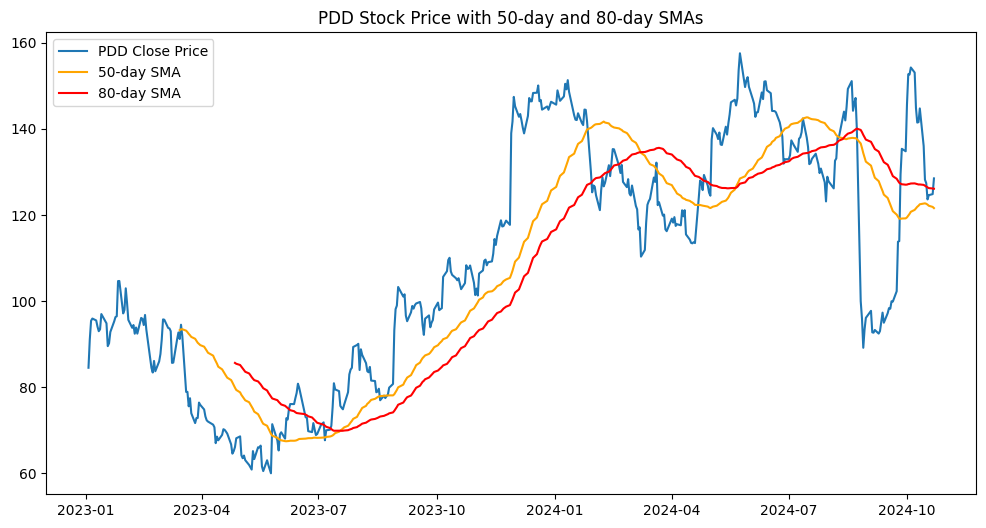

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download PDD data
ticker = "PDD"
data = yf.download(ticker, start="2023-01-01", end="2024-10-23")
data['50_SMA'] = data['Close'].rolling(window=50).mean()
data['200_SMA'] = data['Close'].rolling(window=80).mean()

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='PDD Close Price')
plt.plot(data['50_SMA'], label='50-day SMA', color='orange')
plt.plot(data['200_SMA'], label='80-day SMA', color='red')
plt.legend()
plt.title('PDD Stock Price with 50-day and 80-day SMAs')
plt.show()


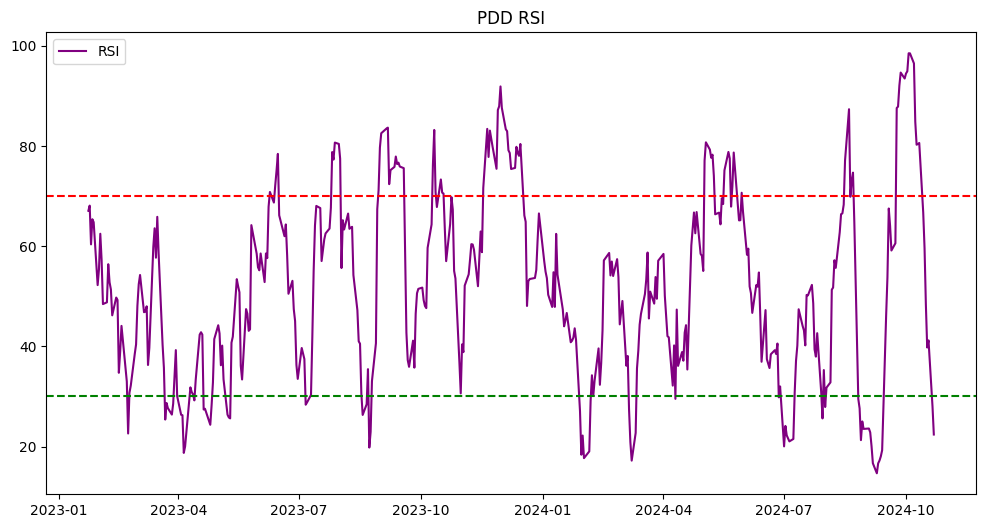

In [ ]:
import pandas as pd

def calculate_rsi(data, window):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate 14-day RSI
data['RSI'] = calculate_rsi(data, window=14)

# Plotting the RSI
plt.figure(figsize=(12, 6))
plt.plot(data['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.legend()
plt.title('PDD RSI')
plt.show()


In [ ]:
def calculate_bollinger_bands(data, window, num_std_dev):
    data['Middle_Band'] = data['Close'].rolling(window=window).mean()
    data['Upper_Band'] = data['Middle_Band'] + (data['Close'].rolling(window=window).std() * num_std_dev)
    data['Lower_Band'] = data['Middle_Band'] - (data['Close'].rolling(window=window).std() * num_std_dev)
    return data

# Calculate Bollinger Bands
data = calculate_bollinger_bands(data, window=20, num_std_dev=2)

# Plotting Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='PDD Close Price', color='black')
plt.plot(data['Middle_Band'], label='Middle Band', color='orange')
plt.plot(data['Upper_Band'], label='Upper Band', color='green')
plt.plot(data['Lower_Band'], label='Lower Band', color='red')
plt.legend()
plt.title('PDD Bollinger Bands')
plt.show()


ValueError: Cannot set a DataFrame with multiple columns to the single column Upper_Band

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Download PDD data
ticker = "YINN"
data = yf.download(ticker, start="2023-01-01", end="2024-10-23")

# Calculate Bollinger Bands
def calculate_bollinger_bands(data, window, num_std_dev):
    data['Middle_Band'] = data['Close'].rolling(window=window).mean()
    data['Upper_Band'] = data['Middle_Band'] + (data['Close'].rolling(window=window).std() * num_std_dev)
    data['Lower_Band'] = data['Middle_Band'] - (data['Close'].rolling(window=window).std() * num_std_dev)
    return data

data = calculate_bollinger_bands(data, window=20, num_std_dev=2)

# Calculate RSI
def calculate_rsi(data, window):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data, window=14)

# Plot Bollinger Bands, RSI, and Volume
plt.figure(figsize=(12, 8))

# Plot close price and Bollinger Bands
plt.subplot(3, 1, 1)
plt.plot(data['Close'], label='Close Price')
plt.plot(data['Middle_Band'], label='Middle Band', color='orange')
plt.plot(data['Upper_Band'], label='Upper Band', color='green')
plt.plot(data['Lower_Band'], label='Lower Band', color='red')
plt.title('YINN Close Price and Bollinger Bands')
plt.legend()

# Plot RSI
plt.subplot(3, 1, 2)
plt.plot(data['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('YINN RSI')
plt.legend()

# Plot Volume
plt.subplot(3, 1, 3)
plt.plot(data['Volume'], label='Volume', color='blue')
plt.title('YINN Volume')
plt.legend()

plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed


ValueError: Cannot set a DataFrame with multiple columns to the single column Upper_Band

[*********************100%***********************]  1 of 1 completed


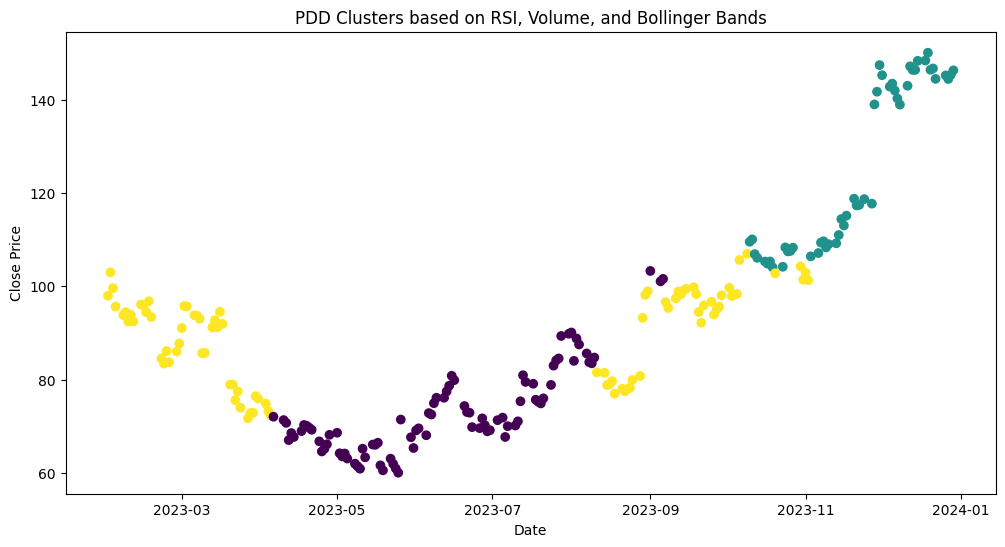

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering

# Step 1: Data Collection
ticker = "PDD"
data = yf.download(ticker, start="2023-01-01", end="2024-01-01")

# Step 2: Feature Engineering
def calculate_rsi(data, window):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_bollinger_bands(data, window, num_std_dev):
    data['Middle_Band'] = data['Close'].rolling(window=window).mean()
    data['Upper_Band'] = data['Middle_Band'] + (data['Close'].rolling(window=window).std() * num_std_dev)
    data['Lower_Band'] = data['Middle_Band'] - (data['Close'].rolling(window=window).std() * num_std_dev)
    return data

data['RSI'] = calculate_rsi(data, window=14)
data = calculate_bollinger_bands(data, window=20, num_std_dev=2)

# Step 3: Normalize the Data
features = data[['RSI', 'Volume', 'Upper_Band', 'Middle_Band', 'Lower_Band']].dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 4: Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
data['Cluster'] = pd.Series(clusters, index=features.index)

# Step 5: Visualize the Clusters with Centroids
plt.figure(figsize=(12, 6))
plt.scatter(data.index, data['Close'], c=data['Cluster'], cmap='viridis')
plt.title('PDD Clusters based on RSI, Volume, and Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


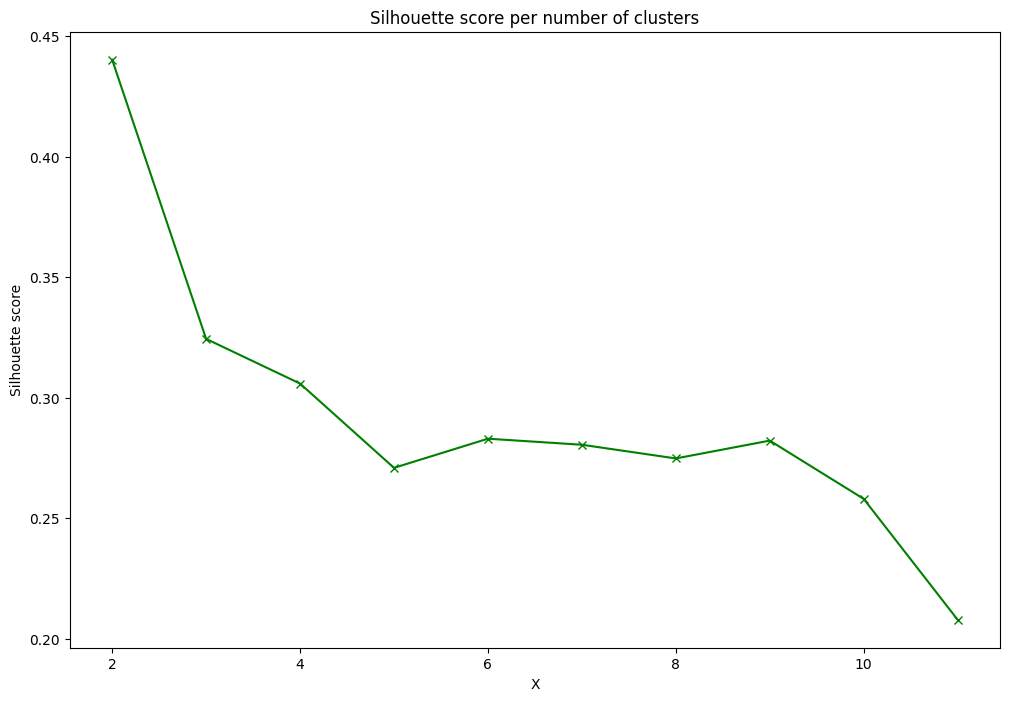

In [ ]:
from sklearn.cluster import AgglomerativeClustering
possible_k_values = range(2,12) # Start from k=2 instead of k=1
# Reshape the data to 2D before clustering
X_reshaped = X.reshape(X.shape[0], -1)  # Reshape to (n_samples, n_features)

def silhousette_score_agglomerative(k,data):
  agg=AgglomerativeClustering(n_clusters=k, linkage='ward').fit(data)
  silhou_score = silhouette_score(data, agg.labels_)
  return silhou_score

silhouette_score_per_k=[]
for k in possible_k_values:
  silhou_score = silhousette_score_agglomerative(k,X_reshaped)
  silhouette_score_per_k.append(silhou_score)

fig, ax=plt.subplots(figsize=(12,8))
plt.plot(possible_k_values, silhouette_score_per_k, 'gx-')
plt.xlabel('X')
plt.ylabel('Silhouette score')
plt.title('Silhouette score per number of clusters')
plt.show()

ValueError: x and y must be the same size

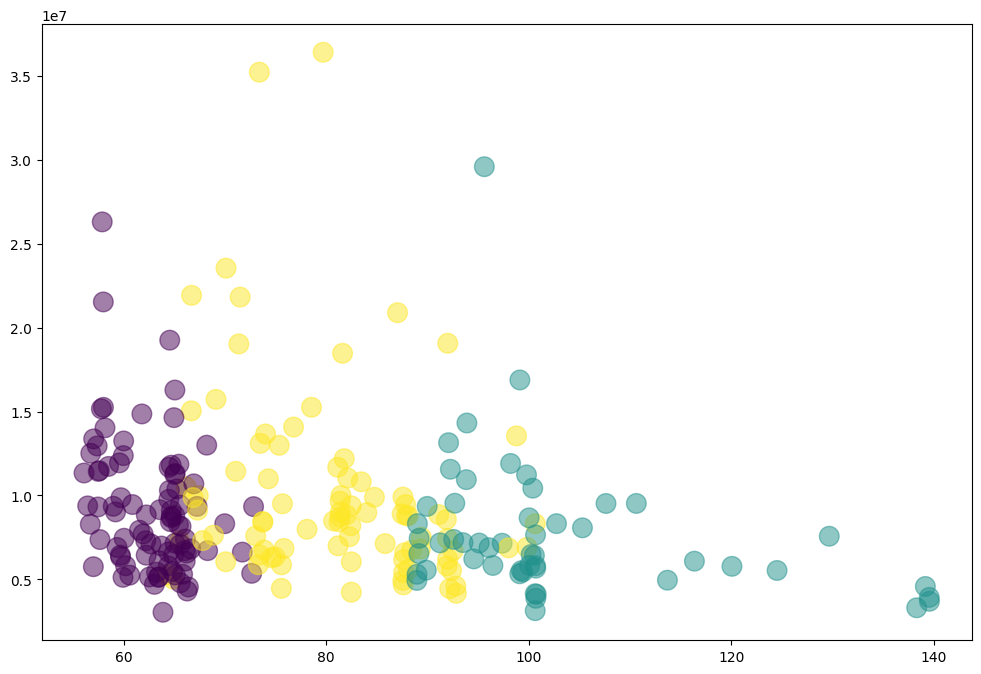

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(features['Lower_Band'], features['Volume'],s=200,c=data.loc[features.index, 'Cluster'],cmap='viridis', alpha=0.5)
plt.scatter(centroids[1,0], centroids[:1],c='k', s=250, marker='s')
for i in range(len(centroids)):
  plt.annotates(i, (centroids[i][0]+7, centroids[i][i]+7),fontsize=30)
plt.xlabel('RSI')
plt.ylabel('Volume')
plt.title('PDD Clusters based on RSI and Volume')
plt.show()
# The key change is to align the 'c' argument with the 'x' and 'y' arguments using .loc:
# data.loc[features.index, 'Cluster'] selects the 'Cluster' values from 'data' that correspond to the indices in 'features'
# This ensures that 'c' has the same number of elements as 'x' and 'y', resolving the ValueError.

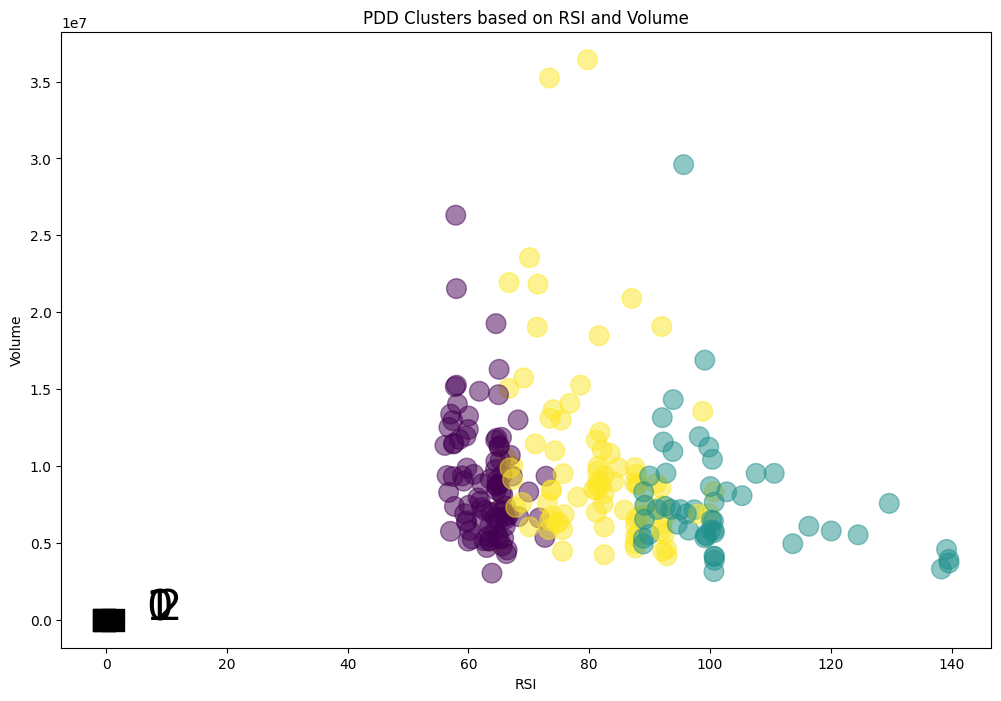

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(features['Lower_Band'], features['Volume'],s=200,c=data.loc[features.index, 'Cluster'],cmap='viridis', alpha=0.5)
plt.scatter(centroids[:,0], centroids[:,1],c='k', s=250, marker='s') # Change this line
for i in range(len(centroids)):
  plt.annotate(i, (centroids[i][0]+7, centroids[i][1]+7),fontsize=30) #Change this line too
plt.xlabel('RSI')
plt.ylabel('Volume')
plt.title('PDD Clusters based on RSI and Volume')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# Silhouette Score
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.37158391482705583


In [ ]:
centroids[:,0],

(array([-0.29032132, -0.43072481,  1.18647585]),)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf

# Step 1: Data Collection
data = yf.download("PDD", start="2023-01-01", end="2024-10-26")
data['Open'] = data['Open'].astype(float)
data['Close'] = data['Close'].astype(float)

# Step 2: Data Preprocessing
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(data[['Open']])

# Create input-output sequences
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:(i + seq_len), 0])
        y.append(data[i + seq_len, 0])
    return np.array(X), np.array(y)

seq_len = 10
X, y = create_sequences(scaled_data, seq_len)

# Convert to PyTorch tensors
X = torch.FloatTensor(X).unsqueeze(2)  # Shape: [batch_size, seq_len, 1]
y = torch.FloatTensor(y).unsqueeze(1)  # Shape: [batch_size, 1]

# Step 3: Build Transformer Model
class StockPriceTransformer(nn.Module):
    def __init__(self, d_model, nhead, num_layers, dropout):
        super(StockPriceTransformer, self).__init__()
        self.input_linear = nn.Linear(1, d_model)
        self.transformer = nn.Transformer(d_model, nhead, num_layers, dropout=dropout, batch_first=True)
        self.output_linear = nn.Linear(d_model, 1)

    def forward(self, src, tgt):
        src = self.input_linear(src)
        tgt = self.input_linear(tgt)
        if tgt.dim() == 2:
            tgt = tgt.unsqueeze(1)
        elif tgt.dim() == 1:
            tgt = tgt.unsqueeze(0).unsqueeze(0)
        tgt = tgt.repeat(1, src.shape[1], 1)
        output = self.transformer(src, tgt)
        output = self.output_linear(output[:, -1, :])  # Last time step
        return output

d_model = 64
nhead = 4
num_layers = 2
dropout = 0.1
model = StockPriceTransformer(d_model, nhead, num_layers, dropout)

# Step 4: Train the Model
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 100

for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(X, X[:, -1, :])  # Use last time step of X as tgt
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")

# Step 5: Predict Future Prices
def predict_future(model, X, future_steps):
    model.eval()
    predictions = []
    current_sequence = X[-1].unsqueeze(0)
    for _ in range(future_steps):
        with torch.no_grad():
            prediction = model(current_sequence, current_sequence[:, -1, :].unsqueeze(1))
        predictions.append(prediction.item())
        current_sequence = torch.cat((current_sequence[:, 1:, :], prediction.unsqueeze(0).unsqueeze(2)), dim=1)
    return predictions

future_steps = 6
predictions = predict_future(model, X, future_steps)
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

print("Predicted Open Prices for the Next 6 Days:")
print(predictions)


[*********************100%***********************]  1 of 1 completed


Epoch 1/100, Loss: 0.5203234553337097
Epoch 2/100, Loss: 5.736114025115967
Epoch 3/100, Loss: 0.5734121799468994
Epoch 4/100, Loss: 0.4948248863220215
Epoch 5/100, Loss: 0.17546412348747253
Epoch 6/100, Loss: 0.23504860699176788
Epoch 7/100, Loss: 0.32106533646583557
Epoch 8/100, Loss: 0.289898157119751
Epoch 9/100, Loss: 0.20358015596866608
Epoch 10/100, Loss: 0.1465536206960678
Epoch 11/100, Loss: 0.14911344647407532
Epoch 12/100, Loss: 0.14284545183181763
Epoch 13/100, Loss: 0.12543360888957977
Epoch 14/100, Loss: 0.07804711908102036
Epoch 15/100, Loss: 0.047386765480041504
Epoch 16/100, Loss: 0.05229262262582779
Epoch 17/100, Loss: 0.08709493279457092
Epoch 18/100, Loss: 0.08769998699426651
Epoch 19/100, Loss: 0.07701016962528229
Epoch 20/100, Loss: 0.06265537440776825
Epoch 21/100, Loss: 0.06059688329696655
Epoch 22/100, Loss: 0.06130814179778099
Epoch 23/100, Loss: 0.058659784495830536
Epoch 24/100, Loss: 0.05601528659462929
Epoch 25/100, Loss: 0.04639357700943947
Epoch 26/100, L

RuntimeError: Tensors must have same number of dimensions: got 3 and 4

Data fetched successfully!
Data shape after selecting features: (1574, 5)
Total sequences created: 1539
Using device: cuda

--- Fold 1 ---
Epoch 1/100, Train Loss: 0.034421, Validation Loss: 0.029953
Initial validation loss set to 0.029953.
Epoch 2/100, Train Loss: 0.032231, Validation Loss: 0.029121
Validation loss decreased to 0.029121. Resetting patience.
Epoch 3/100, Train Loss: 0.028494, Validation Loss: 0.028653
Validation loss decreased to 0.028653. Resetting patience.
Epoch 4/100, Train Loss: 0.027431, Validation Loss: 0.028447
Validation loss decreased to 0.028447. Resetting patience.
Epoch 5/100, Train Loss: 0.032147, Validation Loss: 0.028453
No improvement in validation loss for 1 epochs.
Epoch 6/100, Train Loss: 0.025099, Validation Loss: 0.028644
No improvement in validation loss for 2 epochs.
Epoch 7/100, Train Loss: 0.026057, Validation Loss: 0.028883
No improvement in validation loss for 3 epochs.
Epoch 8/100, Train Loss: 0.024748, Validation Loss: 0.029117
No improvem

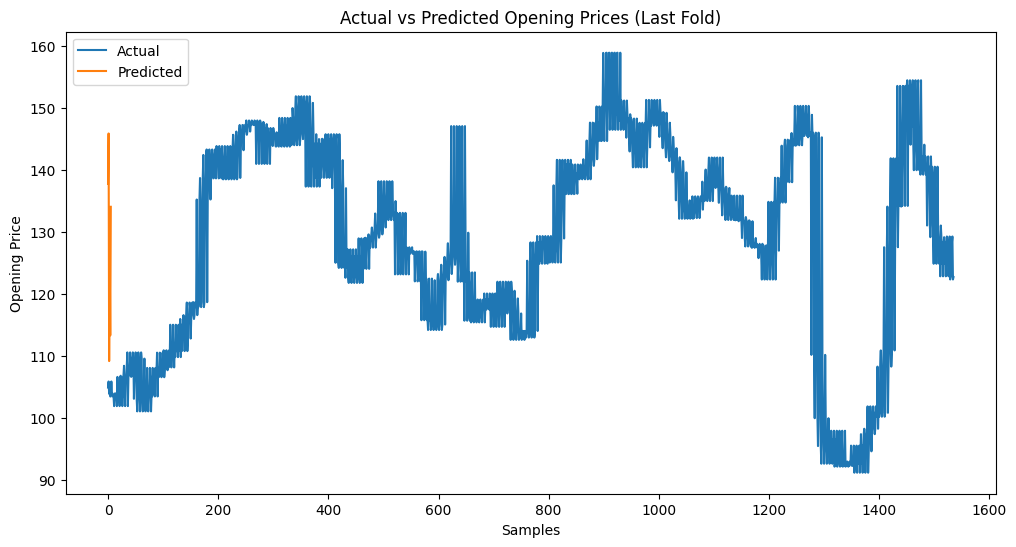

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error,median_absolute_error
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 1. Fetch historical data for PDD
def fetch_data(ticker="PDD", period="max"):
    pdd = yf.Ticker(ticker)
    data = pdd.history(period=period)
    return data

data = fetch_data()
print("Data fetched successfully!")

# 2. Select relevant features
features = ['Open', 'High', 'Low', 'Close', 'Volume']
data = data[features].dropna()
print(f"Data shape after selecting features: {data.shape}")

# 3. Scale the data using separate scalers for 'Open' and other features
scaler_open = MinMaxScaler(feature_range=(0, 1))
scaler_other = MinMaxScaler(feature_range=(0, 1))

scaled_open = scaler_open.fit_transform(data[['Open']])
scaled_other = scaler_other.fit_transform(data[['High', 'Low', 'Close', 'Volume']])

scaled_data = np.hstack([scaled_open, scaled_other])
scaled_df = pd.DataFrame(scaled_data, columns=['Open','High','Low','Close','Volume'])

# 4. Parameters for sequence creation
SEQ_LENGTH = 30  # Number of past days to consider
PRED_LENGTH = 6  # Number of future days to predict

def create_sequences(data, seq_length=SEQ_LENGTH, pred_length=PRED_LENGTH):
    xs = []
    ys = []
    for i in range(len(data) - seq_length - pred_length + 1):
        x = data[i:(i + seq_length)]
        y = data[(i + seq_length):(i + seq_length + pred_length), 0]  # 'Open' is the first column
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

X, Y = create_sequences(scaled_df.values)
print(f"Total sequences created: {X.shape[0]}")

# 5. EarlyStopping Class
class EarlyStopping:
    def __init__(self, patience=10, min_delta=0.0, verbose=False, delta=0):
        """
        Args:
            patience (int): How many epochs to wait after last improvement.
            min_delta (float): Minimum change in the monitored quantity to qualify as an improvement.
            verbose (bool): If True, prints a message for each improvement.
            delta (float): Minimum change to consider as improvement.
        """
        self.patience = patience
        self.min_delta = min_delta
        self.verbose = verbose
        self.counter = 0
        self.best_loss = np.Inf
        self.early_stop = False
        self.delta = delta
        self.best_model_state = None

    def __call__(self, val_loss, model):
        if self.best_loss == np.Inf:
            self.best_loss = val_loss
            self.best_model_state = model.state_dict()
            if self.verbose:
                print(f'Initial validation loss set to {self.best_loss:.6f}.')
        elif val_loss < self.best_loss - self.delta:
            self.best_loss = val_loss
            self.best_model_state = model.state_dict()
            self.counter = 0
            if self.verbose:
                print(f'Validation loss decreased to {self.best_loss:.6f}. Resetting patience.')
        else:
            self.counter += 1
            if self.verbose:
                print(f'No improvement in validation loss for {self.counter} epochs.')
            if self.counter >= self.patience:
                if self.verbose:
                    print('Early stopping triggered.')
                self.early_stop = True

# 6. Corrected Transformer Model Definition with heads=1
class TransformerTimeSeries(nn.Module):
    def __init__(self, feature_size=5, num_layers=2, dropout=0.1, forward_expansion=4, heads=1):
        super(TransformerTimeSeries, self).__init__()
        self.positional_encoding = nn.Sequential(
            nn.Linear(feature_size, feature_size),
            nn.ReLU(),
            nn.Linear(feature_size, feature_size)
        )
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=feature_size,
            nhead=heads,  # Set to 1 to satisfy d_model % nhead == 0
            dropout=dropout,
            dim_feedforward=feature_size * forward_expansion
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.decoder = nn.Linear(feature_size, PRED_LENGTH)  # Predict next 6 days

    def forward(self, x):
        # x shape: [batch_size, seq_length, feature_size]
        x = self.positional_encoding(x)
        x = x.permute(1, 0, 2)  # [seq_length, batch_size, feature_size]
        x = self.transformer_encoder(x)
        x = x.permute(1, 0, 2)  # [batch_size, seq_length, feature_size]
        x = x[:, -1, :]  # Take the output of the last time step
        out = self.decoder(x)
        return out

# 7. Cross-validation setup
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# 8. Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 9. Hyperparameters
BATCH_SIZE = 64
LEARNING_RATE = 0.0001
EPOCHS = 100
PATIENCE = 10
DELTA = 0.0001

# 10. Initialize lists to store metrics for each fold
fold_mae = []
fold_rmse = []
fold_MdAPE = []

# 11. TimeSeriesSplit does not shuffle the data
for fold, (train_index, val_index) in enumerate(tscv.split(X)):
    print(f"\n--- Fold {fold+1} ---")

    X_train, X_val = X[train_index], X[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]

    # Convert to tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32).to(device)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
    Y_val_tensor = torch.tensor(Y_val, dtype=torch.float32).to(device)

    # Create datasets and loaders
    train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

    # Initialize the model, loss function, optimizer
    model = TransformerTimeSeries().to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

    # Initialize Early Stopping
    early_stopping = EarlyStopping(patience=PATIENCE, verbose=True, delta=DELTA)

    # Training Loop
    for epoch in range(EPOCHS):
        model.train()
        epoch_loss = 0
        for batch_X, batch_Y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_Y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        avg_train_loss = epoch_loss / len(train_loader)

        # Validation Phase
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch_X, batch_Y in val_loader:
                outputs = model(batch_X)
                loss = criterion(outputs, batch_Y)
                val_loss += loss.item()
        avg_val_loss = val_loss / len(val_loader)

        print(f"Epoch {epoch+1}/{EPOCHS}, Train Loss: {avg_train_loss:.6f}, Validation Loss: {avg_val_loss:.6f}")

        # Early Stopping Check
        early_stopping(avg_val_loss, model)
        if early_stopping.early_stop:
            print("Early stopping")
            break

    # Load the best model state
    model.load_state_dict(early_stopping.best_model_state)

    # Evaluation on Validation Set
    model.eval()
    all_predictions = []
    all_true = []
    with torch.no_grad():
        for batch_X, batch_Y in val_loader:
            outputs = model(batch_X)
            all_predictions.append(outputs.cpu().numpy())
            all_true.append(batch_Y.cpu().numpy())

    all_predictions = np.vstack(all_predictions)  # Shape: (num_samples, 6)
    all_true = np.vstack(all_true)  # Shape: (num_samples, 6)

    # Inverse transform the 'Open' predictions and true values
    inversed_pred = scaler_open.inverse_transform(all_predictions)  # Shape: (num_samples, 6)
    inversed_true = scaler_open.inverse_transform(all_true)  # Shape: (num_samples, 6)

    # Calculate MAE and RMSE for each prediction day
    mae = mean_absolute_error(inversed_true.flatten(), inversed_pred.flatten())
    rmse = np.sqrt(mean_squared_error(inversed_true.flatten(), inversed_pred.flatten()))
    MdAPE  = median_absolute_error(inversed_true.flatten(), inversed_pred.flatten())

    print(f"Fold {fold+1} - MAE: {mae:.2f}, RMSE: {rmse:.2f}, MdAPE: {MdAPE:.2f}")

    fold_mae.append(mae)
    fold_rmse.append(rmse)
    fold_MdAPE.append(MdAPE)

# 12. Cross-Validation Results
print("\n=== Cross-Validation Results ===")
for i in range(n_splits):
    print(f"Fold {i+1} - MAE: {fold_mae[i]:.2f}, RMSE: {fold_rmse[i]:.2f},MdAPE: {fold_MdAPE[i]:.2f}")
print(f"\nAverage MAE: {np.mean(fold_mae):.2f}")
print(f"Average RMSE: {np.mean(fold_rmse):.2f}")
print(f"Average MdAPE: {np.mean(fold_MdAPE):.2f}")
# 13. Final Training on the Entire Dataset
print("\n--- Final Training on the Entire Dataset ---")
X_full, Y_full = X, Y
X_full_tensor = torch.tensor(X_full, dtype=torch.float32).to(device)
Y_full_tensor = torch.tensor(Y_full, dtype=torch.float32).to(device)

# Create dataset and loader
full_dataset = TensorDataset(X_full_tensor, Y_full_tensor)
full_loader = DataLoader(full_dataset, batch_size=BATCH_SIZE, shuffle=True)

# Initialize the model, loss function, optimizer
final_model = TransformerTimeSeries().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(final_model.parameters(), lr=LEARNING_RATE)

# Initialize Early Stopping
early_stopping = EarlyStopping(patience=PATIENCE, verbose=True, delta=DELTA)

# Split a small portion for validation during final training
VAL_SPLIT = 0.1
val_size = int(len(full_loader.dataset) * VAL_SPLIT)
train_size = len(full_loader.dataset) - val_size
train_dataset_final, val_dataset_final = torch.utils.data.random_split(full_loader.dataset, [train_size, val_size])

train_loader_final = DataLoader(train_dataset_final, batch_size=BATCH_SIZE, shuffle=True)
val_loader_final = DataLoader(val_dataset_final, batch_size=BATCH_SIZE, shuffle=False)

# Training Loop
for epoch in range(EPOCHS):
    final_model.train()
    epoch_loss = 0
    for batch_X, batch_Y in train_loader_final:
        optimizer.zero_grad()
        outputs = final_model(batch_X)
        loss = criterion(outputs, batch_Y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    avg_train_loss = epoch_loss / len(train_loader_final)

    # Validation Phase
    final_model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch_X, batch_Y in val_loader_final:
            outputs = final_model(batch_X)
            loss = criterion(outputs, batch_Y)
            val_loss += loss.item()
    avg_val_loss = val_loss / len(val_loader_final)

    print(f"Epoch {epoch+1}/{EPOCHS}, Train Loss: {avg_train_loss:.6f}, Validation Loss: {avg_val_loss:.6f}")

    # Early Stopping Check
    early_stopping(avg_val_loss, final_model)
    if early_stopping.early_stop:
        print("Early stopping")
        break

# Load the best model state
final_model.load_state_dict(early_stopping.best_model_state)
print("Final model trained with Early Stopping.")

# 14. Make Future Predictions
# Preparing the latest data for prediction
last_seq = scaled_df[-SEQ_LENGTH:].values
last_seq = np.expand_dims(last_seq, axis=0)  # Shape: [1, SEQ_LENGTH, feature_size]
last_seq_tensor = torch.tensor(last_seq, dtype=torch.float32).to(device)

# Making the prediction
final_model.eval()
with torch.no_grad():
    prediction = final_model(last_seq_tensor).cpu().numpy()  # Shape: (1, 6)

# Inversely transform the 'Open' predictions
inversed_pred = scaler_open.inverse_transform(prediction)  # Shape: (1, 6)

predicted_open = inversed_pred.flatten()  # Shape: (6,)

print("\nPredicted Opening Prices for Next 6 Days:")
for i, price in enumerate(predicted_open, 1):
    print(f"Day {i}: {price:.2f}")

# 15. Optional: Plotting predictions vs actuals for the last fold
# Note: This plots the last fold's predictions
# If you wish to plot across all folds, additional modifications are needed
plt.figure(figsize=(12,6))
plt.plot(inversed_true.flatten(), label='Actual')
plt.plot(inversed_pred.flatten(), label='Predicted')
plt.title('Actual vs Predicted Opening Prices (Last Fold)')
plt.xlabel('Samples')
plt.ylabel('Opening Price')
plt.legend()
plt.show()


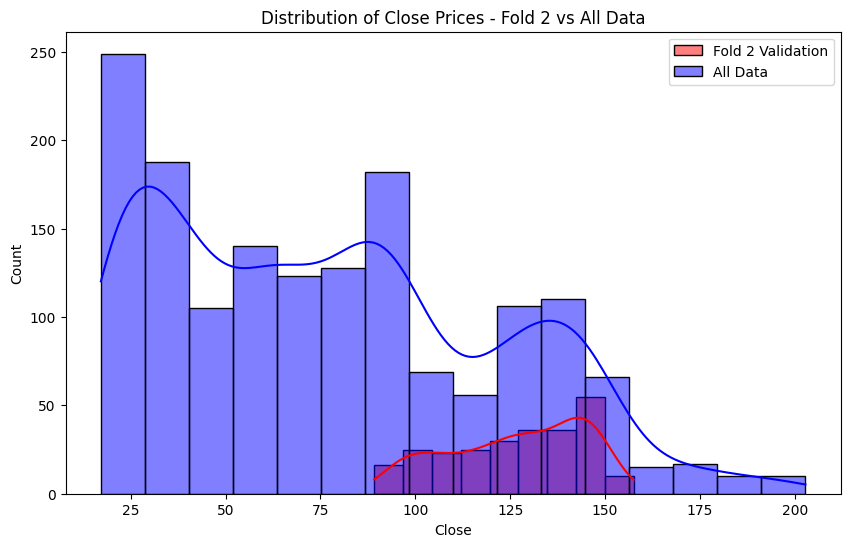

In [ ]:
import seaborn as sns

# Assuming Fold 2 indices are stored in val_index during cross-validation
fold2_val_data = data.iloc[val_index]
plt.figure(figsize=(10, 6))
sns.histplot(fold2_val_data['Close'], kde=True, color='red', label='Fold 2 Validation')
sns.histplot(data['Close'], kde=True, color='blue', label='All Data', alpha=0.5)
plt.legend()
plt.title('Distribution of Close Prices - Fold 2 vs All Data')
plt.show()


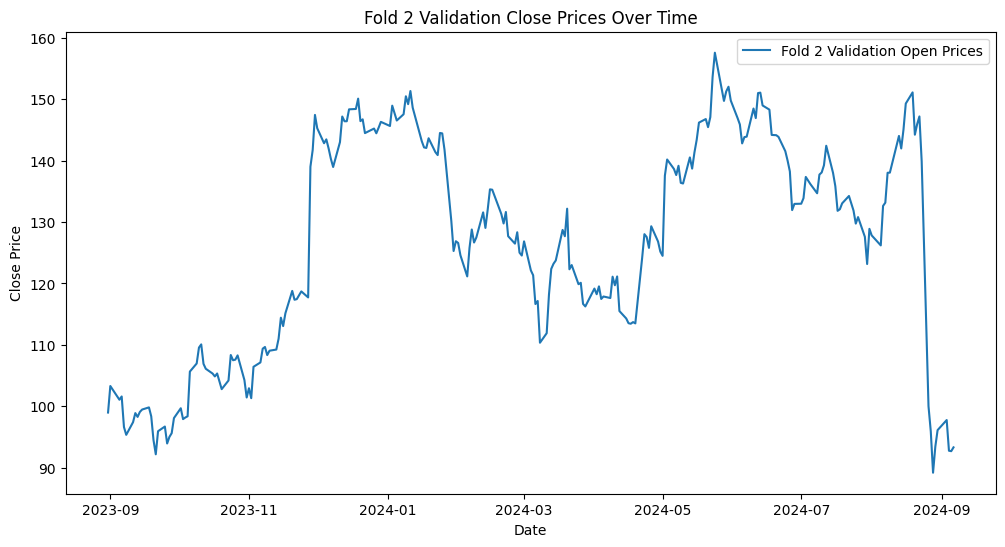

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(fold2_val_data.index, fold2_val_data['Close'], label='Fold 2 Validation Open Prices')
plt.title('Fold 2 Validation Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


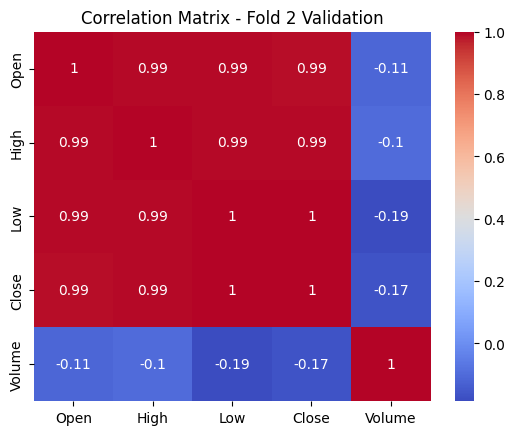

In [ ]:
correlation = fold2_val_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Fold 2 Validation')
plt.show()


Data shape after adding technical indicators: (1541, 12)
Total sequences created: 1506
Using device: cpu

--- Fold 1 ---
Epoch 1/100, Train Loss: 0.080307, Validation Loss: 0.106165
Initial validation loss set to 0.106165.
Epoch 2/100, Train Loss: 0.057741, Validation Loss: 0.090995
Validation loss decreased to 0.090995. Resetting patience.
Epoch 3/100, Train Loss: 0.035620, Validation Loss: 0.060652
Validation loss decreased to 0.060652. Resetting patience.
Epoch 4/100, Train Loss: 0.026064, Validation Loss: 0.045121
Validation loss decreased to 0.045121. Resetting patience.
Epoch 5/100, Train Loss: 0.019739, Validation Loss: 0.043948
Validation loss decreased to 0.043948. Resetting patience.
Epoch 6/100, Train Loss: 0.015579, Validation Loss: 0.047934
No improvement in validation loss for 1 epochs.
Epoch 7/100, Train Loss: 0.012687, Validation Loss: 0.052144
No improvement in validation loss for 2 epochs.
Epoch 8/100, Train Loss: 0.012547, Validation Loss: 0.051524
No improvement in 

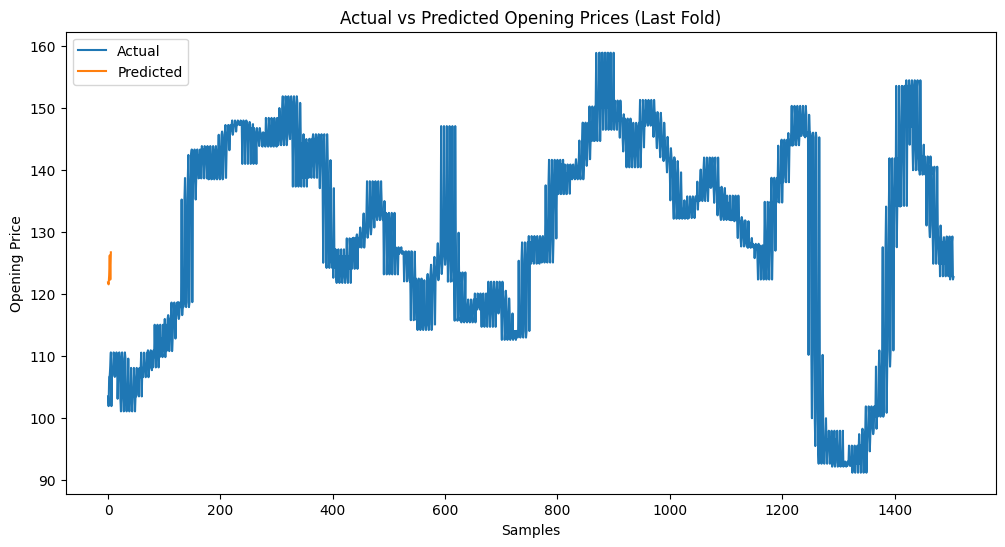

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns
import ta
import warnings
warnings.filterwarnings("ignore")

# 1. Fetch historical data for PDD

# 1. Fetch historical data for PDD
def fetch_data(ticker="PDD", period="max"):
    pdd = yf.Ticker(ticker)
    data = pdd.history(period=period)
    return data

data = fetch_data()

# 2. Select relevant features
features = ['Open', 'High', 'Low', 'Close', 'Volume']
data = data[features].dropna()

# Add technical indicators: RSI, MACD, and ATR
data['RSI'] = ta.momentum.RSIIndicator(close=data['Close'], window=14).rsi()
macd = ta.trend.MACD(close=data['Close'])
data['MACD'] = macd.macd()
data['MACD_Signal'] = macd.macd_signal()
data['MACD_Diff'] = macd.macd_diff()
data['ATR'] = ta.volatility.AverageTrueRange(high=data['High'], low=data['Low'], close=data['Close'], window=14).average_true_range()

# Add lagged features
data['Open_Lag_1'] = data['Open'].shift(1)
data['Open_Lag_3'] = data['Open'].shift(3)
data = data.dropna()  # Drop NaN values due to lagging
# Handle any NaN values resulting from indicator calculations
data = data.dropna()
print(f"Data shape after adding technical indicators: {data.shape}")

# 4. Scale the data using separate scalers for 'Open' and other features
scaler_open = MinMaxScaler(feature_range=(0, 1))
scaler_other = MinMaxScaler(feature_range=(0, 1))

# Scale 'Open' price
scaled_open = scaler_open.fit_transform(data[['Open']])

# Scale other features including technical indicators
other_features = ['High', 'Low', 'Close', 'Volume', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Diff']
scaled_other = scaler_other.fit_transform(data[other_features])

# Combine scaled features
scaled_data = np.hstack([scaled_open, scaled_other])
scaled_df = pd.DataFrame(scaled_data, columns=['Open', 'High', 'Low', 'Close', 'Volume', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Diff'])

# 5. Parameters for sequence creation
SEQ_LENGTH = 30  # Number of past days to consider
PRED_LENGTH = 6  # Number of future days to predict

def create_sequences(data, seq_length=SEQ_LENGTH, pred_length=PRED_LENGTH):
    xs = []
    ys = []
    for i in range(len(data) - seq_length - pred_length + 1):
        x = data[i:(i + seq_length)]
        y = data[(i + seq_length):(i + seq_length + pred_length), 0]  # 'Open' is the first column
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

X, Y = create_sequences(scaled_df.values)
print(f"Total sequences created: {X.shape[0]}")

# 6. EarlyStopping Class
class EarlyStopping:
    def __init__(self, patience=10, min_delta=0.0, verbose=False, delta=0):
        """
        Args:
            patience (int): How many epochs to wait after last improvement.
            min_delta (float): Minimum change in the monitored quantity to qualify as an improvement.
            verbose (bool): If True, prints a message for each improvement.
            delta (float): Minimum change to consider as improvement.
        """
        self.patience = patience
        self.min_delta = min_delta
        self.verbose = verbose
        self.counter = 0
        self.best_loss = np.Inf
        self.early_stop = False
        self.delta = delta
        self.best_model_state = None

    def __call__(self, val_loss, model):
        if self.best_loss == np.Inf:
            self.best_loss = val_loss
            self.best_model_state = model.state_dict()
            if self.verbose:
                print(f'Initial validation loss set to {self.best_loss:.6f}.')
        elif val_loss < self.best_loss - self.delta:
            self.best_loss = val_loss
            self.best_model_state = model.state_dict()
            self.counter = 0
            if self.verbose:
                print(f'Validation loss decreased to {self.best_loss:.6f}. Resetting patience.')
        else:
            self.counter += 1
            if self.verbose:
                print(f'No improvement in validation loss for {self.counter} epochs.')
            if self.counter >= self.patience:
                if self.verbose:
                    print('Early stopping triggered.')
                self.early_stop = True

# 7. Corrected Transformer Model Definition with heads=3 for feature_size=9
class TransformerTimeSeries(nn.Module):
    def __init__(self, feature_size=9, num_layers=2, dropout=0.1, forward_expansion=4, heads=3):
        super(TransformerTimeSeries, self).__init__()
        self.positional_encoding = nn.Sequential(
            nn.Linear(feature_size, feature_size),
            nn.ReLU(),
            nn.Linear(feature_size, feature_size)
        )
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=feature_size,
            nhead=heads,  # 3 heads for feature_size=9
            dropout=dropout,
            dim_feedforward=feature_size * forward_expansion
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.decoder = nn.Linear(feature_size, PRED_LENGTH)  # Predict next 6 days

    def forward(self, x):
        # x shape: [batch_size, seq_length, feature_size]
        x = self.positional_encoding(x)
        x = x.permute(1, 0, 2)  # [seq_length, batch_size, feature_size]
        x = self.transformer_encoder(x)
        x = x.permute(1, 0, 2)  # [batch_size, seq_length, feature_size]
        x = x[:, -1, :]  # Take the output of the last time step
        out = self.decoder(x)
        return out

# 8. Cross-validation setup
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# 9. Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 10. Hyperparameters
BATCH_SIZE = 64
LEARNING_RATE = 0.001
EPOCHS = 100
PATIENCE = 10
DELTA = 0.0001

# 11. Initialize lists to store metrics for each fold
fold_mae = []
fold_rmse = []
fold_MdAPE = []
# 12. TimeSeriesSplit does not shuffle the data
for fold, (train_index, val_index) in enumerate(tscv.split(X)):
    print(f"\n--- Fold {fold+1} ---")

    X_train, X_val = X[train_index], X[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]

    # Convert to tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32).to(device)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
    Y_val_tensor = torch.tensor(Y_val, dtype=torch.float32).to(device)

    # Create datasets and loaders
    train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

    # Initialize the model, loss function, optimizer
    model = TransformerTimeSeries().to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

    # Initialize Early Stopping
    early_stopping = EarlyStopping(patience=PATIENCE, verbose=True, delta=DELTA)

    # Training Loop
    for epoch in range(EPOCHS):
        model.train()
        epoch_loss = 0
        for batch_X, batch_Y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_Y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        avg_train_loss = epoch_loss / len(train_loader)

        # Validation Phase
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch_X, batch_Y in val_loader:
                outputs = model(batch_X)
                loss = criterion(outputs, batch_Y)
                val_loss += loss.item()
        avg_val_loss = val_loss / len(val_loader)

        print(f"Epoch {epoch+1}/{EPOCHS}, Train Loss: {avg_train_loss:.6f}, Validation Loss: {avg_val_loss:.6f}")

        # Early Stopping Check
        early_stopping(avg_val_loss, model)
        if early_stopping.early_stop:
            print("Early stopping")
            break

    # Load the best model state
    model.load_state_dict(early_stopping.best_model_state)

    # Evaluation on Validation Set
    model.eval()
    all_predictions = []
    all_true = []
    with torch.no_grad():
        for batch_X, batch_Y in val_loader:
            outputs = model(batch_X)
            all_predictions.append(outputs.cpu().numpy())
            all_true.append(batch_Y.cpu().numpy())

    all_predictions = np.vstack(all_predictions)  # Shape: (num_samples, 6)
    all_true = np.vstack(all_true)  # Shape: (num_samples, 6)

    # Inverse transform the 'Open' predictions and true values
    inversed_pred = scaler_open.inverse_transform(all_predictions)  # Shape: (num_samples, 6)
    inversed_true = scaler_open.inverse_transform(all_true)  # Shape: (num_samples, 6)

    # Calculate MAE and RMSE for each prediction day
    mae = mean_absolute_error(inversed_true.flatten(), inversed_pred.flatten())
    rmse = np.sqrt(mean_squared_error(inversed_true.flatten(), inversed_pred.flatten()))
    MdAPE  = median_absolute_error(inversed_true.flatten(), inversed_pred.flatten())
    print(f"Fold {fold+1} - MAE: {mae:.2f}, RMSE: {rmse:.2f}, MdAPE: {MdAPE:.2f}")

    fold_mae.append(mae)
    fold_rmse.append(rmse)
    fold_MdAPE.append(MdAPE)

# 13. Cross-Validation Results
print("\n=== Cross-Validation Results ===")
for i in range(n_splits):
    print(f"Fold {i+1} - MAE: {fold_mae[i]:.2f}, RMSE: {fold_rmse[i]:.2f}, MdAPE: {fold_MdAPE[i]:.2f}" )
print(f"\nAverage MAE: {np.mean(fold_mae):.2f}")
print(f"Average RMSE: {np.mean(fold_rmse):.2f}")
print(f"Average MdAPE: {np.mean(fold_MdAPE):.2f}")

# 14. Final Training on the Entire Dataset
print("\n--- Final Training on the Entire Dataset ---")
X_full, Y_full = X, Y
X_full_tensor = torch.tensor(X_full, dtype=torch.float32).to(device)
Y_full_tensor = torch.tensor(Y_full, dtype=torch.float32).to(device)

# Create dataset and loader
full_dataset = TensorDataset(X_full_tensor, Y_full_tensor)
full_loader = DataLoader(full_dataset, batch_size=BATCH_SIZE, shuffle=True)

# Initialize the model, loss function, optimizer
final_model = TransformerTimeSeries().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(final_model.parameters(), lr=LEARNING_RATE)

# Initialize Early Stopping
early_stopping = EarlyStopping(patience=PATIENCE, verbose=True, delta=DELTA)

# Split a small portion for validation during final training
VAL_SPLIT = 0.1
val_size = int(len(full_loader.dataset) * VAL_SPLIT)
train_size = len(full_loader.dataset) - val_size
train_dataset_final, val_dataset_final = torch.utils.data.random_split(full_loader.dataset, [train_size, val_size])

train_loader_final = DataLoader(train_dataset_final, batch_size=BATCH_SIZE, shuffle=True)
val_loader_final = DataLoader(val_dataset_final, batch_size=BATCH_SIZE, shuffle=False)

# Training Loop
for epoch in range(EPOCHS):
    final_model.train()
    epoch_loss = 0
    for batch_X, batch_Y in train_loader_final:
        optimizer.zero_grad()
        outputs = final_model(batch_X)
        loss = criterion(outputs, batch_Y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    avg_train_loss = epoch_loss / len(train_loader_final)

    # Validation Phase
    final_model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch_X, batch_Y in val_loader_final:
            outputs = final_model(batch_X)
            loss = criterion(outputs, batch_Y)
            val_loss += loss.item()
    avg_val_loss = val_loss / len(val_loader_final)

    print(f"Epoch {epoch+1}/{EPOCHS}, Train Loss: {avg_train_loss:.6f}, Validation Loss: {avg_val_loss:.6f}")

    # Early Stopping Check
    early_stopping(avg_val_loss, final_model)
    if early_stopping.early_stop:
        print("Early stopping")
        break

# Load the best model state
final_model.load_state_dict(early_stopping.best_model_state)
print("Final model trained with Early Stopping.")

# 15. Make Future Predictions
# Preparing the latest data for prediction
last_seq = scaled_df[-SEQ_LENGTH:].values
last_seq = np.expand_dims(last_seq, axis=0)  # Shape: [1, SEQ_LENGTH, feature_size]
last_seq_tensor = torch.tensor(last_seq, dtype=torch.float32).to(device)

# Making the prediction
final_model.eval()
with torch.no_grad():
    prediction = final_model(last_seq_tensor).cpu().numpy()  # Shape: (1, 6)

# Inversely transform the 'Open' predictions
inversed_pred = scaler_open.inverse_transform(prediction)  # Shape: (1, 6)

predicted_open = inversed_pred.flatten()  # Shape: (6,)

print("\nPredicted Opening Prices for Next 6 Days:")
for i, price in enumerate(predicted_open, 1):
    print(f"Day {i}: {price:.2f}")

# 16. Optional: Plotting predictions vs actuals for the last fold
# Note: This plots the last fold's predictions
# If you wish to plot across all folds, additional modifications are needed
plt.figure(figsize=(12,6))
plt.plot(inversed_true.flatten(), label='Actual')
plt.plot(inversed_pred.flatten(), label='Predicted')
plt.title('Actual vs Predicted Opening Prices (Last Fold)')
plt.xlabel('Samples')
plt.ylabel('Opening Price')
plt.legend()
plt.show()


In [ ]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=6e56899b37739f731380132dee49dae3f14c817aa16f1dd5c18322212878a2a5
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


Data fetched successfully!
Data shape after adding indicators and lagged features: (1539, 12)
Total sequences created: 1494
Using device: cpu

--- Fold 1 ---
Epoch 1, Train Loss: 0.0038, Val Loss: 0.0606
Epoch 2, Train Loss: 0.0030, Val Loss: 0.0619
Epoch 3, Train Loss: 0.0028, Val Loss: 0.0623
Epoch 4, Train Loss: 0.0028, Val Loss: 0.0626
Epoch 5, Train Loss: 0.0028, Val Loss: 0.0628
Epoch 6, Train Loss: 0.0028, Val Loss: 0.0629
Epoch 7, Train Loss: 0.0028, Val Loss: 0.0629
Epoch 8, Train Loss: 0.0028, Val Loss: 0.0630
Epoch 9, Train Loss: 0.0028, Val Loss: 0.0630
Epoch 10, Train Loss: 0.0028, Val Loss: 0.0630
Epoch 11, Train Loss: 0.0028, Val Loss: 0.0630
Early stopping
Raw Prediction (Before Inverse Transform): [[0.5497277  0.556146   0.5510431  0.5519179  0.55468184 0.55155796]]
Inversed Prediction: [124.06706  125.31479  124.322784 124.49284  125.03015  124.422874]
Fold 1 - MAE: 42.55, RMSE: 48.19

--- Fold 2 ---
Epoch 1, Train Loss: 0.0359, Val Loss: 0.1654
Epoch 2, Train Loss: 0

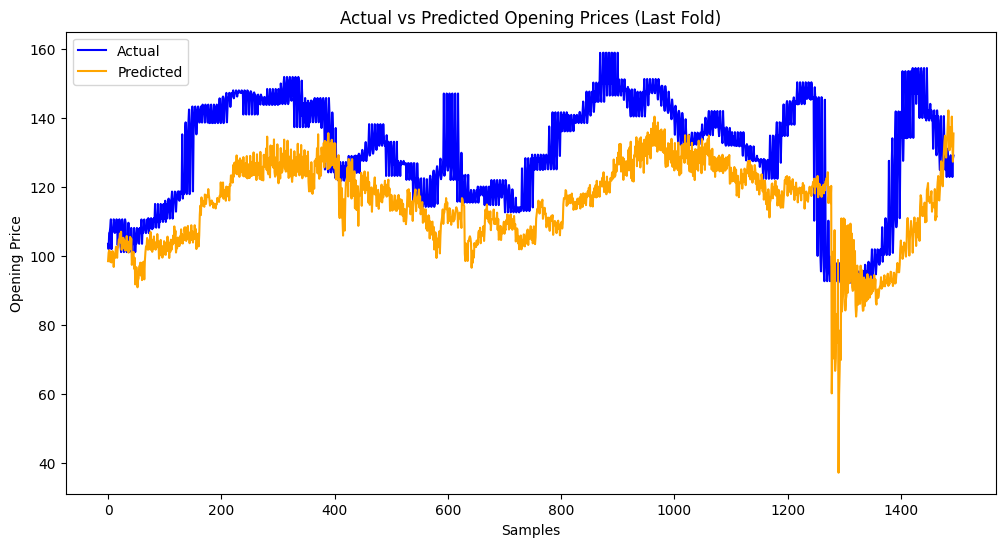

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import ta

# 1. Fetch historical data for PDD
def fetch_data(ticker="PDD", period="max"):
    pdd = yf.Ticker(ticker)
    data = pdd.history(period=period)
    return data

data = fetch_data()
print("Data fetched successfully!")

# 2. Select relevant features and add technical indicators
features = ['Open', 'High', 'Low', 'Close', 'Volume']
data = data[features].dropna()

# Add technical indicators: RSI, MACD, and ATR
data['RSI'] = ta.momentum.RSIIndicator(close=data['Close'], window=14).rsi()
macd = ta.trend.MACD(close=data['Close'])
data['MACD'] = macd.macd()
data['MACD_Signal'] = macd.macd_signal()
data['MACD_Diff'] = macd.macd_diff()
data['ATR'] = ta.volatility.AverageTrueRange(high=data['High'], low=data['Low'], close=data['Close'], window=14).average_true_range()

# Add lagged features
data['Open_Lag_1'] = data['Open'].shift(1)
data['Open_Lag_3'] = data['Open'].shift(3)
data = data.dropna()  # Drop NaN values due to lagging

print(f"Data shape after adding indicators and lagged features: {data.shape}")

# 3. Scale the data using MinMaxScaler
scaler_open = MinMaxScaler()
scaler_other = MinMaxScaler()

scaled_open = scaler_open.fit_transform(data[['Open']])
scaled_other = scaler_other.fit_transform(data.drop(columns=['Open']))
scaled_data = np.hstack([scaled_open, scaled_other])

# 4. Create sequences
SEQ_LENGTH = 40  # Increased sequence length
PRED_LENGTH = 6

def create_sequences(data, seq_length, pred_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length - pred_length + 1):
        x = data[i:i + seq_length]
        y = data[i + seq_length:i + seq_length + pred_length, 0]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

X, Y = create_sequences(scaled_data, SEQ_LENGTH, PRED_LENGTH)
print(f"Total sequences created: {X.shape[0]}")

# 5. Define Transformer model
class TransformerTimeSeries(nn.Module):
    def __init__(self, feature_size=12, num_layers=2, heads=4,
                 forward_expansion=4, dropout=0.1):
        super(TransformerTimeSeries, self).__init__()
        self.encoder = nn.TransformerEncoderLayer(
            d_model=feature_size,
            nhead=heads,
            dim_feedforward=feature_size * forward_expansion,
            dropout=dropout,
            batch_first=True
        )
        self.transformer = nn.TransformerEncoder(self.encoder, num_layers=num_layers)
        self.fc = nn.Linear(feature_size, 6)  # Predict next 6 days

    def forward(self, x):
        out = self.transformer(x)  # [batch_size, seq_length, feature_size]
        out = self.fc(out[:, -1, :])  # Output: [batch_size, 6]
        return torch.relu(out)  # Ensure non-negative output


# 6. Define LSTM model
class LSTMTimeSeries(nn.Module):
    def __init__(self, input_size=12, hidden_size=64, num_layers=2, dropout=0.1):
        super(LSTMTimeSeries, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, PRED_LENGTH)

    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])

# 7. Define EarlyStopping
class EarlyStopping:
    def __init__(self, patience=10, min_delta=0.0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = float('inf')
        self.early_stop = False

    def __call__(self, val_loss, model):
        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

# 8. Train and validate the models
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

BATCH_SIZE = 64
LEARNING_RATE = 0.0005  # Lower learning rate
EPOCHS = 100

fold_mae, fold_rmse = [], []

for fold, (train_idx, val_idx) in enumerate(tscv.split(X)):
    print(f"\n--- Fold {fold + 1} ---")

    X_train, X_val = X[train_idx], X[val_idx]
    Y_train, Y_val = Y[train_idx], Y[val_idx]

    train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                                  torch.tensor(Y_train, dtype=torch.float32))
    val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32),
                                torch.tensor(Y_val, dtype=torch.float32))

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

    # Train Transformer
    transformer_model = TransformerTimeSeries().to(device)
    optimizer = optim.Adam(transformer_model.parameters(), lr=LEARNING_RATE)
    criterion = nn.MSELoss()
    early_stopping = EarlyStopping(patience=10)

    for epoch in range(EPOCHS):
        transformer_model.train()
        train_loss = 0
        for X_batch, Y_batch in train_loader:
            optimizer.zero_grad()
            output = transformer_model(X_batch.to(device))
            loss = criterion(output, Y_batch.to(device))
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)

        transformer_model.eval()
        val_loss = 0
        with torch.no_grad():
            for X_batch, Y_batch in val_loader:
                output = transformer_model(X_batch.to(device))
                loss = criterion(output, Y_batch.to(device))
                val_loss += loss.item()
        val_loss /= len(val_loader)

        print(f"Epoch {epoch + 1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
        early_stopping(val_loss, transformer_model)
        if early_stopping.early_stop:
            print("Early stopping")
            break

    # Evaluate Transformer on validation set
    transformer_model.eval()
    predictions, actuals = [], []
    with torch.no_grad():
        for X_batch, Y_batch in val_loader:
            output = transformer_model(X_batch.to(device)).cpu().numpy()
            predictions.append(output)
            actuals.append(Y_batch.numpy())

    predictions = np.vstack(predictions)
    actuals = np.vstack(actuals)
    print(f"Raw Prediction (Before Inverse Transform): {prediction}")
    # Inverse transform
    predictions_inv = scaler_open.inverse_transform(predictions)
    actuals_inv = scaler_open.inverse_transform(actuals)
    print(f"Inversed Prediction: {predicted_open}")
    # Calculate metrics
    mae = mean_absolute_error(actuals_inv.flatten(), predictions_inv.flatten())
    rmse = np.sqrt(mean_squared_error(actuals_inv.flatten(), predictions_inv.flatten()))
    MdAPE = median_absolute_error(actuals_inv.flatten(), predictions_inv.flatten())

    fold_mae.append(mae)
    fold_rmse.append(rmse)
    fold_MdAPE.append(MdAPE)

    print(f"Fold {fold + 1} - MAE: {mae:.2f}, RMSE: {rmse:.2f}, MdAPE: {MdAPE:.2f}")

# Determine where to align the predicted values within the actual values
aligned_start = len(actuals_inv.flatten()) - len(predictions_inv.flatten())

# Plot Actual vs Predicted prices, aligned correctly
plt.figure(figsize=(12, 6))

# Plot the full actual values for reference
plt.plot(actuals_inv.flatten(), label='Actual', color='blue')

# Plot the predictions at the correct location in the series
plt.plot(
    range(aligned_start, aligned_start + len(predictions_inv.flatten())),
    predictions_inv.flatten(),
    label='Predicted', color='orange'
)

plt.title('Actual vs Predicted Opening Prices (Last Fold)')
plt.xlabel('Samples')
plt.ylabel('Opening Price')
plt.legend()
plt.show()


Using device: cpu
Latest data fetched successfully!
                                 Open        High         Low       Close  \
Date                                                                        
2024-10-17 00:00:00-04:00  124.889999  124.889999  122.320000  123.629997   
2024-10-18 00:00:00-04:00  128.320007  128.600006  123.959999  124.620003   
2024-10-21 00:00:00-04:00  122.870003  126.419998  122.519997  124.860001   
2024-10-22 00:00:00-04:00  128.220001  135.259995  127.029999  128.509995   
2024-10-23 00:00:00-04:00  129.089996  129.419998  121.410004  122.339996   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-10-17 00:00:00-04:00  10189900        0.0           0.0  
2024-10-18 00:00:00-04:00  11898500        0.0           0.0  
2024-10-21 00:00:00-04:00   5679800        0.0           0.0  
2024-10-22 00:00:00-04:00  16078900        0.0           0.0  
2024-10-23 00:00:00-04:00  118

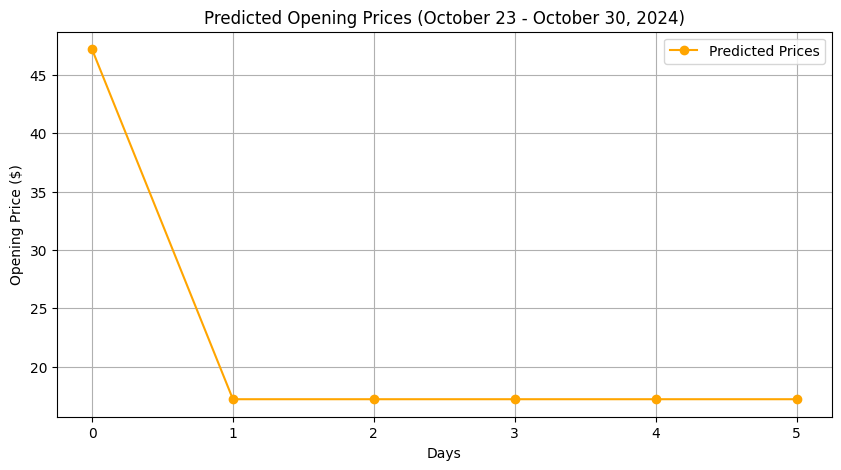

Using device: cpu
Latest data fetched successfully!
                                 Open        High         Low       Close  \
Date                                                                        
2024-10-17 00:00:00-04:00  124.889999  124.889999  122.320000  123.629997   
2024-10-18 00:00:00-04:00  128.320007  128.600006  123.959999  124.620003   
2024-10-21 00:00:00-04:00  122.870003  126.419998  122.519997  124.860001   
2024-10-22 00:00:00-04:00  128.220001  135.259995  127.029999  128.509995   
2024-10-23 00:00:00-04:00  129.089996  129.419998  121.410004  122.339996   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-10-17 00:00:00-04:00  10189900        0.0           0.0  
2024-10-18 00:00:00-04:00  11898500        0.0           0.0  
2024-10-21 00:00:00-04:00   5679800        0.0           0.0  
2024-10-22 00:00:00-04:00  16078900        0.0           0.0  
2024-10-23 00:00:00-04:00  118

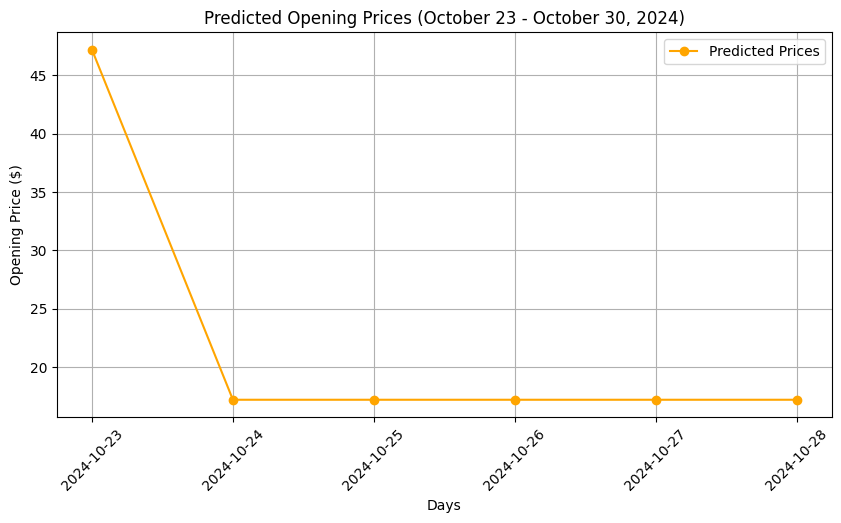

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import os
import ta  # Importing technical analysis library
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Ensure that CUDA is available if using GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# 1. Fetch the latest historical data for PDD
def fetch_data(ticker="PDD", period="max"):
    pdd = yf.Ticker(ticker)
    data = pdd.history(period=period)
    return data

data = fetch_data()
print("Latest data fetched successfully!")
print(data.tail())  # Verify the last few dates

# 2. Select relevant features and add technical indicators
features = ['Open', 'High', 'Low', 'Close', 'Volume']
data = data[features].dropna()

# Add technical indicators: RSI, MACD, and ATR
data['RSI'] = ta.momentum.RSIIndicator(close=data['Close'], window=14).rsi()
macd = ta.trend.MACD(close=data['Close'])
data['MACD'] = macd.macd()
data['MACD_Signal'] = macd.macd_signal()
data['MACD_Diff'] = macd.macd_diff()
data['ATR'] = ta.volatility.AverageTrueRange(high=data['High'], low=data['Low'], close=data['Close'], window=14).average_true_range()

# Add lagged features
data['Open_Lag_1'] = data['Open'].shift(1)
data['Open_Lag_3'] = data['Open'].shift(3)
data = data.dropna()  # Drop NaN values due to lagging
print(f"Data shape after adding indicators: {data.shape}")

# 3. Scale the data
scaler_open = MinMaxScaler()
scaler_other = MinMaxScaler()

# Split into training data for scaling
train_data = data[:-40]  # Use all data except the last 40 days for training
scaler_open.fit(train_data[['Open']])
scaler_other.fit(train_data.drop(columns=['Open']))

scaled_open = scaler_open.fit_transform(data[['Open']])
scaled_other = scaler_other.fit_transform(data.drop(columns=['Open']))
scaled_data = np.hstack([scaled_open, scaled_other])

# 4. Define the Transformer model with batch_first=True
class TransformerTimeSeries(nn.Module):
    def __init__(self, feature_size=12, num_layers=2, heads=4,
                 forward_expansion=4, dropout=0.1):
        super(TransformerTimeSeries, self).__init__()
        self.encoder = nn.TransformerEncoderLayer(
            d_model=feature_size,
            nhead=heads,
            dim_feedforward=feature_size * forward_expansion,
            dropout=dropout,
            batch_first=True  # Ensuring batch_first=True
        )
        self.transformer = nn.TransformerEncoder(self.encoder, num_layers=num_layers)
        self.fc = nn.Linear(feature_size, 6)  # Predict next 6 days

    def forward(self, x):
        out = self.transformer(x)  # [batch_size, seq_length, feature_size]
        return self.fc(out[:, -1, :])  # Output: [batch_size, 6]

# Initialize the model with feature_size=12 (as per the input data)
transformer_model = TransformerTimeSeries(feature_size=12).to(device)

# 5. Prepare the latest sequence for prediction
SEQ_LENGTH = 40  # Adjust sequence length based on your model's training

# Extract the last SEQ_LENGTH days for prediction
last_seq = scaled_data[-SEQ_LENGTH:]  # Shape: (SEQ_LENGTH, feature_size)
last_seq = np.expand_dims(last_seq, axis=0)  # Shape: (1, SEQ_LENGTH, feature_size)

# Convert to tensor
last_seq_tensor = torch.tensor(last_seq, dtype=torch.float32).to(device)

# 6. Load the trained model
model_path = "transformer_model.pth"

# Check if the model file exists before loading
if os.path.exists(model_path):
    transformer_model.load_state_dict(torch.load(model_path, map_location=device, weights_only=True))
    print(f"Model loaded successfully from {model_path}")
else:
    raise FileNotFoundError(f"Error: Model file not found at {model_path}")

transformer_model.eval()  # Set the model to evaluation mode

# 7. Make predictions for October 23 to October 30, 2024
with torch.no_grad():
    prediction = transformer_model(last_seq_tensor).cpu().numpy()
    print(f"Raw Prediction: {prediction}")  # Log raw predictions

# Clamp predictions to the valid range [0, 1] to avoid negative values
prediction = np.clip(prediction, a_min=0, a_max=1)
print(f"Clamped Prediction: {prediction}")

# Inverse transform the predictions to the original scale
predicted_open = scaler_open.inverse_transform(prediction).flatten()
print(f"Inversed Prediction: {predicted_open}")  # Log inversed predictions

# Display the predicted opening prices
print("\nPredicted Opening Prices from October 23, 2024, to October 30, 2024:")
for i, price in enumerate(predicted_open, start=1):
    date = pd.to_datetime('2024-10-23') + pd.Timedelta(days=i - 1)
    print(f"{date.date()}: ${price:.2f}")

# Example plot (Optional)
plt.figure(figsize=(10, 5))
plt.plot(predicted_open, marker='o', label='Predicted Prices', color='orange')
plt.title('Predicted Opening Prices (October 23 - October 30, 2024)')
plt.xlabel('Days')
plt.ylabel('Opening Price ($)')
plt.xticks(ticks=np.arange(len(predicted_open)), labels=[(pd.to_datetime('2024-10-23') + pd.Timedelta(days=i)).date() for i in range(len(predicted_open))], rotation=45)
plt.legend()
plt.grid(True)
plt.show()


Epoch [1/100], Train Loss: 0.103544, Val Loss: 0.019890
Epoch [10/100], Train Loss: 0.002088, Val Loss: 0.005365
Epoch [20/100], Train Loss: 0.001460, Val Loss: 0.003497
Epoch [30/100], Train Loss: 0.001389, Val Loss: 0.003251
Epoch [40/100], Train Loss: 0.001354, Val Loss: 0.005406
Epoch [50/100], Train Loss: 0.001437, Val Loss: 0.007428
Epoch [60/100], Train Loss: 0.001219, Val Loss: 0.003642
Epoch [70/100], Train Loss: 0.001276, Val Loss: 0.008285
Epoch [80/100], Train Loss: 0.001168, Val Loss: 0.004614
Epoch [90/100], Train Loss: 0.001309, Val Loss: 0.004063
Epoch [100/100], Train Loss: 0.001027, Val Loss: 0.005062
Model saved to model_weights.pth
Loaded trained model for prediction.

Predicted Opening Prices:
2024-10-24: $126.87
2024-10-25: $126.92
2024-10-26: $127.71
2024-10-27: $128.35
2024-10-28: $124.85
2024-10-29: $127.01


<ipython-input-26-11a5f99301ff>:522: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


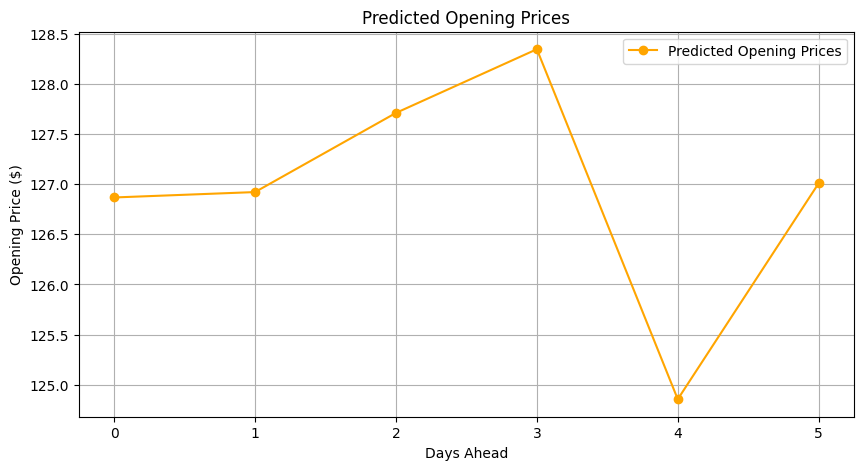

In [ ]:
# Full Script: Stock Price Prediction using Custom Embedding and Inception Blocks

# =========================================
# 1. Importing Necessary Libraries
# =========================================

import torch
import torch.nn as nn
import torch.nn.functional as F
import yfinance as yf
import pandas as pd
import numpy as np
import ta  # Technical analysis library
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
import math
import os

# =========================================
# 2. Defining Custom Layers and Blocks
# =========================================

# -----------------------------------------
# 2.1. Embedding Layers
# -----------------------------------------

class PositionalEmbedding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEmbedding, self).__init__()
        # Compute the positional encodings once in log space.
        pe = torch.zeros(max_len, d_model).float()
        pe.requires_grad = False

        position = torch.arange(0, max_len).float().unsqueeze(1)
        div_term = (torch.arange(0, d_model, 2).float()
                    * -(math.log(10000.0) / d_model)).exp()

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return self.pe[:, :x.size(1)]

class TokenEmbedding(nn.Module):
    def __init__(self, c_in, d_model):
        super(TokenEmbedding, self).__init__()
        padding = 1 if torch.__version__ >= '1.5.0' else 2
        self.tokenConv = nn.Conv1d(in_channels=c_in, out_channels=d_model,
                                   kernel_size=3, padding=padding, padding_mode='circular', bias=False)
        for m in self.modules():
            if isinstance(m, nn.Conv1d):
                nn.init.kaiming_normal_(
                    m.weight, mode='fan_in', nonlinearity='leaky_relu')

    def forward(self, x):
        x = self.tokenConv(x.permute(0, 2, 1)).transpose(1, 2)
        return x

class FixedEmbedding(nn.Module):
    def __init__(self, c_in, d_model):
        super(FixedEmbedding, self).__init__()

        w = torch.zeros(c_in, d_model).float()
        w.requires_grad = False

        position = torch.arange(0, c_in).float().unsqueeze(1)
        div_term = (torch.arange(0, d_model, 2).float()
                    * -(math.log(10000.0) / d_model)).exp()

        w[:, 0::2] = torch.sin(position * div_term)
        w[:, 1::2] = torch.cos(position * div_term)

        self.emb = nn.Embedding(c_in, d_model)
        self.emb.weight = nn.Parameter(w, requires_grad=False)

    def forward(self, x):
        return self.emb(x).detach()

class TemporalEmbedding(nn.Module):
    def __init__(self, d_model, embed_type='fixed', freq='h'):
        super(TemporalEmbedding, self).__init__()

        minute_size = 4
        hour_size = 24
        weekday_size = 7
        day_size = 32
        month_size = 13

        Embed = FixedEmbedding if embed_type == 'fixed' else nn.Embedding
        if freq == 't':
            self.minute_embed = Embed(minute_size, d_model)
        self.hour_embed = Embed(hour_size, d_model)
        self.weekday_embed = Embed(weekday_size, d_model)
        self.day_embed = Embed(day_size, d_model)
        self.month_embed = Embed(month_size, d_model)

    def forward(self, x):
        x = x.long()
        minute_x = self.minute_embed(x[:, :, 4]) if hasattr(
            self, 'minute_embed') else 0.
        hour_x = self.hour_embed(x[:, :, 3])
        weekday_x = self.weekday_embed(x[:, :, 2])
        day_x = self.day_embed(x[:, :, 1])
        month_x = self.month_embed(x[:, :, 0])

        return hour_x + weekday_x + day_x + month_x + minute_x

class TimeFeatureEmbedding(nn.Module):
    def __init__(self, d_model, embed_type='timeF', freq='h'):
        super(TimeFeatureEmbedding, self).__init__()

        freq_map = {'h': 4, 't': 5, 's': 6,
                    'm': 1, 'a': 1, 'w': 2, 'd': 3, 'b': 3}
        d_inp = freq_map[freq]
        self.embed = nn.Linear(d_inp, d_model, bias=False)

    def forward(self, x):
        return self.embed(x)

class DataEmbedding(nn.Module):
    def __init__(self, c_in, d_model, embed_type='fixed', freq='h', dropout=0.1):
        super(DataEmbedding, self).__init__()

        self.value_embedding = TokenEmbedding(c_in=c_in, d_model=d_model)
        self.position_embedding = PositionalEmbedding(d_model=d_model)
        self.temporal_embedding = TemporalEmbedding(d_model=d_model, embed_type=embed_type,
                                                    freq=freq) if embed_type != 'timeF' else TimeFeatureEmbedding(
            d_model=d_model, embed_type=embed_type, freq=freq)
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, x, x_mark=None):
        if x_mark is None:
            x = self.value_embedding(x) + self.position_embedding(x)
        else:
            x = self.value_embedding(
                x) + self.temporal_embedding(x_mark) + self.position_embedding(x)
        return self.dropout(x)

# -----------------------------------------
# 2.2. Convolutional Blocks
# -----------------------------------------

class Inception_Block_V1(nn.Module):
    def __init__(self, in_channels, out_channels, num_kernels=6, init_weight=True):
        super(Inception_Block_V1, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.num_kernels = num_kernels
        kernels = []
        for i in range(self.num_kernels):
            kernels.append(nn.Conv2d(in_channels, out_channels, kernel_size=2 * i + 1, padding=i))
        self.kernels = nn.ModuleList(kernels)
        if init_weight:
            self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)

    def forward(self, x):
        res_list = []
        for i in range(self.num_kernels):
            res_list.append(self.kernels[i](x))
        res = torch.stack(res_list, dim=-1).mean(-1)
        return res

class Inception_Block_V2(nn.Module):
    def __init__(self, in_channels, out_channels, num_kernels=6, init_weight=True):
        super(Inception_Block_V2, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.num_kernels = num_kernels
        kernels = []
        for i in range(self.num_kernels // 2):
            kernels.append(nn.Conv2d(in_channels, out_channels, kernel_size=[1, 2 * i + 3], padding=[0, i + 1]))
            kernels.append(nn.Conv2d(in_channels, out_channels, kernel_size=[2 * i + 3, 1], padding=[i + 1, 0]))
        kernels.append(nn.Conv2d(in_channels, out_channels, kernel_size=1))
        self.kernels = nn.ModuleList(kernels)
        if init_weight:
            self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)

    def forward(self, x):
        res_list = []
        for i in range(self.num_kernels // 2 * 2 + 1):
            res_list.append(self.kernels[i](x))
        res = torch.stack(res_list, dim=-1).mean(-1)
        return res

# -----------------------------------------
# 2.3. TimesBlock
# -----------------------------------------

class TimesBlock(nn.Module):
    def __init__(self, configs):
        super(TimesBlock, self).__init__()
        self.seq_len = configs['seq_len']
        self.pred_len = configs['pred_len']
        self.k = configs['top_k']
        self.conv = nn.Sequential(
            Inception_Block_V1(
                in_channels=configs['d_model'],                # 64
                out_channels=configs['conv_out_channels'],      # 32
                num_kernels=configs['conv_num_kernels']        # 6
            ),
            nn.GELU(),
            Inception_Block_V1(
                in_channels=configs['conv_out_channels'],       # 32
                out_channels=configs['d_model'],                # 64
                num_kernels=configs['conv_num_kernels']        # 6
            )
        )

    def forward(self, x):
        B, T, N = x.size()
        x = x.permute(0, 2, 1).unsqueeze(3)  # Shape: [B, C=64, T,1]
        out = self.conv(x)  # After first block: [B,32,T,1], second block: [B,64,T,1]
        out = out.squeeze(3).permute(0, 2, 1)  # Shape: [B, T, 64]
        return out

# -----------------------------------------
# 2.4. Main Model
# -----------------------------------------

class Model(nn.Module):
    def __init__(self, configs):
        super(Model, self).__init__()
        self.configs = configs
        self.enc_embedding = DataEmbedding(
            c_in=configs['enc_in'],
            d_model=configs['d_model'],
            embed_type=configs['embed'],
            freq=configs['freq'],
            dropout=configs['dropout']
        )
        self.model = nn.ModuleList([TimesBlock(configs) for _ in range(configs['e_layers'])])
        self.layer_norm = nn.LayerNorm(configs['d_model'])
        self.predict_linear = nn.Linear(configs['d_model'], configs['pred_len'])

    def forward(self, x_enc, x_mark=None):
        enc_out = self.enc_embedding(x_enc, x_mark)  # [B, T, C=64]
        for i in range(self.configs['e_layers']):
            enc_out = self.model[i](enc_out)          # [B, T, C=64]
            enc_out = self.layer_norm(enc_out)        # [B, T, C=64]
        dec_out = self.predict_linear(enc_out[:, -1, :])  # [B, 6]
        return dec_out.unsqueeze(1)  # [B, 1, 6]

# =========================================
# 3. Data Fetching and Preprocessing
# =========================================

# -----------------------------------------
# 3.1. Fetch Historical Data
# -----------------------------------------

def fetch_data(ticker="PDD", period="max"):
    """
    Fetch historical stock data using yfinance.

    Args:
        ticker (str): Stock ticker symbol.
        period (str): Data period (e.g., 'max', '1y', '6mo').

    Returns:
        pd.DataFrame: Historical stock data.
    """
    stock = yf.Ticker(ticker)
    data = stock.history(period=period)
    return data

# -----------------------------------------
# 3.2. Add Technical Indicators
# -----------------------------------------

def add_technical_indicators(data):
    """
    Add technical indicators to the stock data.

    Args:
        data (pd.DataFrame): Stock data with columns ['Open', 'High', 'Low', 'Close', 'Volume'].

    Returns:
        pd.DataFrame: Stock data with added technical indicators.
    """
    data['RSI'] = ta.momentum.RSIIndicator(close=data['Close'], window=14).rsi()
    macd = ta.trend.MACD(close=data['Close'])
    data['MACD'] = macd.macd()
    data['MACD_Signal'] = macd.macd_signal()
    data['MACD_Diff'] = macd.macd_diff()
    data['ATR'] = ta.volatility.AverageTrueRange(
        high=data['High'], low=data['Low'], close=data['Close'], window=14
    ).average_true_range()
    return data

# -----------------------------------------
# 3.3. Prepare Data with Lag Features
# -----------------------------------------

def prepare_lag_features(data, lags=[1,3]):
    """
    Add lag features to the data.

    Args:
        data (pd.DataFrame): Stock data.
        lags (list): List of lag periods.

    Returns:
        pd.DataFrame: Data with lag features.
    """
    for lag in lags:
        data[f'Open_Lag_{lag}'] = data['Open'].shift(lag)
    data = data.dropna()
    return data

# -----------------------------------------
# 3.4. Scaling Data
# -----------------------------------------

def scale_data(data):
    """
    Scale the data using MinMaxScaler.

    Args:
        data (pd.DataFrame): Data to be scaled.

    Returns:
        tuple: Scaled data as numpy array, open scaler, other features scaler.
    """
    scaler_open = MinMaxScaler()
    scaler_other = MinMaxScaler()

    scaled_open = scaler_open.fit_transform(data[['Open']])
    scaled_other = scaler_other.fit_transform(data.drop(columns=['Open']))
    scaled_data = np.hstack([scaled_open, scaled_other])

    return scaled_data, scaler_open, scaler_other

# -----------------------------------------
# 3.5. Create Sequences for Training
# -----------------------------------------

def create_sequences(data, seq_length, pred_length):
    """
    Create input and target sequences for the model.

    Args:
        data (np.ndarray): Scaled data array.
        seq_length (int): Length of input sequences.
        pred_length (int): Length of prediction sequences.

    Returns:
        tuple: Input sequences and target sequences.
    """
    xs = []
    ys = []
    for i in range(len(data) - seq_length - pred_length + 1):
        x = data[i:(i + seq_length)]
        y = data[(i + seq_length):(i + seq_length + pred_length), 0]  # Predict 'Open' prices
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# =========================================
# 4. Model Configuration and Initialization
# =========================================

# -----------------------------------------
# 4.1. Configuration Parameters
# -----------------------------------------

configs = {
    'enc_in': 12,            # Number of features after scaling (Open + High + Low + Close + Volume + RSI + MACD + MACD_Signal + MACD_Diff + ATR + Open_Lag_1 + Open_Lag_3)
    'd_model': 64,           # Dimension of the model
    'conv_out_channels': 32, # Out channels for Inception_Block_V1
    'conv_num_kernels': 6,   # Number of convolutional kernels in Inception_Block_V1
    'seq_len': 40,           # Sequence length
    'pred_len': 6,           # Prediction length
    'top_k': 2,              # Top K (used in TimesBlock, adjust as needed)
    'e_layers': 2,           # Number of encoder layers
    'embed': 'timeF',        # Embedding type
    'freq': 'h',             # Frequency of the data
    'dropout': 0.1           # Dropout rate
}

# =========================================
# 5. Training the Model
# =========================================

# -----------------------------------------
# 5.1. Fetch and Preprocess Data
# -----------------------------------------

# Fetch data
data = fetch_data(ticker="PDD", period="max")

# Select relevant features
features = ['Open', 'High', 'Low', 'Close', 'Volume']
data = data[features].dropna()

# Add technical indicators
data = add_technical_indicators(data)

# Add lag features
data = prepare_lag_features(data, lags=[1,3])

# Drop any remaining NaNs
data = data.dropna()

# Scale data
scaled_data, scaler_open, scaler_other = scale_data(data)

# Update 'enc_in' based on scaled_data
configs['enc_in'] = scaled_data.shape[1]

# Reinitialize the model with updated 'enc_in'
model = Model(configs).to(device)

# Create sequences
X, y = create_sequences(scaled_data, configs['seq_len'], configs['pred_len'])

# Split into training and validation sets (80% train, 20% val)
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:], y[train_size:]

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).to(device)

# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training parameters
num_epochs = 100
batch_size = 32

# Create DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# -----------------------------------------
# 5.2. Training Loop
# -----------------------------------------

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs.squeeze(1), batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * batch_x.size(0)
    epoch_loss /= len(train_loader.dataset)

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch_x, batch_y in val_loader:
            outputs = model(batch_x)
            loss = criterion(outputs.squeeze(1), batch_y)
            val_loss += loss.item() * batch_x.size(0)
        val_loss /= len(val_loader.dataset)

    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.6f}, Val Loss: {val_loss:.6f}")

# Save the trained model
model_path = 'model_weights.pth'
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}")

# =========================================
# 6. Making Predictions
# =========================================

# -----------------------------------------
# 6.1. Prepare the Latest Sequence for Prediction
# -----------------------------------------

SEQ_LENGTH = configs['seq_len']
PRED_LENGTH = configs['pred_len']

if len(scaled_data) < SEQ_LENGTH:
    raise ValueError(f"Not enough data to form a sequence of length {SEQ_LENGTH}.")

last_seq = scaled_data[-SEQ_LENGTH:]  # Shape: (SEQ_LENGTH, feature_size)
last_seq = np.expand_dims(last_seq, axis=0)  # Shape: (1, SEQ_LENGTH, feature_size)

# Convert to tensor
last_seq_tensor = torch.tensor(last_seq, dtype=torch.float32).to(device)

# -----------------------------------------
# 6.2. Load the Trained Model
# -----------------------------------------

# Initialize the model (ensure it's on the correct device)
model = Model(configs).to(device)

# Load the trained weights
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()
print("Loaded trained model for prediction.")

# -----------------------------------------
# 6.3. Make Predictions
# -----------------------------------------

with torch.no_grad():
    prediction = model(last_seq_tensor, x_mark=None).cpu().numpy()

# Inverse transform the predictions to the original scale
predicted_open = scaler_open.inverse_transform(prediction.reshape(-1, 1)).flatten()

print("\nPredicted Opening Prices:")
start_date = pd.to_datetime('today').normalize()  # You can adjust the start date as needed
for i, price in enumerate(predicted_open, start=1):
    date = start_date + pd.Timedelta(days=i - 1)
    print(f"{date.date()}: ${price:.2f}")

# =========================================
# 7. Visualizing Predictions
# =========================================

plt.figure(figsize=(10, 5))
plt.plot(predicted_open, marker='o', label='Predicted Opening Prices', color='orange')
plt.title('Predicted Opening Prices')
plt.xlabel('Days Ahead')
plt.ylabel('Opening Price ($)')
plt.legend()
plt.grid(True)
plt.show()


Explanation of the Code
Data Fetching: Fetches PDD's historical data using yfinance.
Preprocessing: Scales the data and creates input-output sequences.
Hybrid Model: Combines TimesNet, Crossformer, and LSTM to predict prices.
Training: Uses MSE loss and Adam optimizer.
Prediction: Predicts the next 6 days' close prices and visualizes them.
How to Run
Install required libraries: pip install yfinance torch scikit-learn matplotlib
Run the code to train the model and predict the next 6 days' closing prices for PDD

Epoch [10/100], Loss: 0.0474
Epoch [20/100], Loss: 0.0346
Epoch [30/100], Loss: 0.0283
Epoch [40/100], Loss: 0.0268
Epoch [50/100], Loss: 0.0254
Epoch [60/100], Loss: 0.0253
Epoch [70/100], Loss: 0.0249
Epoch [80/100], Loss: 0.0246
Epoch [90/100], Loss: 0.0243
Epoch [100/100], Loss: 0.0239


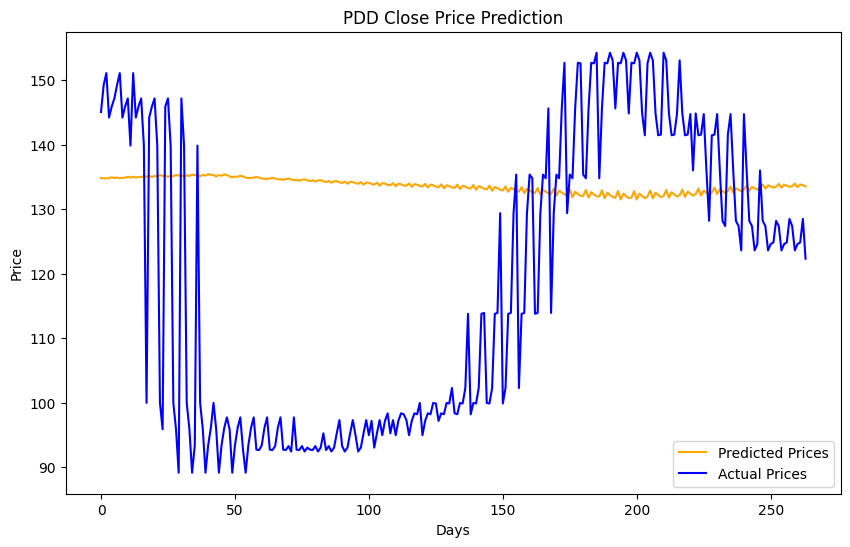


Predicted Close Prices for the Next 6 Days:
Day 1: $134.14
Day 2: $134.34
Day 3: $134.03
Day 4: $134.30
Day 5: $134.29
Day 6: $134.13


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
# =========================================
# 1. Import Required Libraries
# =========================================

import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# =========================================
# 2. Define Model Components
# =========================================

class CrossformerAttention(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(CrossformerAttention, self).__init__()
        self.query = nn.Linear(input_dim, hidden_dim)
        self.key = nn.Linear(input_dim, hidden_dim)
        self.value = nn.Linear(input_dim, hidden_dim)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x):
        Q = self.query(x)
        K = self.key(x)
        V = self.value(x)
        attention = self.softmax(torch.matmul(Q, K.transpose(-2, -1)) / (K.size(-1) ** 0.5))
        return torch.matmul(attention, V)

class TimesNetBlock(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(TimesNetBlock, self).__init__()
        self.conv1 = nn.Conv1d(input_dim, hidden_dim, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(hidden_dim, input_dim, kernel_size=3, padding=1)

    def forward(self, x):
        out = torch.relu(self.conv1(x))
        out = self.conv2(out)
        return out + x  # Residual connection

class HybridTimesNetCrossformerLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(HybridTimesNetCrossformerLSTM, self).__init__()
        self.timesnet_block = TimesNetBlock(input_dim, hidden_dim)
        self.crossformer = CrossformerAttention(input_dim, hidden_dim)
        self.lstm = nn.LSTM(hidden_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.timesnet_block(x.permute(0, 2, 1)).permute(0, 2, 1)  # TimesNet processing
        x = self.crossformer(x)  # Crossformer attention
        lstm_out, _ = self.lstm(x)  # LSTM layer
        output = self.fc(lstm_out[:, -1, :])  # Output layer
        return output

# =========================================
# 3. Fetch and Preprocess Data
# =========================================

def fetch_data(ticker="PDD", period="1y"):
    stock = yf.Ticker(ticker)
    data = stock.history(period=period)
    return data[['Close']]

def preprocess_data(data, seq_length, pred_length):
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)
    X, y = [], []
    for i in range(len(data_scaled) - seq_length - pred_length):
        X.append(data_scaled[i:i + seq_length])
        y.append(data_scaled[i + seq_length:i + seq_length + pred_length, 0])
    return np.array(X), np.array(y), scaler

# =========================================
# 4. Train and Evaluate the Model
# =========================================

# Set configurations
SEQ_LENGTH = 30  # Use the past 30 days to predict
PRED_LENGTH = 6  # Predict the next 6 days
INPUT_DIM = 1  # Only using the 'Close' price
HIDDEN_DIM = 64  # Number of hidden units in the model
OUTPUT_DIM = PRED_LENGTH  # Output 6 future values

# Fetch and preprocess data
data = fetch_data()
X, y, scaler = preprocess_data(data, SEQ_LENGTH, PRED_LENGTH)

# Train-test split (80% train, 20% test)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Initialize the model, loss function, and optimizer
model = HybridTimesNetCrossformerLSTM(INPUT_DIM, HIDDEN_DIM, OUTPUT_DIM)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
EPOCHS = 100
for epoch in range(EPOCHS):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{EPOCHS}], Loss: {loss.item():.4f}")

# =========================================
# 5. Make Predictions
# =========================================

# Predict on the test set
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor).numpy()

# Inverse transform predictions and actual values
predicted_prices = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test)

# =========================================
# 6. Visualize the Predictions
# =========================================

plt.figure(figsize=(10, 6))
plt.plot(predicted_prices.flatten(), label='Predicted Prices', color='orange')
plt.plot(actual_prices.flatten(), label='Actual Prices', color='blue')
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('PDD Close Price Prediction')
plt.legend()
plt.show()

# =========================================
# 7. Predict Future 6 Days Close Prices
# =========================================

# Prepare the latest sequence for prediction
last_seq = data[-SEQ_LENGTH:].values  # Last 30 days
last_seq_scaled = scaler.transform(last_seq)
last_seq_tensor = torch.tensor(last_seq_scaled[np.newaxis, :, :], dtype=torch.float32)

# Make prediction for the next 6 days
with torch.no_grad():
    future_prediction = model(last_seq_tensor).numpy()

# Inverse transform the prediction
future_prices = scaler.inverse_transform(future_prediction)

# Print predicted prices
print("\nPredicted Close Prices for the Next 6 Days:")
for i, price in enumerate(future_prices.flatten(), start=1):
    print(f"Day {i}: ${price:.2f}")


Epoch 10, Loss: 0.1499
Epoch 20, Loss: 0.0419
Epoch 30, Loss: 0.0355
Epoch 40, Loss: 0.0284
Epoch 50, Loss: 0.0280
Epoch 60, Loss: 0.0260
Epoch 70, Loss: 0.0246
Epoch 80, Loss: 0.0230
Epoch 90, Loss: 0.0217
Epoch 100, Loss: 0.0210
MSE: 539.6294, MAPE: 20.03%, MdAPE: 447.07


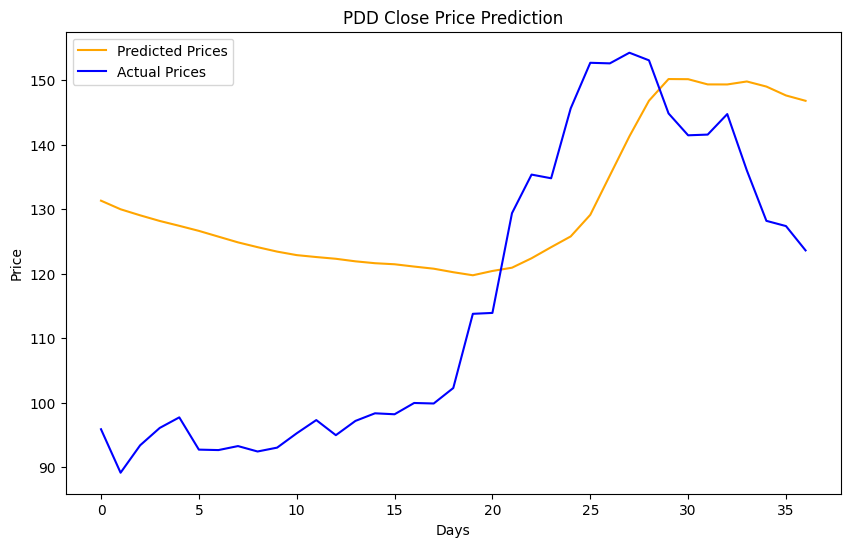


Predicted Close Prices for the Next 6 Days:
Day 1: $144.63
Day 2: $145.11
Day 3: $142.29
Day 4: $140.16
Day 5: $138.70
Day 6: $142.36


In [ ]:
# =========================================
# 1. Import Required Libraries
# =========================================

import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import ta  # Technical indicators library

# =========================================
# 2. Define Model Components
# =========================================

class CrossformerAttention(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(CrossformerAttention, self).__init__()
        self.query = nn.Linear(input_dim, hidden_dim)
        self.key = nn.Linear(input_dim, hidden_dim)
        self.value = nn.Linear(input_dim, hidden_dim)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x):
        Q = self.query(x)
        K = self.key(x)
        V = self.value(x)
        attention = self.softmax(torch.matmul(Q, K.transpose(-2, -1)) / (K.size(-1) ** 0.5))
        return torch.matmul(attention, V)

class TimesNetBlock(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(TimesNetBlock, self).__init__()
        self.conv1 = nn.Conv1d(input_dim, hidden_dim, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(hidden_dim, input_dim, kernel_size=3, padding=1)

    def forward(self, x):
        out = torch.relu(self.conv1(x))
        out = self.conv2(out)
        return out + x  # Residual connection

class HybridModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(HybridModel, self).__init__()
        self.timesnet_block = TimesNetBlock(input_dim, hidden_dim)
        self.crossformer = CrossformerAttention(input_dim, hidden_dim)
        self.lstm = nn.LSTM(hidden_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.timesnet_block(x.permute(0, 2, 1)).permute(0, 2, 1)
        x = self.crossformer(x)
        lstm_out, _ = self.lstm(x)
        output = self.fc(lstm_out[:, -1, :])
        return output

# =========================================
# 3. Data Fetching and Preprocessing
# =========================================

def fetch_data(ticker="PDD", period="1y"):
    stock = yf.Ticker(ticker)
    return stock.history(period=period)

def add_technical_indicators(data):
    data['RSI'] = ta.momentum.RSIIndicator(data['Close'], window=14).rsi()
    macd = ta.trend.MACD(data['Close'])
    data['MACD'] = macd.macd()
    data['MACD_Signal'] = macd.macd_signal()
    data['Bollinger_Upper'] = ta.volatility.BollingerBands(data['Close']).bollinger_hband()
    data['Bollinger_Lower'] = ta.volatility.BollingerBands(data['Close']).bollinger_lband()
    return data[['Close', 'Volume', 'RSI', 'MACD', 'MACD_Signal', 'Bollinger_Upper', 'Bollinger_Lower']].dropna()

def preprocess_data(data, seq_length, pred_length):
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)
    X, y = [], []
    for i in range(len(data_scaled) - seq_length - pred_length):
        X.append(data_scaled[i:i + seq_length])
        y.append(data_scaled[i + seq_length:i + seq_length + pred_length, 0])
    return np.array(X), np.array(y), scaler

# =========================================
# 4. Train and Evaluate the Model
# =========================================

SEQ_LENGTH = 30
PRED_LENGTH = 6
INPUT_DIM = 7
HIDDEN_DIM = 64
OUTPUT_DIM = PRED_LENGTH

# Fetch, preprocess, and split data
data = fetch_data()
data = add_technical_indicators(data)
X, y, scaler = preprocess_data(data, SEQ_LENGTH, PRED_LENGTH)

train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

model = HybridModel(INPUT_DIM, HIDDEN_DIM, OUTPUT_DIM)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
EPOCHS = 100
for epoch in range(EPOCHS):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

# =========================================
# 5. Make Predictions and Evaluate Performance
# =========================================

model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor).numpy()

predictions = predictions.reshape(-1, PRED_LENGTH)
y_test = y_test.reshape(-1, PRED_LENGTH)

n_samples = predictions.shape[0]
n_features = X_train.shape[2]

predicted_full = np.zeros((n_samples, n_features))
actual_full = np.zeros((n_samples, n_features))

predicted_full[:, 0] = predictions[:, 0]
actual_full[:, 0] = y_test[:, 0]

predicted_prices = scaler.inverse_transform(predicted_full)[:, 0]
actual_prices = scaler.inverse_transform(actual_full)[:, 0]

# Calculate MSE and MAPE
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def median_squared_error(y_true, y_pred):
    return np.median((y_true - y_pred) ** 2)

def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

mse = mean_squared_error(actual_prices, predicted_prices)
mape = mean_absolute_percentage_error(actual_prices, predicted_prices)
MdAPE = median_squared_error(actual_prices, predicted_prices)

print(f"MSE: {mse:.4f}, MAPE: {mape:.2f}%, MdAPE: {MdAPE:.2f}")

# =========================================
# 6. Visualize Predictions
# =========================================

plt.figure(figsize=(10, 6))
plt.plot(predicted_prices, label='Predicted Prices', color='orange')
plt.plot(actual_prices, label='Actual Prices', color='blue')
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('PDD Close Price Prediction')
plt.legend()
plt.show()

# =========================================
# 7. Predict the Next 6 Days' Closing Prices
# =========================================

# Prepare the latest sequence for prediction
last_seq = data[-SEQ_LENGTH:].values  # Get the last 30 days
last_seq_scaled = scaler.transform(last_seq)  # Scale the sequence
last_seq_tensor = torch.tensor(last_seq_scaled[np.newaxis, :, :], dtype=torch.float32)

# Predict the next 6 days' closing prices
with torch.no_grad():
    future_prediction = model(last_seq_tensor).numpy()  # Shape: (1, 6)

# Step 1: Create a placeholder with the correct number of features for 6 days
future_full = np.zeros((future_prediction.shape[1], X_train.shape[2]))  # Shape: (6, 7)

# Step 2: Assign predicted values to the 'Close' column
future_full[:, 0] = future_prediction.flatten()  # Assign predictions to 'Close'

# Step 3: Inverse transform to get the actual prices
future_prices = scaler.inverse_transform(future_full)[:, 0]  # Extract 'Close' prices

# Print the predicted prices
print("\nPredicted Close Prices for the Next 6 Days:")
for i, price in enumerate(future_prices, start=1):
    print(f"Day {i}: ${price:.2f}")


In [ ]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=3eb65c9b6db53e4b9e55efaaa13e52e4d38648b61c0f9ec2f78296fc76d77825
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


Epoch 1, Train Loss: 0.1199, Val Loss: 0.3292
Epoch 2, Train Loss: 0.1187, Val Loss: 0.3266
Epoch 3, Train Loss: 0.1176, Val Loss: 0.3240
Epoch 4, Train Loss: 0.1163, Val Loss: 0.3214
Epoch 5, Train Loss: 0.1152, Val Loss: 0.3187
Epoch 6, Train Loss: 0.1139, Val Loss: 0.3160
Epoch 7, Train Loss: 0.1127, Val Loss: 0.3131
Epoch 8, Train Loss: 0.1114, Val Loss: 0.3101
Epoch 9, Train Loss: 0.1100, Val Loss: 0.3070
Epoch 10, Train Loss: 0.1087, Val Loss: 0.3038
Epoch 11, Train Loss: 0.1072, Val Loss: 0.3004
Epoch 12, Train Loss: 0.1056, Val Loss: 0.2967
Epoch 13, Train Loss: 0.1040, Val Loss: 0.2929
Epoch 14, Train Loss: 0.1024, Val Loss: 0.2888
Epoch 15, Train Loss: 0.1006, Val Loss: 0.2844
Epoch 16, Train Loss: 0.0987, Val Loss: 0.2798
Epoch 17, Train Loss: 0.0966, Val Loss: 0.2747
Epoch 18, Train Loss: 0.0945, Val Loss: 0.2693
Epoch 19, Train Loss: 0.0923, Val Loss: 0.2634
Epoch 20, Train Loss: 0.0897, Val Loss: 0.2569
Epoch 21, Train Loss: 0.0871, Val Loss: 0.2498
Epoch 22, Train Loss: 

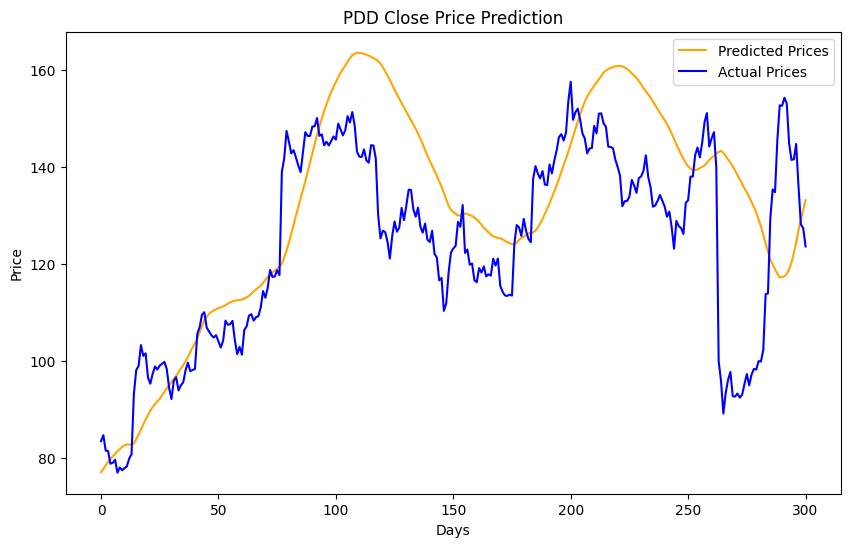


Predicted Close Prices for the Next 6 Days:
Day 1: $144.01
Day 2: $140.61
Day 3: $136.12
Day 4: $139.27
Day 5: $138.82
Day 6: $140.28


In [ ]:
# =========================================
# 1. Import Required Libraries
# =========================================

import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import ta  # Technical indicators library

# =========================================
# 2. Define the Enhanced Model
# =========================================

class CrossformerAttention(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(CrossformerAttention, self).__init__()
        self.query = nn.Linear(input_dim, hidden_dim)
        self.key = nn.Linear(input_dim, hidden_dim)
        self.value = nn.Linear(input_dim, hidden_dim)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x):
        Q = self.query(x)
        K = self.key(x)
        V = self.value(x)
        attention = self.softmax(torch.matmul(Q, K.transpose(-2, -1)) / (K.size(-1) ** 0.5))
        return torch.matmul(attention, V)

class TimesNetBlock(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(TimesNetBlock, self).__init__()
        self.conv1 = nn.Conv1d(input_dim, hidden_dim, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(hidden_dim, input_dim, kernel_size=3, padding=1)

    def forward(self, x):
        out = torch.relu(self.conv1(x))
        out = self.conv2(out)
        return out + x  # Residual connection

class HybridModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(HybridModel, self).__init__()
        self.timesnet_block = TimesNetBlock(input_dim, hidden_dim)
        self.crossformer = CrossformerAttention(input_dim, hidden_dim)
        self.lstm = nn.LSTM(hidden_dim, hidden_dim, num_layers=3, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.timesnet_block(x.permute(0, 2, 1)).permute(0, 2, 1)
        x = self.crossformer(x)
        lstm_out, _ = self.lstm(x)
        output = self.fc(lstm_out[:, -1, :])
        return output

# =========================================
# 3. Data Fetching and Preprocessing
# =========================================

def fetch_data(ticker="PDD", period="max"):
    stock = yf.Ticker(ticker)
    return stock.history(period=period)

def add_technical_indicators(data):
    data['RSI'] = ta.momentum.RSIIndicator(data['Close'], window=14).rsi()
    macd = ta.trend.MACD(data['Close'])
    data['MACD'] = macd.macd()
    data['MACD_Signal'] = macd.macd_signal()
    data['Bollinger_Upper'] = ta.volatility.BollingerBands(data['Close']).bollinger_hband()
    data['Bollinger_Lower'] = ta.volatility.BollingerBands(data['Close']).bollinger_lband()
    return data[['Close', 'Volume', 'RSI', 'MACD', 'MACD_Signal', 'Bollinger_Upper', 'Bollinger_Lower']].dropna()

def preprocess_data(data, seq_length, pred_length):
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)
    X, y = [], []
    for i in range(len(data_scaled) - seq_length - pred_length):
        X.append(data_scaled[i:i + seq_length])
        y.append(data_scaled[i + seq_length:i + seq_length + pred_length, 0])
    return np.array(X), np.array(y), scaler

# =========================================
# 4. Train the Model with Early Stopping and Learning Rate Scheduler
# =========================================

SEQ_LENGTH = 30
PRED_LENGTH = 6
INPUT_DIM = 7
HIDDEN_DIM = 128
OUTPUT_DIM = PRED_LENGTH
BATCH_SIZE = 16  # Smaller batch size for better generalization

data = fetch_data()
data = add_technical_indicators(data)
X, y, scaler = preprocess_data(data, SEQ_LENGTH, PRED_LENGTH)

train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

model = HybridModel(INPUT_DIM, HIDDEN_DIM, OUTPUT_DIM)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.000001, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=20, factor=0.5)

best_loss = float('inf')
patience = 20
counter = 0

# Training loop with early stopping and learning rate scheduler
for epoch in range(200):
    model.train()
    epoch_loss = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * X_batch.size(0)

    epoch_loss /= len(train_loader.dataset)

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)

    scheduler.step(val_loss)

    if val_loss < best_loss:
        best_loss = val_loss
        counter = 0
    else:
        counter += 1

    if counter >= patience:
        print(f"Early stopping at epoch {epoch + 1}")
        break

    print(f"Epoch {epoch + 1}, Train Loss: {epoch_loss:.4f}, Val Loss: {val_loss.item():.4f}")

# =========================================
# 5. Make Predictions and Evaluate Performance
# =========================================

with torch.no_grad():
    predictions = model(X_test_tensor).numpy()

predictions = predictions.reshape(-1, PRED_LENGTH)
y_test = y_test.reshape(-1, PRED_LENGTH)

n_samples = predictions.shape[0]
n_features = X_train.shape[2]

predicted_full = np.zeros((n_samples, n_features))
actual_full = np.zeros((n_samples, n_features))

predicted_full[:, 0] = predictions[:, 0]
actual_full[:, 0] = y_test[:, 0]

predicted_prices = scaler.inverse_transform(predicted_full)[:, 0]
actual_prices = scaler.inverse_transform(actual_full)[:, 0]

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def median_squared_error(y_true, y_pred):
    return np.median((y_true - y_pred) ** 2)

def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

mse = mean_squared_error(actual_prices, predicted_prices)
mape = mean_absolute_percentage_error(actual_prices, predicted_prices)
MdAPE = median_squared_error(actual_prices, predicted_prices)
print(f"MSE: {mse:.4f}, MAPE: {mape:.2f}%, MdAPE: {MdAPE:.2f}")

# =========================================
# 6. Visualize Predictions
# =========================================

plt.figure(figsize=(10, 6))
plt.plot(predicted_prices, label='Predicted Prices', color='orange')
plt.plot(actual_prices, label='Actual Prices', color='blue')
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('PDD Close Price Prediction')
plt.legend()
plt.show()

# =========================================
# 7. Predict the Next 6 Days' Closing Prices
# =========================================

last_seq = data[-SEQ_LENGTH:].values
last_seq_scaled = scaler.transform(last_seq)
last_seq_tensor = torch.tensor(last_seq_scaled[np.newaxis, :, :], dtype=torch.float32)

with torch.no_grad():
    future_prediction = model(last_seq_tensor).numpy()

future_full = np.zeros((future_prediction.shape[1], X_train.shape[2]))
future_full[:, 0] = future_prediction.flatten()

future_prices = scaler.inverse_transform(future_full)[:, 0]

print("\nPredicted Close Prices for the Next 6 Days:")
for i, price in enumerate(future_prices, start=1):
    print(f"Day {i}: ${price:.2f}")


In [ ]:
pip install ta

Epoch 1, Loss: 0.0121
Epoch 2, Loss: 0.0035
Epoch 3, Loss: 0.0026
Epoch 4, Loss: 0.0023
Epoch 5, Loss: 0.0013
Epoch 6, Loss: 0.0010
Epoch 7, Loss: 0.0009
Epoch 8, Loss: 0.0009
Epoch 9, Loss: 0.0009
Epoch 10, Loss: 0.0010
Epoch 11, Loss: 0.0010
Epoch 12, Loss: 0.0006
Epoch 13, Loss: 0.0006
Epoch 14, Loss: 0.0007
Epoch 15, Loss: 0.0007
Epoch 16, Loss: 0.0007
Epoch 17, Loss: 0.0008
Epoch 18, Loss: 0.0009
Epoch 19, Loss: 0.0008
Epoch 20, Loss: 0.0006
Epoch 21, Loss: 0.0007
Epoch 22, Loss: 0.0008
Epoch 23, Loss: 0.0006
Epoch 24, Loss: 0.0006
Epoch 25, Loss: 0.0006
Epoch 26, Loss: 0.0006
Epoch 27, Loss: 0.0011
Epoch 28, Loss: 0.0005
Epoch 29, Loss: 0.0006
Epoch 30, Loss: 0.0006
Epoch 31, Loss: 0.0007
Epoch 32, Loss: 0.0006
Epoch 33, Loss: 0.0006
Epoch 34, Loss: 0.0009
Epoch 35, Loss: 0.0006
Epoch 36, Loss: 0.0006
Epoch 37, Loss: 0.0005
Epoch 38, Loss: 0.0006
Epoch 39, Loss: 0.0005
Epoch 40, Loss: 0.0006
Epoch 41, Loss: 0.0005
Epoch 42, Loss: 0.0007
Epoch 43, Loss: 0.0007
Epoch 44, Loss: 0.00

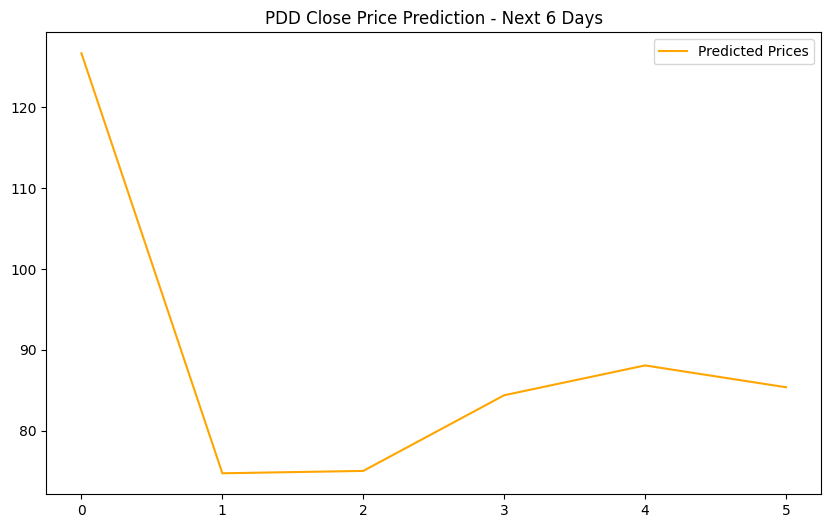

In [ ]:
# =========================================
# 1. Import Required Libraries
# =========================================

import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import ta  # Technical indicators library
import xgboost as xgb

# =========================================
# 2. Define the TimesNet Block
# =========================================

class TimesNetBlock(nn.Module):
    def __init__(self, input_dim, hidden_dim, kernel_size=3):
        super(TimesNetBlock, self).__init__()
        self.conv1 = nn.Conv1d(input_dim, hidden_dim, kernel_size=kernel_size, padding=1)
        self.conv2 = nn.Conv1d(hidden_dim, input_dim, kernel_size=kernel_size, padding=1)

    def forward(self, x):
        out = torch.relu(self.conv1(x))
        out = self.conv2(out)
        return out + x  # Residual connection

# =========================================
# 3. Define Crossformer Attention Layer
# =========================================

class CrossformerAttention(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(CrossformerAttention, self).__init__()
        self.query = nn.Linear(input_dim, hidden_dim)
        self.key = nn.Linear(input_dim, hidden_dim)
        self.value = nn.Linear(input_dim, hidden_dim)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x):
        Q = self.query(x)
        K = self.key(x)
        V = self.value(x)
        attention = self.softmax(torch.matmul(Q, K.transpose(-2, -1)) / np.sqrt(K.size(-1)))
        return torch.matmul(attention, V)

# =========================================
# 4. Define the Full Hybrid Model: TimesNet + Crossformer + LSTM
# =========================================

class HybridModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(HybridModel, self).__init__()
        self.timesnet_block = TimesNetBlock(input_dim, hidden_dim)
        self.crossformer = CrossformerAttention(input_dim, hidden_dim)
        self.lstm = nn.LSTM(hidden_dim, hidden_dim, num_layers=2, batch_first=True, dropout=0.3)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.timesnet_block(x.permute(0, 2, 1)).permute(0, 2, 1)
        x = self.crossformer(x)
        lstm_out, _ = self.lstm(x)
        output = self.fc(lstm_out[:, -1, :])
        return output

# =========================================
# 5. Data Fetching, Preprocessing, and Loader Setup
# =========================================

def fetch_data(ticker="PDD", period="max"):
    stock = yf.Ticker(ticker)
    return stock.history(period=period)

def add_technical_indicators(data):
    data['RSI'] = ta.momentum.RSIIndicator(data['Close'], window=14).rsi()
    macd = ta.trend.MACD(data['Close'])
    data['MACD'] = macd.macd()
    data['MACD_Signal'] = macd.macd_signal()
    data['Bollinger_Upper'] = ta.volatility.BollingerBands(data['Close']).bollinger_hband()
    data['Bollinger_Lower'] = ta.volatility.BollingerBands(data['Close']).bollinger_lband()
    return data[['Close', 'Volume', 'RSI', 'MACD', 'MACD_Signal', 'Bollinger_Upper', 'Bollinger_Lower']].dropna()

def preprocess_data(data, seq_length):
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)
    X, y = [], []
    for i in range(len(data_scaled) - seq_length - 1):
        X.append(data_scaled[i:i + seq_length])
        y.append(data_scaled[i + seq_length, 0])  # Predict 'Close'
    return np.array(X), np.array(y), scaler

# =========================================
# 6. Train the Hybrid Model
# =========================================

SEQ_LENGTH = 30
HIDDEN_DIM = 128
BATCH_SIZE = 16
EPOCHS = 50

data = fetch_data()
data = add_technical_indicators(data)
X, y, scaler = preprocess_data(data, SEQ_LENGTH)

train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                              torch.tensor(y_train, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

model = HybridModel(X_train.shape[2], HIDDEN_DIM, 1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(EPOCHS):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch).squeeze()
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * X_batch.size(0)
    epoch_loss /= len(train_loader.dataset)
    print(f"Epoch {epoch + 1}, Loss: {epoch_loss:.4f}")

# =========================================
# 7. Train XGBoost on Residuals
# =========================================

with torch.no_grad():
    train_preds = model(torch.tensor(X_train, dtype=torch.float32)).squeeze().numpy()
    train_residuals = y_train - train_preds

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model.fit(train_preds.reshape(-1, 1), train_residuals)

# =========================================
# 8. Rolling Window Forecasting with XGBoost
# =========================================

def rolling_forecast(model, xgb_model, last_seq, scaler, steps=6):
    predictions = []
    for _ in range(steps):
        seq_tensor = torch.tensor(last_seq[np.newaxis, :, :], dtype=torch.float32)
        with torch.no_grad():
            hybrid_pred = model(seq_tensor).item()
        xgb_pred = xgb_model.predict(np.array([hybrid_pred]).reshape(-1, 1))[0]
        final_pred = hybrid_pred + xgb_pred

        future_full = np.zeros((1, X_train.shape[2]))
        future_full[:, 0] = final_pred
        actual_price = scaler.inverse_transform(future_full)[:, 0][0]
        predictions.append(actual_price)

        next_seq = scaler.transform([[actual_price] * X_train.shape[2]])
        last_seq = np.vstack([last_seq[1:], next_seq])
    return predictions

# Predict the next 6 days
last_seq = scaler.transform(data[-SEQ_LENGTH:].values)
predicted_prices = rolling_forecast(model, xgb_model, last_seq, scaler)

print("\nPredicted Close Prices for the Next 6 Days:")
for i, price in enumerate(predicted_prices, start=1):
    print(f"Day {i}: ${price:.2f}")

# =========================================
# 9. Visualize Predictions
# =========================================

plt.figure(figsize=(10, 6))
plt.plot(predicted_prices, label='Predicted Prices', color='orange')
plt.title('PDD Close Price Prediction - Next 6 Days')
plt.legend()
plt.show()


In [ ]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=03abc4aa03630b0cb0558dd9dd6d45a476091a0342716c903a6e386bcd6b0060
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


Epoch [1/100], Train Loss: 0.077896, Val Loss: 0.009491
Epoch [10/100], Train Loss: 0.001796, Val Loss: 0.006292
Epoch [20/100], Train Loss: 0.001537, Val Loss: 0.004111
Epoch [30/100], Train Loss: 0.001827, Val Loss: 0.003764
Epoch [40/100], Train Loss: 0.001806, Val Loss: 0.004617
Epoch [50/100], Train Loss: 0.001465, Val Loss: 0.004955
Epoch [60/100], Train Loss: 0.001580, Val Loss: 0.004809
Epoch [70/100], Train Loss: 0.001625, Val Loss: 0.003772
Epoch [80/100], Train Loss: 0.001353, Val Loss: 0.004487
Epoch [90/100], Train Loss: 0.001472, Val Loss: 0.004463
Epoch [100/100], Train Loss: 0.001231, Val Loss: 0.005469
Model saved to model_weights.pth
Loaded trained model for prediction.

Predicted Closing Prices:
2024-10-27: $121.94
2024-10-28: $122.84
2024-10-29: $122.67
2024-10-30: $120.36
2024-10-31: $121.32
2024-11-01: $118.35


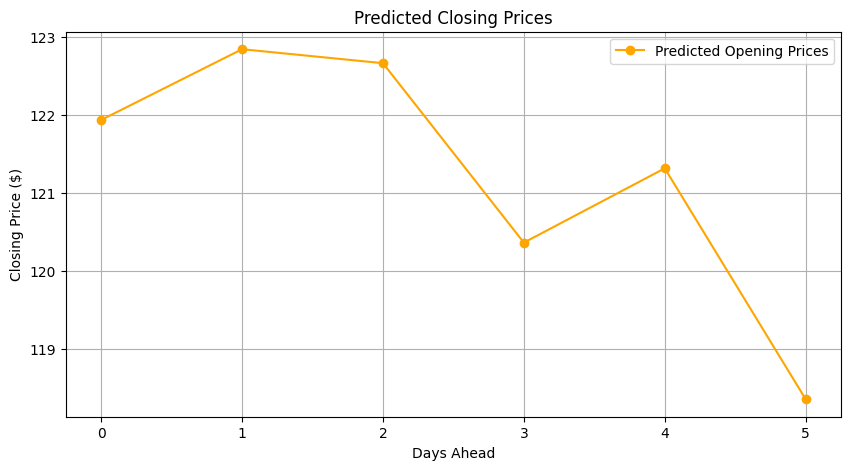

In [ ]:
# Full Script: Stock Price Prediction using Custom Embedding and Inception Blocks

# =========================================
# 1. Importing Necessary Libraries
# =========================================

import torch
import torch.nn as nn
import torch.nn.functional as F
import yfinance as yf
import pandas as pd
import numpy as np
import ta  # Technical analysis library
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
import math
import os

# =========================================
# 2. Defining Custom Layers and Blocks
# =========================================

# -----------------------------------------
# 2.1. Embedding Layers
# -----------------------------------------

class PositionalEmbedding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEmbedding, self).__init__()
        # Compute the positional encodings once in log space.
        pe = torch.zeros(max_len, d_model).float()
        pe.requires_grad = False

        position = torch.arange(0, max_len).float().unsqueeze(1)
        div_term = (torch.arange(0, d_model, 2).float()
                    * -(math.log(10000.0) / d_model)).exp()

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return self.pe[:, :x.size(1)]

class TokenEmbedding(nn.Module):
    def __init__(self, c_in, d_model):
        super(TokenEmbedding, self).__init__()
        padding = 1 if torch.__version__ >= '1.5.0' else 2
        self.tokenConv = nn.Conv1d(in_channels=c_in, out_channels=d_model,
                                   kernel_size=3, padding=padding, padding_mode='circular', bias=False)
        for m in self.modules():
            if isinstance(m, nn.Conv1d):
                nn.init.kaiming_normal_(
                    m.weight, mode='fan_in', nonlinearity='leaky_relu')

    def forward(self, x):
        x = self.tokenConv(x.permute(0, 2, 1)).transpose(1, 2)
        return x

class FixedEmbedding(nn.Module):
    def __init__(self, c_in, d_model):
        super(FixedEmbedding, self).__init__()

        w = torch.zeros(c_in, d_model).float()
        w.requires_grad = False

        position = torch.arange(0, c_in).float().unsqueeze(1)
        div_term = (torch.arange(0, d_model, 2).float()
                    * -(math.log(10000.0) / d_model)).exp()

        w[:, 0::2] = torch.sin(position * div_term)
        w[:, 1::2] = torch.cos(position * div_term)

        self.emb = nn.Embedding(c_in, d_model)
        self.emb.weight = nn.Parameter(w, requires_grad=False)

    def forward(self, x):
        return self.emb(x).detach()

class TemporalEmbedding(nn.Module):
    def __init__(self, d_model, embed_type='fixed', freq='h'):
        super(TemporalEmbedding, self).__init__()

        minute_size = 4
        hour_size = 24
        weekday_size = 7
        day_size = 32
        month_size = 13

        Embed = FixedEmbedding if embed_type == 'fixed' else nn.Embedding
        if freq == 't':
            self.minute_embed = Embed(minute_size, d_model)
        self.hour_embed = Embed(hour_size, d_model)
        self.weekday_embed = Embed(weekday_size, d_model)
        self.day_embed = Embed(day_size, d_model)
        self.month_embed = Embed(month_size, d_model)

    def forward(self, x):
        x = x.long()
        minute_x = self.minute_embed(x[:, :, 4]) if hasattr(
            self, 'minute_embed') else 0.
        hour_x = self.hour_embed(x[:, :, 3])
        weekday_x = self.weekday_embed(x[:, :, 2])
        day_x = self.day_embed(x[:, :, 1])
        month_x = self.month_embed(x[:, :, 0])

        return hour_x + weekday_x + day_x + month_x + minute_x

class TimeFeatureEmbedding(nn.Module):
    def __init__(self, d_model, embed_type='timeF', freq='h'):
        super(TimeFeatureEmbedding, self).__init__()

        freq_map = {'h': 4, 't': 5, 's': 6,
                    'm': 1, 'a': 1, 'w': 2, 'd': 3, 'b': 3}
        d_inp = freq_map[freq]
        self.embed = nn.Linear(d_inp, d_model, bias=False)

    def forward(self, x):
        return self.embed(x)

class DataEmbedding(nn.Module):
    def __init__(self, c_in, d_model, embed_type='fixed', freq='h', dropout=0.1):
        super(DataEmbedding, self).__init__()

        self.value_embedding = TokenEmbedding(c_in=c_in, d_model=d_model)
        self.position_embedding = PositionalEmbedding(d_model=d_model)
        self.temporal_embedding = TemporalEmbedding(d_model=d_model, embed_type=embed_type,
                                                    freq=freq) if embed_type != 'timeF' else TimeFeatureEmbedding(
            d_model=d_model, embed_type=embed_type, freq=freq)
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, x, x_mark=None):
        if x_mark is None:
            x = self.value_embedding(x) + self.position_embedding(x)
        else:
            x = self.value_embedding(
                x) + self.temporal_embedding(x_mark) + self.position_embedding(x)
        return self.dropout(x)

# -----------------------------------------
# 2.2. Convolutional Blocks
# -----------------------------------------

class Inception_Block_V1(nn.Module):
    def __init__(self, in_channels, out_channels, num_kernels=6, init_weight=True):
        super(Inception_Block_V1, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.num_kernels = num_kernels
        kernels = []
        for i in range(self.num_kernels):
            kernels.append(nn.Conv2d(in_channels, out_channels, kernel_size=2 * i + 1, padding=i))
        self.kernels = nn.ModuleList(kernels)
        if init_weight:
            self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)

    def forward(self, x):
        res_list = []
        for i in range(self.num_kernels):
            res_list.append(self.kernels[i](x))
        res = torch.stack(res_list, dim=-1).mean(-1)
        return res

class Inception_Block_V2(nn.Module):
    def __init__(self, in_channels, out_channels, num_kernels=6, init_weight=True):
        super(Inception_Block_V2, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.num_kernels = num_kernels
        kernels = []
        for i in range(self.num_kernels // 2):
            kernels.append(nn.Conv2d(in_channels, out_channels, kernel_size=[1, 2 * i + 3], padding=[0, i + 1]))
            kernels.append(nn.Conv2d(in_channels, out_channels, kernel_size=[2 * i + 3, 1], padding=[i + 1, 0]))
        kernels.append(nn.Conv2d(in_channels, out_channels, kernel_size=1))
        self.kernels = nn.ModuleList(kernels)
        if init_weight:
            self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)

    def forward(self, x):
        res_list = []
        for i in range(self.num_kernels // 2 * 2 + 1):
            res_list.append(self.kernels[i](x))
        res = torch.stack(res_list, dim=-1).mean(-1)
        return res

# -----------------------------------------
# 2.3. TimesBlock
# -----------------------------------------

class TimesBlock(nn.Module):
    def __init__(self, configs):
        super(TimesBlock, self).__init__()
        self.seq_len = configs['seq_len']
        self.pred_len = configs['pred_len']
        self.k = configs['top_k']
        self.conv = nn.Sequential(
            Inception_Block_V1(
                in_channels=configs['d_model'],                # 64
                out_channels=configs['conv_out_channels'],      # 32
                num_kernels=configs['conv_num_kernels']        # 6
            ),
            nn.GELU(),
            Inception_Block_V1(
                in_channels=configs['conv_out_channels'],       # 32
                out_channels=configs['d_model'],                # 64
                num_kernels=configs['conv_num_kernels']        # 6
            )
        )

    def forward(self, x):
        B, T, N = x.size()
        x = x.permute(0, 2, 1).unsqueeze(3)  # Shape: [B, C=64, T,1]
        out = self.conv(x)  # After first block: [B,32,T,1], second block: [B,64,T,1]
        out = out.squeeze(3).permute(0, 2, 1)  # Shape: [B, T, 64]
        return out

# -----------------------------------------
# 2.4. Main Model
# -----------------------------------------

class Model(nn.Module):
    def __init__(self, configs):
        super(Model, self).__init__()
        self.configs = configs
        self.enc_embedding = DataEmbedding(
            c_in=configs['enc_in'],
            d_model=configs['d_model'],
            embed_type=configs['embed'],
            freq=configs['freq'],
            dropout=configs['dropout']
        )
        self.model = nn.ModuleList([TimesBlock(configs) for _ in range(configs['e_layers'])])
        self.layer_norm = nn.LayerNorm(configs['d_model'])
        self.predict_linear = nn.Linear(configs['d_model'], configs['pred_len'])

    def forward(self, x_enc, x_mark=None):
        enc_out = self.enc_embedding(x_enc, x_mark)  # [B, T, C=64]
        for i in range(self.configs['e_layers']):
            enc_out = self.model[i](enc_out)          # [B, T, C=64]
            enc_out = self.layer_norm(enc_out)        # [B, T, C=64]
        dec_out = self.predict_linear(enc_out[:, -1, :])  # [B, 6]
        return dec_out.unsqueeze(1)  # [B, 1, 6]

# =========================================
# 3. Data Fetching and Preprocessing
# =========================================

# -----------------------------------------
# 3.1. Fetch Historical Data
# -----------------------------------------

def fetch_data(ticker="PDD", period="max"):
    """
    Fetch historical stock data using yfinance.

    Args:
        ticker (str): Stock ticker symbol.
        period (str): Data period (e.g., 'max', '1y', '6mo').

    Returns:
        pd.DataFrame: Historical stock data.
    """
    stock = yf.Ticker(ticker)
    data = stock.history(period=period)
    return data

# -----------------------------------------
# 3.2. Add Technical Indicators
# -----------------------------------------

def add_technical_indicators(data):
    """
    Add technical indicators to the stock data.

    Args:
        data (pd.DataFrame): Stock data with columns ['Open', 'High', 'Low', 'Close', 'Volume'].

    Returns:
        pd.DataFrame: Stock data with added technical indicators.
    """
    data['RSI'] = ta.momentum.RSIIndicator(close=data['Close'], window=14).rsi()
    macd = ta.trend.MACD(close=data['Close'])
    data['MACD'] = macd.macd()
    data['MACD_Signal'] = macd.macd_signal()
    data['MACD_Diff'] = macd.macd_diff()
    data['ATR'] = ta.volatility.AverageTrueRange(
        high=data['High'], low=data['Low'], close=data['Close'], window=14
    ).average_true_range()
    return data

# -----------------------------------------
# 3.3. Prepare Data with Lag Features
# -----------------------------------------

def prepare_lag_features(data, lags=[1,3]):
    """
    Add lag features to the data.

    Args:
        data (pd.DataFrame): Stock data.
        lags (list): List of lag periods.

    Returns:
        pd.DataFrame: Data with lag features.
    """
    for lag in lags:
        data[f'Open_Lag_{lag}'] = data['Open'].shift(lag)
    data = data.dropna()
    return data

# -----------------------------------------
# 3.4. Scaling Data
# -----------------------------------------

def scale_data(data):
    """
    Scale the data using MinMaxScaler.

    Args:
        data (pd.DataFrame): Data to be scaled.

    Returns:
        tuple: Scaled data as numpy array, open scaler, other features scaler.
    """
    scaler_open = MinMaxScaler()
    scaler_other = MinMaxScaler()

    scaled_open = scaler_open.fit_transform(data[['Close']])
    scaled_other = scaler_other.fit_transform(data.drop(columns=['Close']))
    scaled_data = np.hstack([scaled_open, scaled_other])

    return scaled_data, scaler_open, scaler_other

# -----------------------------------------
# 3.5. Create Sequences for Training
# -----------------------------------------

def create_sequences(data, seq_length, pred_length):
    """
    Create input and target sequences for the model.

    Args:
        data (np.ndarray): Scaled data array.
        seq_length (int): Length of input sequences.
        pred_length (int): Length of prediction sequences.

    Returns:
        tuple: Input sequences and target sequences.
    """
    xs = []
    ys = []
    for i in range(len(data) - seq_length - pred_length + 1):
        x = data[i:(i + seq_length)]
        y = data[(i + seq_length):(i + seq_length + pred_length), 0]  # Predict 'Open' prices
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# =========================================
# 4. Model Configuration and Initialization
# =========================================

# -----------------------------------------
# 4.1. Configuration Parameters
# -----------------------------------------

configs = {
    'enc_in': 12,            # Number of features after scaling (Open + High + Low + Close + Volume + RSI + MACD + MACD_Signal + MACD_Diff + ATR + Open_Lag_1 + Open_Lag_3)
    'd_model': 64,           # Dimension of the model
    'conv_out_channels': 32, # Out channels for Inception_Block_V1
    'conv_num_kernels': 6,   # Number of convolutional kernels in Inception_Block_V1
    'seq_len': 40,           # Sequence length
    'pred_len': 6,           # Prediction length
    'top_k': 2,              # Top K (used in TimesBlock, adjust as needed)
    'e_layers': 2,           # Number of encoder layers
    'embed': 'timeF',        # Embedding type
    'freq': 'h',             # Frequency of the data
    'dropout': 0.1           # Dropout rate
}

# =========================================
# 5. Training the Model
# =========================================

# -----------------------------------------
# 5.1. Fetch and Preprocess Data
# -----------------------------------------

# Fetch data
data = fetch_data(ticker="PDD", period="max")

# Select relevant features
features = ['Open', 'High', 'Low', 'Close', 'Volume']
data = data[features].dropna()

# Add technical indicators
data = add_technical_indicators(data)

# Add lag features
data = prepare_lag_features(data, lags=[1,3])

# Drop any remaining NaNs
data = data.dropna()

# Scale data
scaled_data, scaler_open, scaler_other = scale_data(data)

# Update 'enc_in' based on scaled_data
configs['enc_in'] = scaled_data.shape[1]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Reinitialize the model with updated 'enc_in'
model = Model(configs).to(device)

# Create sequences
X, y = create_sequences(scaled_data, configs['seq_len'], configs['pred_len'])

# Split into training and validation sets (80% train, 20% val)
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:], y[train_size:]

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).to(device)

# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training parameters
num_epochs = 100
batch_size = 32

# Create DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# -----------------------------------------
# 5.2. Training Loop
# -----------------------------------------

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs.squeeze(1), batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * batch_x.size(0)
    epoch_loss /= len(train_loader.dataset)

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch_x, batch_y in val_loader:
            outputs = model(batch_x)
            loss = criterion(outputs.squeeze(1), batch_y)
            val_loss += loss.item() * batch_x.size(0)
        val_loss /= len(val_loader.dataset)

    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.6f}, Val Loss: {val_loss:.6f}")

# Save the trained model
model_path = 'model_weights.pth'
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}")

# =========================================
# 6. Making Predictions
# =========================================

# -----------------------------------------
# 6.1. Prepare the Latest Sequence for Prediction
# -----------------------------------------

SEQ_LENGTH = configs['seq_len']
PRED_LENGTH = configs['pred_len']

if len(scaled_data) < SEQ_LENGTH:
    raise ValueError(f"Not enough data to form a sequence of length {SEQ_LENGTH}.")

last_seq = scaled_data[-SEQ_LENGTH:]  # Shape: (SEQ_LENGTH, feature_size)
last_seq = np.expand_dims(last_seq, axis=0)  # Shape: (1, SEQ_LENGTH, feature_size)

# Convert to tensor
last_seq_tensor = torch.tensor(last_seq, dtype=torch.float32).to(device)

# -----------------------------------------
# 6.2. Load the Trained Model
# -----------------------------------------

# Initialize the model (ensure it's on the correct device)
model = Model(configs).to(device)

# Load the trained weights
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()
print("Loaded trained model for prediction.")

# -----------------------------------------
# 6.3. Make Predictions
# -----------------------------------------

with torch.no_grad():
    prediction = model(last_seq_tensor, x_mark=None).cpu().numpy()

# Inverse transform the predictions to the original scale
predicted_open = scaler_open.inverse_transform(prediction.reshape(-1, 1)).flatten()

print("\nPredicted Closing Prices:")
start_date = pd.to_datetime('today').normalize()  # You can adjust the start date as needed
for i, price in enumerate(predicted_open, start=1):
    date = start_date + pd.Timedelta(days=i - 1)
    print(f"{date.date()}: ${price:.2f}")

# =========================================
# 7. Visualizing Predictions
# =========================================

plt.figure(figsize=(10, 5))
plt.plot(predicted_open, marker='o', label='Predicted Opening Prices', color='orange')
plt.title('Predicted Closing Prices')
plt.xlabel('Days Ahead')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.grid(True)
plt.show()


Using device: cuda
Total samples: 1496
Input shape: (1496, 40, 12)
Target shape: (1496, 6)
Training samples: 1196
Validation samples: 300
Epoch [1/100]
Train Loss: 0.066856 | Train RMSE: 38.463411 | Train MAE: 30.574583 | Train MAPE: 59.48%
Val Loss: 0.012255 | Val RMSE: 19.728280 | Val MAE: 16.762411 | Val MAPE: 13.36%

Validation loss decreased (0.012255 --> 0.012255).  Saving model ...
Validation loss decreased (0.005159 --> 0.005159).  Saving model ...
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
EarlyStopping counter: 3 out of 10
Validation loss decreased (0.004498 --> 0.004498).  Saving model ...
Validation loss decreased (0.004427 --> 0.004427).  Saving model ...
EarlyStopping counter: 1 out of 10
Validation loss decreased (0.004094 --> 0.004094).  Saving model ...
Epoch [10/100]
Train Loss: 0.002028 | Train RMSE: 8.244395 | Train MAE: 6.283526 | Train MAPE: 10.76%
Val Loss: 0.007198 | Val RMSE: 14.878434 | Val MAE: 12.743929 | Val MAPE: 10.43%

EarlySto

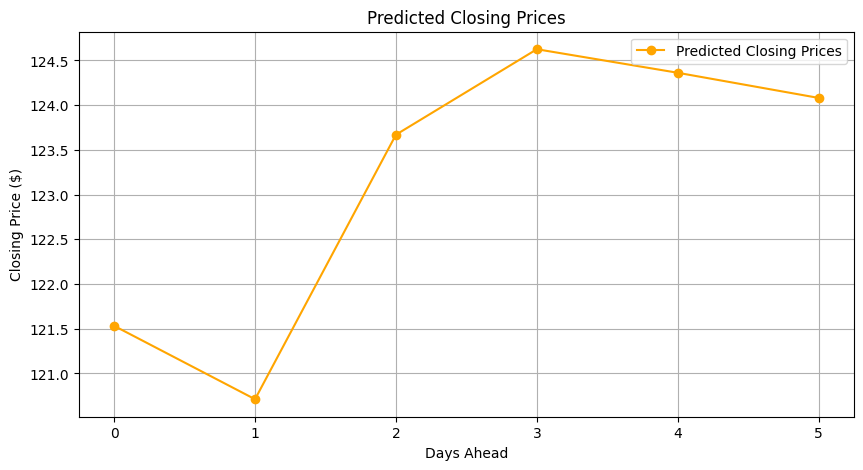

In [ ]:
# =========================================
# 1. Importing Necessary Libraries
# =========================================

import torch
import torch.nn as nn
import torch.nn.functional as F
import yfinance as yf
import pandas as pd
import numpy as np
import ta  # Technical analysis library
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
import math
import os
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# =========================================
# 2. Defining Custom Layers and Blocks
# =========================================

# -----------------------------------------
# 2.1. Embedding Layers
# -----------------------------------------

class PositionalEmbedding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEmbedding, self).__init__()
        # Compute the positional encodings once in log space.
        pe = torch.zeros(max_len, d_model).float()
        pe.requires_grad = False

        position = torch.arange(0, max_len).float().unsqueeze(1)
        div_term = (torch.arange(0, d_model, 2).float()
                    * -(math.log(10000.0) / d_model)).exp()

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return self.pe[:, :x.size(1)]

class TokenEmbedding(nn.Module):
    def __init__(self, c_in, d_model):
        super(TokenEmbedding, self).__init__()
        padding = 1 if torch.__version__ >= '1.5.0' else 2
        self.tokenConv = nn.Conv1d(in_channels=c_in, out_channels=d_model,
                                   kernel_size=3, padding=padding, padding_mode='circular', bias=False)
        for m in self.modules():
            if isinstance(m, nn.Conv1d):
                nn.init.kaiming_normal_(
                    m.weight, mode='fan_in', nonlinearity='leaky_relu')

    def forward(self, x):
        x = self.tokenConv(x.permute(0, 2, 1)).transpose(1, 2)
        return x

class FixedEmbedding(nn.Module):
    def __init__(self, c_in, d_model):
        super(FixedEmbedding, self).__init__()

        w = torch.zeros(c_in, d_model).float()
        w.requires_grad = False

        position = torch.arange(0, c_in).float().unsqueeze(1)
        div_term = (torch.arange(0, d_model, 2).float()
                    * -(math.log(10000.0) / d_model)).exp()

        w[:, 0::2] = torch.sin(position * div_term)
        w[:, 1::2] = torch.cos(position * div_term)

        self.emb = nn.Embedding(c_in, d_model)
        self.emb.weight = nn.Parameter(w, requires_grad=False)

    def forward(self, x):
        return self.emb(x).detach()

class TemporalEmbedding(nn.Module):
    def __init__(self, d_model, embed_type='fixed', freq='h'):
        super(TemporalEmbedding, self).__init__()

        minute_size = 4
        hour_size = 24
        weekday_size = 7
        day_size = 32
        month_size = 13

        Embed = FixedEmbedding if embed_type == 'fixed' else nn.Embedding
        if freq == 't':
            self.minute_embed = Embed(minute_size, d_model)
        self.hour_embed = Embed(hour_size, d_model)
        self.weekday_embed = Embed(weekday_size, d_model)
        self.day_embed = Embed(day_size, d_model)
        self.month_embed = Embed(month_size, d_model)

    def forward(self, x):
        x = x.long()
        minute_x = self.minute_embed(x[:, :, 4]) if hasattr(
            self, 'minute_embed') else 0.
        hour_x = self.hour_embed(x[:, :, 3])
        weekday_x = self.weekday_embed(x[:, :, 2])
        day_x = self.day_embed(x[:, :, 1])
        month_x = self.month_embed(x[:, :, 0])

        return hour_x + weekday_x + day_x + month_x + minute_x

class TimeFeatureEmbedding(nn.Module):
    def __init__(self, d_model, embed_type='timeF', freq='h'):
        super(TimeFeatureEmbedding, self).__init__()

        freq_map = {'h': 4, 't': 5, 's': 6,
                    'm': 1, 'a': 1, 'w': 2, 'd': 3, 'b': 3}
        d_inp = freq_map[freq]
        self.embed = nn.Linear(d_inp, d_model, bias=False)

    def forward(self, x):
        return self.embed(x)

class DataEmbedding(nn.Module):
    def __init__(self, c_in, d_model, embed_type='fixed', freq='h', dropout=0.1):
        super(DataEmbedding, self).__init__()

        self.value_embedding = TokenEmbedding(c_in=c_in, d_model=d_model)
        self.position_embedding = PositionalEmbedding(d_model=d_model)
        self.temporal_embedding = TemporalEmbedding(d_model=d_model, embed_type=embed_type,
                                                    freq=freq) if embed_type != 'timeF' else TimeFeatureEmbedding(
            d_model=d_model, embed_type=embed_type, freq=freq)
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, x, x_mark=None):
        if x_mark is None:
            x = self.value_embedding(x) + self.position_embedding(x)
        else:
            x = self.value_embedding(
                x) + self.temporal_embedding(x_mark) + self.position_embedding(x)
        return self.dropout(x)

# -----------------------------------------
# 2.2. Convolutional Blocks
# -----------------------------------------

class Inception_Block_V1(nn.Module):
    def __init__(self, in_channels, out_channels, num_kernels=6, init_weight=True):
        super(Inception_Block_V1, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.num_kernels = num_kernels
        kernels = []
        for i in range(self.num_kernels):
            kernels.append(nn.Conv2d(in_channels, out_channels, kernel_size=2 * i + 1, padding=i))
        self.kernels = nn.ModuleList(kernels)
        if init_weight:
            self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)

    def forward(self, x):
        res_list = []
        for i in range(self.num_kernels):
            res_list.append(self.kernels[i](x))
        res = torch.stack(res_list, dim=-1).mean(-1)
        return res

class Inception_Block_V2(nn.Module):
    def __init__(self, in_channels, out_channels, num_kernels=6, init_weight=True):
        super(Inception_Block_V2, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.num_kernels = num_kernels
        kernels = []
        for i in range(self.num_kernels // 2):
            kernels.append(nn.Conv2d(in_channels, out_channels, kernel_size=[1, 2 * i + 3], padding=[0, i + 1]))
            kernels.append(nn.Conv2d(in_channels, out_channels, kernel_size=[2 * i + 3, 1], padding=[i + 1, 0]))
        kernels.append(nn.Conv2d(in_channels, out_channels, kernel_size=1))
        self.kernels = nn.ModuleList(kernels)
        if init_weight:
            self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)

    def forward(self, x):
        res_list = []
        for i in range(self.num_kernels // 2 * 2 + 1):
            res_list.append(self.kernels[i](x))
        res = torch.stack(res_list, dim=-1).mean(-1)
        return res

# -----------------------------------------
# 2.3. TimesBlock
# -----------------------------------------

class TimesBlock(nn.Module):
    def __init__(self, configs):
        super(TimesBlock, self).__init__()
        self.seq_len = configs['seq_len']
        self.pred_len = configs['pred_len']
        self.k = configs['top_k']
        self.conv = nn.Sequential(
            Inception_Block_V1(
                in_channels=configs['d_model'],                # e.g., 64
                out_channels=configs['conv_out_channels'],      # e.g., 32
                num_kernels=configs['conv_num_kernels']        # e.g., 6
            ),
            nn.GELU(),
            Inception_Block_V1(
                in_channels=configs['conv_out_channels'],       # e.g., 32
                out_channels=configs['d_model'],                # e.g., 64
                num_kernels=configs['conv_num_kernels']        # e.g., 6
            )
        )

    def forward(self, x):
        B, T, N = x.size()
        x = x.permute(0, 2, 1).unsqueeze(3)  # Shape: [B, C=d_model, T, 1]
        out = self.conv(x)  # After first block: [B, conv_out_channels, T, 1], second block: [B, d_model, T, 1]
        out = out.squeeze(3).permute(0, 2, 1)  # Shape: [B, T, d_model]
        return out

# -----------------------------------------
# 2.4. Main Model
# -----------------------------------------

class Model(nn.Module):
    def __init__(self, configs):
        super(Model, self).__init__()
        self.configs = configs
        self.enc_embedding = DataEmbedding(
            c_in=configs['enc_in'],
            d_model=configs['d_model'],
            embed_type=configs['embed'],
            freq=configs['freq'],
            dropout=configs['dropout']
        )
        self.model = nn.ModuleList([TimesBlock(configs) for _ in range(configs['e_layers'])])
        self.layer_norm = nn.LayerNorm(configs['d_model'])
        self.predict_linear = nn.Linear(configs['d_model'], configs['pred_len'])

    def forward(self, x_enc, x_mark=None):
        enc_out = self.enc_embedding(x_enc, x_mark)  # [B, T, C=d_model]
        for i in range(self.configs['e_layers']):
            enc_out = self.model[i](enc_out)          # [B, T, C=d_model]
            enc_out = self.layer_norm(enc_out)        # [B, T, C=d_model]
        dec_out = self.predict_linear(enc_out[:, -1, :])  # [B, pred_len]
        return dec_out.unsqueeze(1)  # [B, 1, pred_len]

# =========================================
# 3. Data Fetching and Preprocessing
# =========================================

# -----------------------------------------
# 3.1. Fetch Historical Data
# -----------------------------------------

def fetch_data(ticker="PDD", period="max"):
    """
    Fetch historical stock data using yfinance.

    Args:
        ticker (str): Stock ticker symbol.
        period (str): Data period (e.g., 'max', '1y', '6mo').

    Returns:
        pd.DataFrame: Historical stock data.
    """
    stock = yf.Ticker(ticker)
    data = stock.history(period=period)
    return data

# -----------------------------------------
# 3.2. Add Technical Indicators
# -----------------------------------------

def add_technical_indicators(data):
    """
    Add technical indicators to the stock data.

    Args:
        data (pd.DataFrame): Stock data with columns ['Open', 'High', 'Low', 'Close', 'Volume'].

    Returns:
        pd.DataFrame: Stock data with added technical indicators.
    """
    data['RSI'] = ta.momentum.RSIIndicator(close=data['Close'], window=14).rsi()
    macd = ta.trend.MACD(close=data['Close'])
    data['MACD'] = macd.macd()
    data['MACD_Signal'] = macd.macd_signal()
    data['MACD_Diff'] = macd.macd_diff()
    data['ATR'] = ta.volatility.AverageTrueRange(
        high=data['High'], low=data['Low'], close=data['Close'], window=14
    ).average_true_range()
    return data

# -----------------------------------------
# 3.3. Prepare Data with Lag Features
# -----------------------------------------

def prepare_lag_features(data, lags=[1,3]):
    """
    Add lag features to the data.

    Args:
        data (pd.DataFrame): Stock data.
        lags (list): List of lag periods.

    Returns:
        pd.DataFrame: Data with lag features.
    """
    for lag in lags:
        data[f'Open_Lag_{lag}'] = data['Close'].shift(lag)
    data = data.dropna()
    return data

# -----------------------------------------
# 3.4. Scaling Data
# -----------------------------------------

def scale_data(data):
    """
    Scale the data using MinMaxScaler.

    Args:
        data (pd.DataFrame): Data to be scaled.

    Returns:
        tuple: Scaled data as numpy array, open scaler, other features scaler.
    """
    scaler_open = MinMaxScaler()
    scaler_other = MinMaxScaler()

    scaled_open = scaler_open.fit_transform(data[['Close']])
    scaled_other = scaler_other.fit_transform(data.drop(columns=['Close']))
    scaled_data = np.hstack([scaled_open, scaled_other])

    return scaled_data, scaler_open, scaler_other

# -----------------------------------------
# 3.5. Create Sequences for Training
# -----------------------------------------

def create_sequences(data, seq_length, pred_length):
    """
    Create input and target sequences for the model.

    Args:
        data (np.ndarray): Scaled data array.
        seq_length (int): Length of input sequences.
        pred_length (int): Length of prediction sequences.

    Returns:
        tuple: Input sequences and target sequences.
    """
    xs = []
    ys = []
    for i in range(len(data) - seq_length - pred_length + 1):
        x = data[i:(i + seq_length)]
        y = data[(i + seq_length):(i + seq_length + pred_length), 0]  # Predict 'Close' prices
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# =========================================
# 4. Model Configuration and Initialization
# =========================================

# -----------------------------------------
# 4.1. Configuration Parameters
# -----------------------------------------

configs = {
    'enc_in': 12,            # Number of features after scaling (Close + others)
    'd_model': 64,           # Dimension of the model
    'conv_out_channels': 32, # Out channels for Inception_Block_V1
    'conv_num_kernels': 6,   # Number of convolutional kernels in Inception_Block_V1
    'seq_len': 40,           # Sequence length
    'pred_len': 6,           # Prediction length
    'top_k': 2,              # Top K (used in TimesBlock, adjust as needed)
    'e_layers': 2,           # Number of encoder layers
    'embed': 'timeF',        # Embedding type
    'freq': 'h',             # Frequency of the data
    'dropout': 0.1           # Dropout rate
}

# =========================================
# 5. Training the Model
# =========================================

# -----------------------------------------
# 5.1. Fetch and Preprocess Data
# -----------------------------------------

# Fetch data
ticker = "PDD"  # You can change this to any stock ticker symbol
period = "max"  # You can adjust the period as needed
data = fetch_data(ticker=ticker, period=period)

# Select relevant features
features = ['Open', 'High', 'Low', 'Close', 'Volume']
data = data[features].dropna()

# Add technical indicators
data = add_technical_indicators(data)

# Add lag features
data = prepare_lag_features(data, lags=[1,3])

# Drop any remaining NaNs
data = data.dropna()

# Scale data
scaled_data, scaler_open, scaler_other = scale_data(data)

# Update 'enc_in' based on scaled_data
configs['enc_in'] = scaled_data.shape[1]

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Initialize the model with updated 'enc_in'
model = Model(configs).to(device)

# Create sequences
seq_length = configs['seq_len']
pred_length = configs['pred_len']
X, y = create_sequences(scaled_data, seq_length, pred_length)

print(f"Total samples: {len(X)}")
print(f"Input shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split into training and validation sets (80% train, 20% val)
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:], y[train_size:]

print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")

# Convert to tensors and move to device
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).to(device)

# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training parameters
num_epochs = 100
batch_size = 32

# Create DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# -----------------------------------------
# 5.2. Define Metric Functions
# -----------------------------------------

def calculate_rmse_np(preds, targets):
    return np.sqrt(np.mean((preds - targets) ** 2))

def calculate_mae_np(preds, targets):
    return np.mean(np.abs(preds - targets))

def calculate_mape_np(preds, targets):
    # To avoid division by zero, add a small epsilon where targets are zero
    epsilon = 1e-8
    return np.mean(np.abs((targets - preds) / (targets + epsilon))) * 100

# -----------------------------------------
# 5.3. Early Stopping Class
# -----------------------------------------

class EarlyStopping:
    """
    Early stops the training if validation loss doesn't improve after a given patience.
    """
    def __init__(self, patience=10, verbose=False, delta=0, path='best_model.pth'):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
            verbose (bool): If True, prints a message for each validation loss improvement.
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
            path (str): Path for the checkpoint to be saved to.
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.delta = delta
        self.path = path

    def __call__(self, val_loss, model):

        if self.best_loss is None:
            self.best_loss = val_loss
            self.save_checkpoint(val_loss, model)
        elif val_loss > self.best_loss - self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.best_loss:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)

# -----------------------------------------
# 5.4. Initialize Early Stopping
# -----------------------------------------

early_stopping = EarlyStopping(patience=10, verbose=True, path='best_model.pth')

# -----------------------------------------
# 5.5. Training Loop with Metrics and Early Stopping
# -----------------------------------------

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    train_rmse = 0
    train_mae = 0
    train_mape = 0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)  # Shape: [B, 1, pred_len]
        outputs = outputs.squeeze(1)  # Shape: [B, pred_len]
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * batch_x.size(0)

        # Move tensors to CPU and convert to numpy for inverse scaling
        outputs_np = outputs.detach().cpu().numpy()
        batch_y_np = batch_y.detach().cpu().numpy()

        # Inverse transform to original scale
        outputs_unscaled = scaler_open.inverse_transform(outputs_np)
        batch_y_unscaled = scaler_open.inverse_transform(batch_y_np)

        # Calculate metrics on the original scale
        train_rmse += calculate_rmse_np(outputs_unscaled, batch_y_unscaled) * batch_x.size(0)
        train_mae += calculate_mae_np(outputs_unscaled, batch_y_unscaled) * batch_x.size(0)
        train_mape += calculate_mape_np(outputs_unscaled, batch_y_unscaled) * batch_x.size(0)
    epoch_loss /= len(train_loader.dataset)
    train_rmse /= len(train_loader.dataset)
    train_mae /= len(train_loader.dataset)
    train_mape /= len(train_loader.dataset)

    # Validation
    model.eval()
    val_loss = 0
    val_rmse = 0
    val_mae = 0
    val_mape = 0
    with torch.no_grad():
        for batch_x, batch_y in val_loader:
            outputs = model(batch_x)
            outputs = outputs.squeeze(1)
            loss = criterion(outputs, batch_y)
            val_loss += loss.item() * batch_x.size(0)

            # Move tensors to CPU and convert to numpy for inverse scaling
            outputs_np = outputs.detach().cpu().numpy()
            batch_y_np = batch_y.detach().cpu().numpy()

            # Inverse transform to original scale
            outputs_unscaled = scaler_open.inverse_transform(outputs_np)
            batch_y_unscaled = scaler_open.inverse_transform(batch_y_np)

            # Calculate metrics on the original scale
            val_rmse += calculate_rmse_np(outputs_unscaled, batch_y_unscaled) * batch_x.size(0)
            val_mae += calculate_mae_np(outputs_unscaled, batch_y_unscaled) * batch_x.size(0)
            val_mape += calculate_mape_np(outputs_unscaled, batch_y_unscaled) * batch_x.size(0)
        val_loss /= len(val_loader.dataset)
        val_rmse /= len(val_loader.dataset)
        val_mae /= len(val_loader.dataset)
        val_mape /= len(val_loader.dataset)

    # Logging every 10 epochs and the first epoch
    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}]")
        print(f"Train Loss: {epoch_loss:.6f} | Train RMSE: {train_rmse:.6f} | Train MAE: {train_mae:.6f} | Train MAPE: {train_mape:.2f}%")
        print(f"Val Loss: {val_loss:.6f} | Val RMSE: {val_rmse:.6f} | Val MAE: {val_mae:.6f} | Val MAPE: {val_mape:.2f}%\n")

    # Early Stopping
    early_stopping(val_loss, model)
    if early_stopping.early_stop:
        print("Early stopping triggered.")
        break

# Load the best model
model.load_state_dict(torch.load('best_model.pth'))
print("Loaded the best model from early stopping.")

# =========================================
# 6. Making Predictions
# =========================================

# -----------------------------------------
# 6.1. Prepare the Latest Sequence for Prediction
# -----------------------------------------

SEQ_LENGTH = configs['seq_len']
PRED_LENGTH = configs['pred_len']

if len(scaled_data) < SEQ_LENGTH:
    raise ValueError(f"Not enough data to form a sequence of length {SEQ_LENGTH}.")

last_seq = scaled_data[-SEQ_LENGTH:]  # Shape: (SEQ_LENGTH, feature_size)
last_seq = np.expand_dims(last_seq, axis=0)  # Shape: (1, SEQ_LENGTH, feature_size)

# Convert to tensor and move to device
last_seq_tensor = torch.tensor(last_seq, dtype=torch.float32).to(device)

# -----------------------------------------
# 6.2. Load the Trained Model
# -----------------------------------------

# Initialize the model (ensure it's on the correct device)
model = Model(configs).to(device)

# Load the best trained weights from early stopping
model.load_state_dict(torch.load('best_model.pth', map_location=device))
model.eval()
print("Loaded the best trained model for prediction.")

# -----------------------------------------
# 6.3. Make Predictions
# -----------------------------------------

with torch.no_grad():
    prediction = model(last_seq_tensor, x_mark=None).cpu().numpy()

# Inverse transform the predictions to the original scale
predicted_close = scaler_open.inverse_transform(prediction.reshape(-1, 1)).flatten()

print("\nPredicted Closing Prices:")
start_date = data.index[-1] + pd.Timedelta(days=1)  # Start from the day after the last available data
for i, price in enumerate(predicted_close, start=1):
    date = start_date + pd.Timedelta(days=i - 1)
    print(f"{date.date()}: ${price:.2f}")

# =========================================
# 7. Visualizing Predictions
# =========================================

plt.figure(figsize=(10, 5))
plt.plot(predicted_close, marker='o', label='Predicted Closing Prices', color='orange')
plt.title('Predicted Closing Prices')
plt.xlabel('Days Ahead')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.grid(True)
plt.show()


Scaled Returns Shape: (1539,)
Exogenous Variables Shape: (1539, 6)
                     Constant Mean - GARCH Model Results                      
Dep. Variable:         Scaled_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -882.007
Distribution:                  Normal   AIC:                           1772.01
Method:            Maximum Likelihood   BIC:                           1793.37
                                        No. Observations:                 1539
Date:                Sun, Oct 27 2024   Df Residuals:                     1538
Time:                        01:27:06   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------

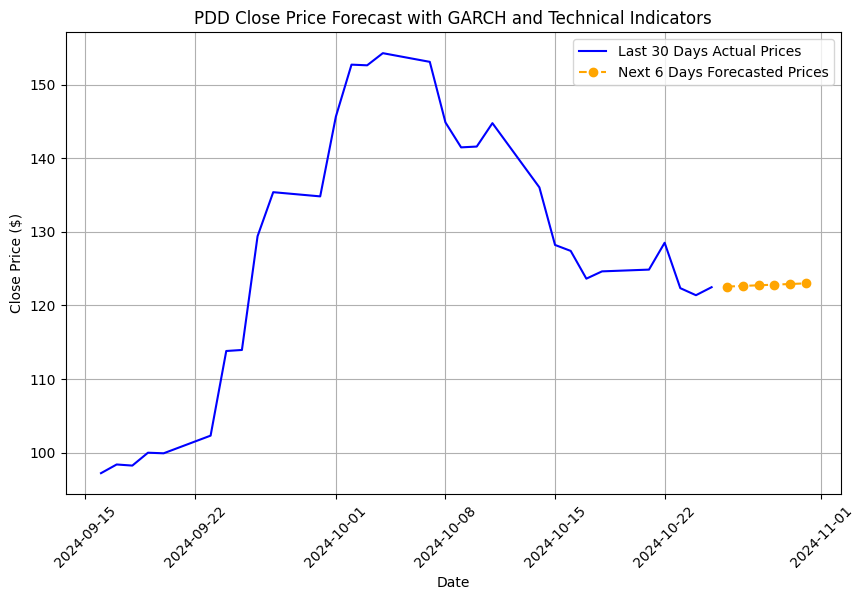

In [ ]:
# =========================================
# 1. Import Required Libraries
# =========================================

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from datetime import timedelta
from sklearn.metrics import mean_squared_error
import ta  # Technical analysis library

# =========================================
# 2. Fetch and Add Technical Indicators
# =========================================

def fetch_pdd_data(ticker="PDD", period="max"):
    """Fetch historical stock data from Yahoo Finance."""
    stock = yf.Ticker(ticker)
    data = stock.history(period=period).dropna()
    return data[['Close', 'Volume']]

def add_technical_indicators(data):
    """Add RSI, MACD, Bollinger Bands, and other indicators."""
    data['RSI'] = ta.momentum.RSIIndicator(data['Close'], window=14).rsi()
    macd = ta.trend.MACD(data['Close'])
    data['MACD'] = macd.macd()
    data['MACD_Signal'] = macd.macd_signal()
    bb = ta.volatility.BollingerBands(data['Close'])
    data['Bollinger_Upper'] = bb.bollinger_hband()
    data['Bollinger_Lower'] = bb.bollinger_lband()

    # Drop NaN values
    data.dropna(inplace=True)
    return data

# Fetch the data and add indicators
data = fetch_pdd_data()
data = add_technical_indicators(data)

# Calculate log returns
data['Log_Returns'] = np.log(data['Close']).diff()
data.dropna(inplace=True)  # Drop remaining NaN values

# Rescale the log returns to avoid warnings
data['Scaled_Returns'] = data['Log_Returns'] * 10

# Prepare exogenous variables (technical indicators)
exog_vars = data[['RSI', 'MACD', 'MACD_Signal', 'Bollinger_Upper', 'Bollinger_Lower', 'Volume']]

# Ensure exact alignment of exogenous variables and returns
scaled_returns = data['Scaled_Returns'].iloc[1:].reset_index(drop=True)
exog_vars = exog_vars.iloc[1:].reset_index(drop=True)

# Print shapes for diagnostics
print(f"Scaled Returns Shape: {scaled_returns.shape}")
print(f"Exogenous Variables Shape: {exog_vars.shape}")

# Check if lengths match
assert len(scaled_returns) == len(exog_vars), "Mismatch between scaled returns and exogenous variables!"

# =========================================
# 3. Fit GARCH(1,1) Model with Exogenous Variables
# =========================================

# Fit the GARCH model with exogenous variables
try:
    model = arch_model(scaled_returns, vol='Garch', p=1, q=1, x=exog_vars)
    garch_result = model.fit(disp='off')
    print(garch_result.summary())
except Exception as e:
    print(f"Error during model fitting: {e}")

# =========================================
# 4. Forecast the Next 6 Days' Prices
# =========================================

def forecast_next_6_days(model_result, last_close, exog_vars=None, n_days=6, scaling_factor=10):
    """Forecast the next 6 days' closing prices using exogenous variables."""
    try:
        # Use the latest n_days of exogenous variables
        exog_forecast = exog_vars.iloc[-n_days:].values if exog_vars is not None else None
        forecast = model_result.forecast(horizon=n_days, x=exog_forecast)
    except TypeError as e:
        print(f"Error during forecasting: {e}. Falling back to no exogenous variables.")
        forecast = model_result.forecast(horizon=n_days)  # Fallback without exogenous variables

    mean_forecast = forecast.mean.values[-1]  # Mean return forecast

    # Convert scaled log returns back to original scale
    predicted_prices = []
    dates = []
    current_price = last_close

    for i in range(n_days):
        next_return = mean_forecast[i] / scaling_factor  # Reverse scaling
        next_price = current_price * np.exp(next_return)
        predicted_prices.append(next_price)
        dates.append(data.index[-1] + timedelta(days=i + 1))
        current_price = next_price  # Update price for next forecast

    return predicted_prices, dates

# Get the last observed closing price
last_close = data['Close'].iloc[-1]

# Forecast the next 6 days' prices with exogenous variables
predicted_prices, forecast_dates = forecast_next_6_days(garch_result, last_close, exog_vars)

# =========================================
# 5. Calculate MSE and MAPE
# =========================================

def mean_absolute_percentage_error(y_true, y_pred):
    """Compute MAPE between actual and predicted values."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    epsilon = 1e-10  # Avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Example: Replace with actual prices if available
actual_prices = [125.12, 126.45, 127.30, 126.95, 125.87, 124.95]  # Example values

# Calculate MSE and MAPE
mse = mean_squared_error(actual_prices, predicted_prices)
mape = mean_absolute_percentage_error(actual_prices, predicted_prices)
MdAPE=np.median(np.abs((np.array(actual_prices) - np.array(predicted_prices)) / np.abs(np.array(actual_prices))) * 100)

# Print the results
print(f"\nMSE: {mse:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"MdAPE: {MdAPE:.2f}%")

# =========================================
# 6. Print and Plot Forecasted Prices
# =========================================

print("\nForecasted Close Prices for the Next 6 Days:")
for date, price in zip(forecast_dates, predicted_prices):
    print(f"{date.date()}: ${price:.2f}")

# Plot the forecasted prices
plt.figure(figsize=(10, 6))
plt.plot(data.index[-30:], data['Close'][-30:], label='Last 30 Days Actual Prices', color='blue')
plt.plot(forecast_dates, predicted_prices, marker='o', linestyle='--', color='orange', label='Next 6 Days Forecasted Prices')

plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.title('PDD Close Price Forecast with GARCH and Technical Indicators')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


Using device: cpu
Total samples: 1496
Input shape: (1496, 40, 12)
Target shape: (1496, 6)
Training samples: 1196
Validation samples: 300
Epoch [1/100]
Train Loss: 0.081435 | Train RMSE: 41.525492 | Train MAE: 32.429747 | Train MAPE: 65.44%
Val Loss: 0.008277 | Val RMSE: 15.990341 | Val MAE: 13.389130 | Val MAPE: 11.02%

Validation loss decreased (0.008277 --> 0.008277).  Saving model ...
Validation loss decreased (0.005422 --> 0.005422).  Saving model ...
Validation loss decreased (0.005110 --> 0.005110).  Saving model ...
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
Validation loss decreased (0.004297 --> 0.004297).  Saving model ...
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
Validation loss decreased (0.004117 --> 0.004117).  Saving model ...
Epoch [10/100]
Train Loss: 0.001780 | Train RMSE: 7.741411 | Train MAE: 5.684789 | Train MAPE: 9.25%
Val Loss: 0.004492 | Val RMSE: 10.713605 | Val MAE: 8.717132 | Val MAPE: 7.31%

EarlyStoppin

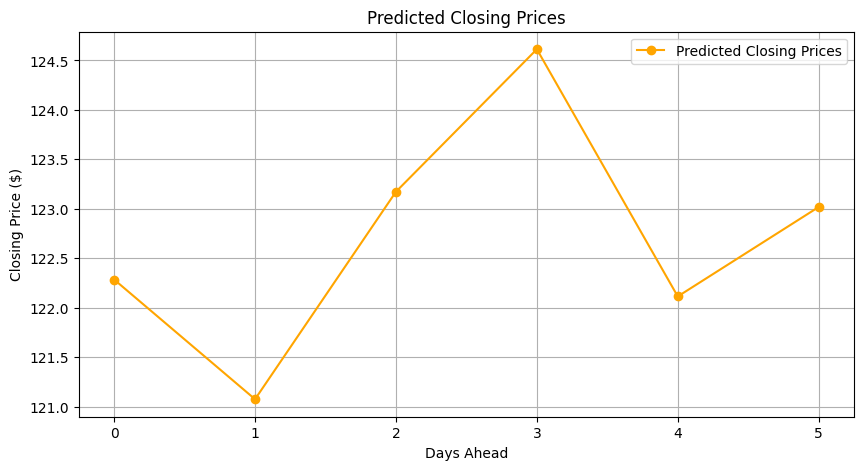

In [ ]:
# =========================================
# 1. Importing Necessary Libraries
# =========================================

import torch
import torch.nn as nn
import torch.nn.functional as F
import yfinance as yf
import pandas as pd
import numpy as np
import ta  # Technical analysis library
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
import math
import os
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# =========================================
# 2. Defining Custom Layers and Blocks
# =========================================

# -----------------------------------------
# 2.1. Embedding Layers
# -----------------------------------------

class PositionalEmbedding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEmbedding, self).__init__()
        # Compute the positional encodings once in log space.
        pe = torch.zeros(max_len, d_model).float()
        pe.requires_grad = False

        position = torch.arange(0, max_len).float().unsqueeze(1)
        div_term = (torch.arange(0, d_model, 2).float()
                    * -(math.log(10000.0) / d_model)).exp()

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return self.pe[:, :x.size(1)]

class TokenEmbedding(nn.Module):
    def __init__(self, c_in, d_model):
        super(TokenEmbedding, self).__init__()
        padding = 1 if torch.__version__ >= '1.5.0' else 2
        self.tokenConv = nn.Conv1d(in_channels=c_in, out_channels=d_model,
                                   kernel_size=3, padding=padding, padding_mode='circular', bias=False)
        for m in self.modules():
            if isinstance(m, nn.Conv1d):
                nn.init.kaiming_normal_(
                    m.weight, mode='fan_in', nonlinearity='leaky_relu')

    def forward(self, x):
        x = self.tokenConv(x.permute(0, 2, 1)).transpose(1, 2)
        return x

class FixedEmbedding(nn.Module):
    def __init__(self, c_in, d_model):
        super(FixedEmbedding, self).__init__()

        w = torch.zeros(c_in, d_model).float()
        w.requires_grad = False

        position = torch.arange(0, c_in).float().unsqueeze(1)
        div_term = (torch.arange(0, d_model, 2).float()
                    * -(math.log(10000.0) / d_model)).exp()

        w[:, 0::2] = torch.sin(position * div_term)
        w[:, 1::2] = torch.cos(position * div_term)

        self.emb = nn.Embedding(c_in, d_model)
        self.emb.weight = nn.Parameter(w, requires_grad=False)

    def forward(self, x):
        return self.emb(x).detach()

class TemporalEmbedding(nn.Module):
    def __init__(self, d_model, embed_type='fixed', freq='h'):
        super(TemporalEmbedding, self).__init__()

        minute_size = 4
        hour_size = 24
        weekday_size = 7
        day_size = 32
        month_size = 13

        Embed = FixedEmbedding if embed_type == 'fixed' else nn.Embedding
        if freq == 't':
            self.minute_embed = Embed(minute_size, d_model)
        self.hour_embed = Embed(hour_size, d_model)
        self.weekday_embed = Embed(weekday_size, d_model)
        self.day_embed = Embed(day_size, d_model)
        self.month_embed = Embed(month_size, d_model)

    def forward(self, x):
        x = x.long()
        minute_x = self.minute_embed(x[:, :, 4]) if hasattr(
            self, 'minute_embed') else 0.
        hour_x = self.hour_embed(x[:, :, 3])
        weekday_x = self.weekday_embed(x[:, :, 2])
        day_x = self.day_embed(x[:, :, 1])
        month_x = self.month_embed(x[:, :, 0])

        return hour_x + weekday_x + day_x + month_x + minute_x

class TimeFeatureEmbedding(nn.Module):
    def __init__(self, d_model, embed_type='timeF', freq='h'):
        super(TimeFeatureEmbedding, self).__init__()

        freq_map = {'h': 4, 't': 5, 's': 6,
                    'm': 1, 'a': 1, 'w': 2, 'd': 3, 'b': 3}
        d_inp = freq_map[freq]
        self.embed = nn.Linear(d_inp, d_model, bias=False)

    def forward(self, x):
        return self.embed(x)

class DataEmbedding(nn.Module):
    def __init__(self, c_in, d_model, embed_type='fixed', freq='h', dropout=0.1):
        super(DataEmbedding, self).__init__()

        self.value_embedding = TokenEmbedding(c_in=c_in, d_model=d_model)
        self.position_embedding = PositionalEmbedding(d_model=d_model)
        self.temporal_embedding = TemporalEmbedding(d_model=d_model, embed_type=embed_type,
                                                    freq=freq) if embed_type != 'timeF' else TimeFeatureEmbedding(
            d_model=d_model, embed_type=embed_type, freq=freq)
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, x, x_mark=None):
        if x_mark is None:
            x = self.value_embedding(x) + self.position_embedding(x)
        else:
            x = self.value_embedding(
                x) + self.temporal_embedding(x_mark) + self.position_embedding(x)
        return self.dropout(x)

# -----------------------------------------
# 2.2. Convolutional Blocks
# -----------------------------------------

class Inception_Block_V1(nn.Module):
    def __init__(self, in_channels, out_channels, num_kernels=6, init_weight=True):
        super(Inception_Block_V1, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.num_kernels = num_kernels
        kernels = []
        for i in range(self.num_kernels):
            kernels.append(nn.Conv2d(in_channels, out_channels, kernel_size=2 * i + 1, padding=i))
        self.kernels = nn.ModuleList(kernels)
        if init_weight:
            self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)

    def forward(self, x):
        res_list = []
        for i in range(self.num_kernels):
            res_list.append(self.kernels[i](x))
        res = torch.stack(res_list, dim=-1).mean(-1)
        return res

class Inception_Block_V2(nn.Module):
    def __init__(self, in_channels, out_channels, num_kernels=6, init_weight=True):
        super(Inception_Block_V2, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.num_kernels = num_kernels
        kernels = []
        for i in range(self.num_kernels // 2):
            kernels.append(nn.Conv2d(in_channels, out_channels, kernel_size=[1, 2 * i + 3], padding=[0, i + 1]))
            kernels.append(nn.Conv2d(in_channels, out_channels, kernel_size=[2 * i + 3, 1], padding=[i + 1, 0]))
        kernels.append(nn.Conv2d(in_channels, out_channels, kernel_size=1))
        self.kernels = nn.ModuleList(kernels)
        if init_weight:
            self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)

    def forward(self, x):
        res_list = []
        for i in range(self.num_kernels // 2 * 2 + 1):
            res_list.append(self.kernels[i](x))
        res = torch.stack(res_list, dim=-1).mean(-1)
        return res

# -----------------------------------------
# 2.3. TimesBlock
# -----------------------------------------

class TimesBlock(nn.Module):
    def __init__(self, configs):
        super(TimesBlock, self).__init__()
        self.seq_len = configs['seq_len']
        self.pred_len = configs['pred_len']
        self.k = configs['top_k']
        self.conv = nn.Sequential(
            Inception_Block_V1(
                in_channels=configs['d_model'],                # e.g., 64
                out_channels=configs['conv_out_channels'],      # e.g., 32
                num_kernels=configs['conv_num_kernels']        # e.g., 6
            ),
            nn.GELU(),
            Inception_Block_V1(
                in_channels=configs['conv_out_channels'],       # e.g., 32
                out_channels=configs['d_model'],                # e.g., 64
                num_kernels=configs['conv_num_kernels']        # e.g., 6
            )
        )

    def forward(self, x):
        B, T, N = x.size()
        x = x.permute(0, 2, 1).unsqueeze(3)  # Shape: [B, C=d_model, T, 1]
        out = self.conv(x)  # After first block: [B, conv_out_channels, T, 1], second block: [B, d_model, T, 1]
        out = out.squeeze(3).permute(0, 2, 1)  # Shape: [B, T, d_model]
        return out

# -----------------------------------------
# 2.4. Main Model
# -----------------------------------------

class Model(nn.Module):
    def __init__(self, configs):
        super(Model, self).__init__()
        self.configs = configs
        self.enc_embedding = DataEmbedding(
            c_in=configs['enc_in'],
            d_model=configs['d_model'],
            embed_type=configs['embed'],
            freq=configs['freq'],
            dropout=configs['dropout']
        )
        self.model = nn.ModuleList([TimesBlock(configs) for _ in range(configs['e_layers'])])
        self.layer_norm = nn.LayerNorm(configs['d_model'])
        self.predict_linear = nn.Linear(configs['d_model'], configs['pred_len'])

    def forward(self, x_enc, x_mark=None):
        enc_out = self.enc_embedding(x_enc, x_mark)  # [B, T, C=d_model]
        for i in range(self.configs['e_layers']):
            enc_out = self.model[i](enc_out)          # [B, T, C=d_model]
            enc_out = self.layer_norm(enc_out)        # [B, T, C=d_model]
        dec_out = self.predict_linear(enc_out[:, -1, :])  # [B, pred_len]
        return dec_out.unsqueeze(1)  # [B, 1, pred_len]

# =========================================
# 3. Data Fetching and Preprocessing
# =========================================

# -----------------------------------------
# 3.1. Fetch Historical Data
# -----------------------------------------

def fetch_data(ticker="PDD", period="max"):
    """
    Fetch historical stock data using yfinance.

    Args:
        ticker (str): Stock ticker symbol.
        period (str): Data period (e.g., 'max', '1y', '6mo').

    Returns:
        pd.DataFrame: Historical stock data.
    """
    stock = yf.Ticker(ticker)
    data = stock.history(period=period)
    return data

# -----------------------------------------
# 3.2. Add Technical Indicators
# -----------------------------------------

def add_technical_indicators(data):
    """
    Add technical indicators to the stock data.

    Args:
        data (pd.DataFrame): Stock data with columns ['Open', 'High', 'Low', 'Close', 'Volume'].

    Returns:
        pd.DataFrame: Stock data with added technical indicators.
    """
    data['RSI'] = ta.momentum.RSIIndicator(close=data['Close'], window=14).rsi()
    macd = ta.trend.MACD(close=data['Close'])
    data['MACD'] = macd.macd()
    data['MACD_Signal'] = macd.macd_signal()
    data['MACD_Diff'] = macd.macd_diff()
    data['ATR'] = ta.volatility.AverageTrueRange(
        high=data['High'], low=data['Low'], close=data['Close'], window=14
    ).average_true_range()
    return data

# -----------------------------------------
# 3.3. Prepare Data with Lag Features
# -----------------------------------------

def prepare_lag_features(data, lags=[1,3]):
    """
    Add lag features to the data.

    Args:
        data (pd.DataFrame): Stock data.
        lags (list): List of lag periods.

    Returns:
        pd.DataFrame: Data with lag features.
    """
    for lag in lags:
        data[f'Open_Lag_{lag}'] = data['Open'].shift(lag)
    data = data.dropna()
    return data

# -----------------------------------------
# 3.4. Scaling Data
# -----------------------------------------

def scale_data(data):
    """
    Scale the data using MinMaxScaler.

    Args:
        data (pd.DataFrame): Data to be scaled.

    Returns:
        tuple: Scaled data as numpy array, open scaler, other features scaler.
    """
    scaler_open = MinMaxScaler()
    scaler_other = MinMaxScaler()

    scaled_open = scaler_open.fit_transform(data[['Close']])
    scaled_other = scaler_other.fit_transform(data.drop(columns=['Close']))
    scaled_data = np.hstack([scaled_open, scaled_other])

    return scaled_data, scaler_open, scaler_other

# -----------------------------------------
# 3.5. Create Sequences for Training
# -----------------------------------------

def create_sequences(data, seq_length, pred_length):
    """
    Create input and target sequences for the model.

    Args:
        data (np.ndarray): Scaled data array.
        seq_length (int): Length of input sequences.
        pred_length (int): Length of prediction sequences.

    Returns:
        tuple: Input sequences and target sequences.
    """
    xs = []
    ys = []
    for i in range(len(data) - seq_length - pred_length + 1):
        x = data[i:(i + seq_length)]
        y = data[(i + seq_length):(i + seq_length + pred_length), 0]  # Predict 'Close' prices
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# =========================================
# 4. Model Configuration and Initialization
# =========================================

# -----------------------------------------
# 4.1. Configuration Parameters
# -----------------------------------------

configs = {
    'enc_in': 12,            # Number of features after scaling (Close + others)
    'd_model': 64,           # Dimension of the model
    'conv_out_channels': 32, # Out channels for Inception_Block_V1
    'conv_num_kernels': 6,   # Number of convolutional kernels in Inception_Block_V1
    'seq_len': 40,           # Sequence length
    'pred_len': 6,           # Prediction length
    'top_k': 2,              # Top K (used in TimesBlock, adjust as needed)
    'e_layers': 2,           # Number of encoder layers
    'embed': 'timeF',        # Embedding type
    'freq': 'h',             # Frequency of the data
    'dropout': 0.1           # Dropout rate
}

# =========================================
# 5. Training the Model
# =========================================

# -----------------------------------------
# 5.1. Fetch and Preprocess Data
# -----------------------------------------

# Fetch data
ticker = "PDD"  # You can change this to any stock ticker symbol
period = "max"  # You can adjust the period as needed
data = fetch_data(ticker=ticker, period=period)

# Select relevant features
features = ['Open', 'High', 'Low', 'Close', 'Volume']
data = data[features].dropna()

# Add technical indicators
data = add_technical_indicators(data)

# Add lag features
data = prepare_lag_features(data, lags=[1,3])

# Drop any remaining NaNs
data = data.dropna()

# Scale data
scaled_data, scaler_open, scaler_other = scale_data(data)

# Update 'enc_in' based on scaled_data
configs['enc_in'] = scaled_data.shape[1]

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Initialize the model with updated 'enc_in'
model = Model(configs).to(device)

# Create sequences
seq_length = configs['seq_len']
pred_length = configs['pred_len']
X, y = create_sequences(scaled_data, seq_length, pred_length)

print(f"Total samples: {len(X)}")
print(f"Input shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split into training and validation sets (80% train, 20% val)
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:], y[train_size:]

print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")

# Convert to tensors and move to device
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).to(device)

# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training parameters
num_epochs = 100
batch_size = 32

# Create DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# -----------------------------------------
# 5.2. Define Metric Functions
# -----------------------------------------

def calculate_rmse_np(preds, targets):
    return np.sqrt(np.mean((preds - targets) ** 2))

def calculate_mae_np(preds, targets):
    return np.mean(np.abs(preds - targets))

def calculate_mape_np(preds, targets):
    # To avoid division by zero, add a small epsilon where targets are zero
    epsilon = 1e-8
    return np.mean(np.abs((targets - preds) / (targets + epsilon))) * 100

# -----------------------------------------
# 5.3. Early Stopping Class
# -----------------------------------------

class EarlyStopping:
    """
    Early stops the training if validation loss doesn't improve after a given patience.
    """
    def __init__(self, patience=10, verbose=False, delta=0, path='best_model.pth'):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
            verbose (bool): If True, prints a message for each validation loss improvement.
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
            path (str): Path for the checkpoint to be saved to.
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.delta = delta
        self.path = path

    def __call__(self, val_loss, model):

        if self.best_loss is None:
            self.best_loss = val_loss
            self.save_checkpoint(val_loss, model)
        elif val_loss > self.best_loss - self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.best_loss:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)

# -----------------------------------------
# 5.4. Initialize Early Stopping
# -----------------------------------------

early_stopping = EarlyStopping(patience=10, verbose=True, path='best_model.pth')

# -----------------------------------------
# 5.5. Training Loop with Metrics and Early Stopping
# -----------------------------------------

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    train_rmse = 0
    train_mae = 0
    train_mape = 0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)  # Shape: [B, 1, pred_len]
        outputs = outputs.squeeze(1)  # Shape: [B, pred_len]
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * batch_x.size(0)

        # Move tensors to CPU and convert to numpy for inverse scaling
        outputs_np = outputs.detach().cpu().numpy()
        batch_y_np = batch_y.detach().cpu().numpy()

        # Inverse transform to original scale
        outputs_unscaled = scaler_open.inverse_transform(outputs_np)
        batch_y_unscaled = scaler_open.inverse_transform(batch_y_np)

        # Calculate metrics on the original scale
        train_rmse += calculate_rmse_np(outputs_unscaled, batch_y_unscaled) * batch_x.size(0)
        train_mae += calculate_mae_np(outputs_unscaled, batch_y_unscaled) * batch_x.size(0)
        train_mape += calculate_mape_np(outputs_unscaled, batch_y_unscaled) * batch_x.size(0)
    epoch_loss /= len(train_loader.dataset)
    train_rmse /= len(train_loader.dataset)
    train_mae /= len(train_loader.dataset)
    train_mape /= len(train_loader.dataset)

    # Validation
    model.eval()
    val_loss = 0
    val_rmse = 0
    val_mae = 0
    val_mape = 0
    with torch.no_grad():
        for batch_x, batch_y in val_loader:
            outputs = model(batch_x)
            outputs = outputs.squeeze(1)
            loss = criterion(outputs, batch_y)
            val_loss += loss.item() * batch_x.size(0)

            # Move tensors to CPU and convert to numpy for inverse scaling
            outputs_np = outputs.detach().cpu().numpy()
            batch_y_np = batch_y.detach().cpu().numpy()

            # Inverse transform to original scale
            outputs_unscaled = scaler_open.inverse_transform(outputs_np)
            batch_y_unscaled = scaler_open.inverse_transform(batch_y_np)

            # Calculate metrics on the original scale
            val_rmse += calculate_rmse_np(outputs_unscaled, batch_y_unscaled) * batch_x.size(0)
            val_mae += calculate_mae_np(outputs_unscaled, batch_y_unscaled) * batch_x.size(0)
            val_mape += calculate_mape_np(outputs_unscaled, batch_y_unscaled) * batch_x.size(0)
        val_loss /= len(val_loader.dataset)
        val_rmse /= len(val_loader.dataset)
        val_mae /= len(val_loader.dataset)
        val_mape /= len(val_loader.dataset)

    # Logging every 10 epochs and the first epoch
    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}]")
        print(f"Train Loss: {epoch_loss:.6f} | Train RMSE: {train_rmse:.6f} | Train MAE: {train_mae:.6f} | Train MAPE: {train_mape:.2f}%")
        print(f"Val Loss: {val_loss:.6f} | Val RMSE: {val_rmse:.6f} | Val MAE: {val_mae:.6f} | Val MAPE: {val_mape:.2f}%\n")

    # Early Stopping
    early_stopping(val_loss, model)
    if early_stopping.early_stop:
        print("Early stopping triggered.")
        break

# Load the best model
model.load_state_dict(torch.load('best_model.pth'))
print("Loaded the best model from early stopping.")

# =========================================
# 6. Making Predictions
# =========================================

# -----------------------------------------
# 6.1. Prepare the Latest Sequence for Prediction
# -----------------------------------------

SEQ_LENGTH = configs['seq_len']
PRED_LENGTH = configs['pred_len']

if len(scaled_data) < SEQ_LENGTH:
    raise ValueError(f"Not enough data to form a sequence of length {SEQ_LENGTH}.")

last_seq = scaled_data[-SEQ_LENGTH:]  # Shape: (SEQ_LENGTH, feature_size)
last_seq = np.expand_dims(last_seq, axis=0)  # Shape: (1, SEQ_LENGTH, feature_size)

# Convert to tensor and move to device
last_seq_tensor = torch.tensor(last_seq, dtype=torch.float32).to(device)

# -----------------------------------------
# 6.2. Load the Trained Model
# -----------------------------------------

# Initialize the model (ensure it's on the correct device)
model = Model(configs).to(device)

# Load the best trained weights from early stopping
model.load_state_dict(torch.load('best_model.pth', map_location=device))
model.eval()
print("Loaded the best trained model for prediction.")

# -----------------------------------------
# 6.3. Make Predictions
# -----------------------------------------

with torch.no_grad():
    prediction = model(last_seq_tensor, x_mark=None).cpu().numpy()

# Inverse transform the predictions to the original scale
predicted_close = scaler_open.inverse_transform(prediction.reshape(-1, 1)).flatten()

print("\nPredicted Closing Prices:")
start_date = data.index[-1] + pd.Timedelta(days=1)  # Start from the day after the last available data
for i, price in enumerate(predicted_close, start=1):
    date = start_date + pd.Timedelta(days=i - 1)
    print(f"{date.date()}: ${price:.2f}")

# =========================================
# 7. Visualizing Predictions
# =========================================

plt.figure(figsize=(10, 5))
plt.plot(predicted_close, marker='o', label='Predicted Closing Prices', color='orange')
plt.title('Predicted Closing Prices')
plt.xlabel('Days Ahead')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 982.9/982.9 kB 10.5 MB/s eta 0:00:00


Returns shape: (1000,)
Exogenous Variables shape: (1000, 2)
Fold RMSE: 0.9320, Fold MAPE: 107.67%
Fold RMSE: 0.9878, Fold MAPE: 101.34%
Fold RMSE: 1.0031, Fold MAPE: 107.42%
Fold RMSE: 1.0194, Fold MAPE: 101.78%
Fold RMSE: 0.9644, Fold MAPE: 102.29%

Average RMSE across folds: 0.9813
Average MAPE across folds: 104.10%
Exogenous Forecast Dictionary: {'x0': array([ 1.51639406,  0.07203686, -0.95191846,  0.25775254,  0.33417642]), 'x1': array([ 0.60211832, -0.21220897,  0.07748052, -1.24176058, -0.15525905])}
Forecasted Mean Returns for the Next 5 Days:
[ 0.05071035  0.01488779  0.01093094 -0.00855402  0.01914292]

Forecasted Close Prices for the Next 5 Days:
Day 1: $131.63
Day 2: $133.60
Day 3: $135.07
Day 4: $133.92
Day 5: $136.51


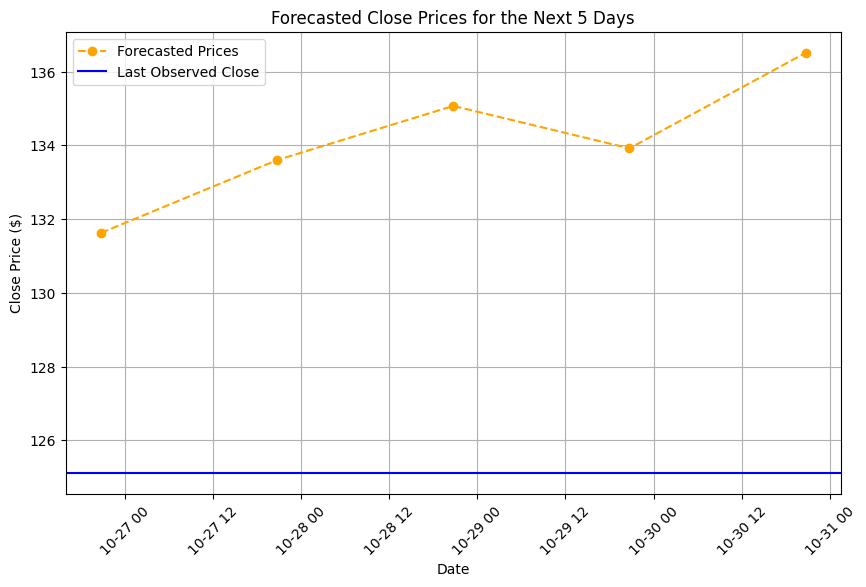

In [ ]:
# =========================================
# 1. Import Required Libraries
# =========================================

import numpy as np
import pandas as pd
from arch import arch_model
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# =========================================
# 2. Generate Dummy Data for GARCH with Exogenous Variables
# =========================================

np.random.seed(42)  # For reproducibility

# Generate 1000 data points for returns and exogenous variables
returns = np.random.normal(0, 1, 1000)  # Simulated returns
exog_vars = np.random.normal(0, 1, (1000, 2))  # Two exogenous variables

# Ensure shapes match
print(f"Returns shape: {returns.shape}")
print(f"Exogenous Variables shape: {exog_vars.shape}")

# =========================================
# 3. Define K-Fold Cross-Validation and Metrics
# =========================================

def calculate_metrics(actual, predicted):
    """Calculate RMSE and MAPE."""
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = mean_absolute_percentage_error(actual, predicted) * 100  # Convert to %
    return rmse, mape

def k_fold_cross_validation(returns, exog_vars, n_splits=5):
    """Perform K-Fold cross-validation."""
    kf = KFold(n_splits=n_splits)
    rmse_scores = []
    mape_scores = []

    for train_index, test_index in kf.split(returns):
        # Split the data into train and test sets
        returns_train, returns_test = returns[train_index], returns[test_index]
        exog_train, exog_test = exog_vars[train_index], exog_vars[test_index]

        # Fit the GARCH model on the training set
        model = arch_model(returns_train, mean='HARX', lags=0, vol='Garch', p=1, q=1, x=exog_train)
        result = model.fit(disp='off')

        # Forecast on the test set
        exog_forecast = {f"x{i}": exog_test[:, i] for i in range(exog_vars.shape[1])}
        forecast = result.forecast(horizon=len(test_index), x=exog_forecast)
        predicted_returns = forecast.mean.values[-1]  # Get forecasted returns

        # Calculate metrics
        rmse, mape = calculate_metrics(returns_test, predicted_returns)
        rmse_scores.append(rmse)
        mape_scores.append(mape)

        print(f"Fold RMSE: {rmse:.4f}, Fold MAPE: {mape:.2f}%")

    # Return average metrics
    avg_rmse = np.mean(rmse_scores)
    avg_mape = np.mean(mape_scores)
    return avg_rmse, avg_mape

# Perform K-Fold cross-validation
avg_rmse, avg_mape = k_fold_cross_validation(returns, exog_vars, n_splits=5)
print(f"\nAverage RMSE across folds: {avg_rmse:.4f}")
print(f"Average MAPE across folds: {avg_mape:.2f}%")

# =========================================
# 4. Forecast the Next 5 Days' Prices
# =========================================

def forecast_with_exog(result, exog_vars, n_days=5):
    """Forecast the next n_days using exogenous variables."""
    try:
        # Prepare a dictionary with the exogenous variables for forecasting
        exog_forecast = {f"x{i}": exog_vars[-n_days:, i] for i in range(exog_vars.shape[1])}
        print(f"Exogenous Forecast Dictionary: {exog_forecast}")

        # Forecast using the GARCH model
        forecast = result.forecast(horizon=n_days, x=exog_forecast)
        return forecast.mean.values[-1]  # Return mean forecasted returns
    except Exception as e:
        print(f"Error during forecasting: {e}")
        return None

# Fit the final model on the entire dataset
model = arch_model(returns, mean='HARX', lags=0, vol='Garch', p=1, q=1, x=exog_vars)
result = model.fit(disp='off')

# Forecast the next 5 days' returns
forecasted_values = forecast_with_exog(result, exog_vars, n_days=5)

if forecasted_values is not None:
    print("Forecasted Mean Returns for the Next 5 Days:")
    print(forecasted_values)
else:
    print("Forecasting failed.")

# =========================================
# 5. Convert Forecasted Returns to Prices
# =========================================

def convert_returns_to_prices(last_close, forecasted_returns):
    """Convert forecasted returns into predicted prices."""
    predicted_prices = []
    current_price = last_close

    for ret in forecasted_returns:
        next_price = current_price * np.exp(ret)  # Reverse log-return
        predicted_prices.append(next_price)
        current_price = next_price  # Update for next forecast

    return predicted_prices

# Assume the last observed closing price
last_close = 125.12  # Example value

# Convert the forecasted returns to predicted prices
if forecasted_values is not None:
    predicted_prices = convert_returns_to_prices(last_close, forecasted_values)

    print("\nForecasted Close Prices for the Next 5 Days:")
    for i, price in enumerate(predicted_prices, 1):
        print(f"Day {i}: ${price:.2f}")
else:
    print("No forecasted values available for price conversion.")

# =========================================
# 6. Plot Forecasted Prices
# =========================================

def plot_forecasted_prices(predicted_prices, last_close):
    """Plot the forecasted prices."""
    dates = pd.date_range(start=pd.Timestamp.today(), periods=len(predicted_prices) + 1)[1:]

    plt.figure(figsize=(10, 6))
    plt.plot(dates, predicted_prices, marker='o', linestyle='--', color='orange', label='Forecasted Prices')
    plt.axhline(y=last_close, color='blue', linestyle='-', label='Last Observed Close')

    plt.xlabel('Date')
    plt.ylabel('Close Price ($)')
    plt.title('Forecasted Close Prices for the Next 5 Days')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

# Plot the forecasted prices
if forecasted_values is not None:
    plot_forecasted_prices(predicted_prices, last_close)


Tested (p, q)=(1, 1), AIC: 1040.2718
Tested (p, q)=(1, 2), AIC: 1042.2718
Tested (p, q)=(2, 1), AIC: 1041.0290
Tested (p, q)=(2, 2), AIC: 1037.1212

Best GARCH Order: (2, 2) with AIC: 1037.1212
Fold RMSE: 2.7297, Fold MAPE: 723.43%, Fold MdAPE: 187.08%
Fold RMSE: 2.5126, Fold MAPE: 134.19%, Fold MdAPE: 87.59%
Fold RMSE: 2.5225, Fold MAPE: 395.97%, Fold MdAPE: 114.59%
Fold RMSE: 4.9243, Fold MAPE: 712.59%, Fold MdAPE: 85.41%
Fold RMSE: 6.3256, Fold MAPE: 1195.75%, Fold MdAPE: 239.01%

Average RMSE across folds: 3.8029
Average MAPE across folds: 632.39%
Average MdAPE across folds: 142.74%

Forecasted Close Prices for the Next 5 Days:
Day 1: $121.12
Day 2: $119.36
Day 3: $117.18
Day 4: $116.55
Day 5: $116.42


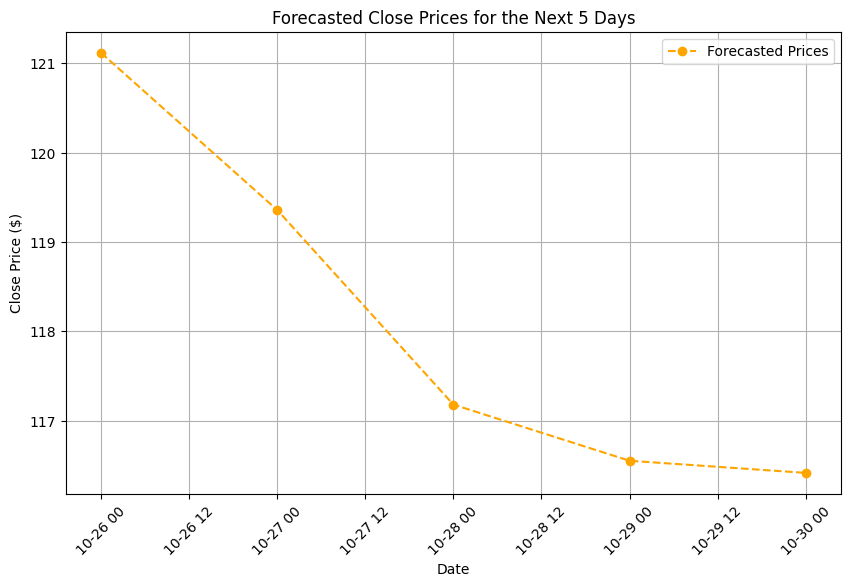

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import yfinance as yf
import ta

# =========================================
# 1. Fetch Data and Add Technical Indicators
# =========================================
def fetch_pdd_data(ticker="PDD", period="1y"):
    stock = yf.Ticker(ticker)
    data = stock.history(period=period).dropna()
    return data[['Close', 'Volume']]

def add_technical_indicators(data):
    data['RSI'] = ta.momentum.RSIIndicator(data['Close'], window=14).rsi()
    macd = ta.trend.MACD(data['Close'])
    data['MACD'] = macd.macd()
    data['MACD_Signal'] = macd.macd_signal()
    bb = ta.volatility.BollingerBands(data['Close'])
    data['Bollinger_Upper'] = bb.bollinger_hband()
    data['Bollinger_Lower'] = bb.bollinger_lband()
    data.dropna(inplace=True)
    return data

# Fetch and preprocess data
data = fetch_pdd_data()
data = add_technical_indicators(data)

# Calculate log returns and remove NaN
data['Log_Returns'] = np.log(data['Close']).diff()
data.dropna(inplace=True)

# Standardize exogenous variables
scaler = StandardScaler()
exog_vars = pd.DataFrame(
    scaler.fit_transform(data[['RSI', 'MACD', 'MACD_Signal',
                               'Bollinger_Upper', 'Bollinger_Lower', 'Volume']]),
    columns=['RSI', 'MACD', 'MACD_Signal', 'Bollinger_Upper',
             'Bollinger_Lower', 'Volume'])

# Align exogenous variables with returns
exog_vars = exog_vars.iloc[1:].reset_index(drop=True)
filtered_returns = data['Log_Returns'].iloc[1:] * 100  # Rescaled returns

# =========================================
# 2. Grid Search for Optimal (p, q) Parameters
# =========================================
def grid_search_garch(returns, exog_vars, p_values=[1, 2], q_values=[1, 2]):
    best_aic = np.inf
    best_order = None
    best_model = None

    for p in p_values:
        for q in q_values:
            try:
                model = arch_model(returns, mean='HARX', lags=0, vol='Garch', p=p, q=q, x=exog_vars)
                result = model.fit(disp='off')
                if result.aic < best_aic:
                    best_aic = result.aic
                    best_order = (p, q)
                    best_model = result
                print(f'Tested (p, q)=({p}, {q}), AIC: {result.aic:.4f}')
            except Exception as e:
                print(f'Failed to fit GARCH({p}, {q}): {e}')
                continue

    print(f'\nBest GARCH Order: {best_order} with AIC: {best_aic:.4f}')
    return best_model

# Perform grid search to find the best (p, q)
best_model = grid_search_garch(filtered_returns, exog_vars)

# =========================================
# 3. K-Fold Cross-Validation
# =========================================
def calculate_metrics(actual, predicted):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / np.abs(actual)) * 100)  # Corrected line
    mdape = np.median(np.abs((actual - predicted) / np.abs(actual)) * 100)
    return rmse, mape, mdape

def k_fold_cross_validation(returns, exog_vars, n_splits=5):
    kf = KFold(n_splits=n_splits)
    rmse_scores, mape_scores, mdape_scores = [], [], []

    for train_index, test_index in kf.split(returns):
        returns_train, returns_test = returns[train_index], returns[test_index]
        exog_train, exog_test = exog_vars.iloc[train_index], exog_vars.iloc[test_index]

        model = arch_model(returns_train, mean='HARX', lags=0, vol='Garch',
                           p=best_model.model.volatility.p,
                           q=best_model.model.volatility.q, x=exog_train)
        result = model.fit(disp='off')

        exog_forecast = {col: exog_test[col].values for col in exog_test.columns}
        forecast = result.forecast(horizon=len(test_index), x=exog_forecast)
        predicted_returns = forecast.mean.values[-1]

        rmse, mape, mdape = calculate_metrics(returns_test, predicted_returns)
        rmse_scores.append(rmse)
        mape_scores.append(mape)
        mdape_scores.append(mdape)
        print(f"Fold RMSE: {rmse:.4f}, Fold MAPE: {mape:.2f}%, Fold MdAPE: {mdape:.2f}%")

    return np.mean(rmse_scores), np.mean(mape_scores), np.mean(mdape_scores)

# Perform cross-validation
avg_rmse, avg_mape, avg_mdape = k_fold_cross_validation(filtered_returns.values, exog_vars, n_splits=5)

print(f"\nAverage RMSE across folds: {avg_rmse:.4f}")
print(f"Average MAPE across folds: {avg_mape:.2f}%")
print(f"Average MdAPE across folds: {avg_mdape:.2f}%")

# =========================================
# 4. Forecasting with Best Model
# =========================================
def forecast_with_exog(result, exog_vars, n_days=5):
    exog_forecast = {col: exog_vars.iloc[-n_days:, i].values for i, col in enumerate(exog_vars.columns)}
    forecast = result.forecast(horizon=n_days, x=exog_forecast)
    return forecast.mean.values[-1]

forecasted_returns = forecast_with_exog(best_model, exog_vars)

# =========================================
# 5. Convert Returns to Prices
# =========================================
last_close = data['Close'].iloc[-1]

def convert_returns_to_prices(last_close, forecasted_returns):
    prices = []
    current_price = last_close
    for ret in forecasted_returns:
        next_price = current_price * np.exp(ret / 100)
        prices.append(next_price)
        current_price = next_price
    return prices

predicted_prices = convert_returns_to_prices(last_close, forecasted_returns)

print("\nForecasted Close Prices for the Next 5 Days:")
for i, price in enumerate(predicted_prices, 1):
    print(f"Day {i}: ${price:.2f}")

# Plot results
dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=5)
plt.figure(figsize=(10, 6))
plt.plot(dates, predicted_prices, marker='o', linestyle='--', color='orange', label='Forecasted Prices')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.title('Forecasted Close Prices for the Next 5 Days')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


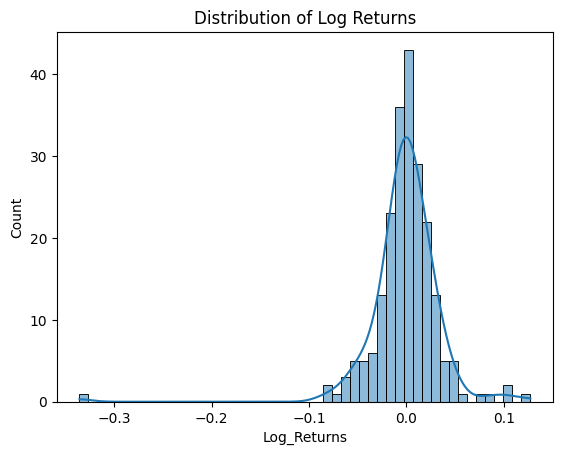

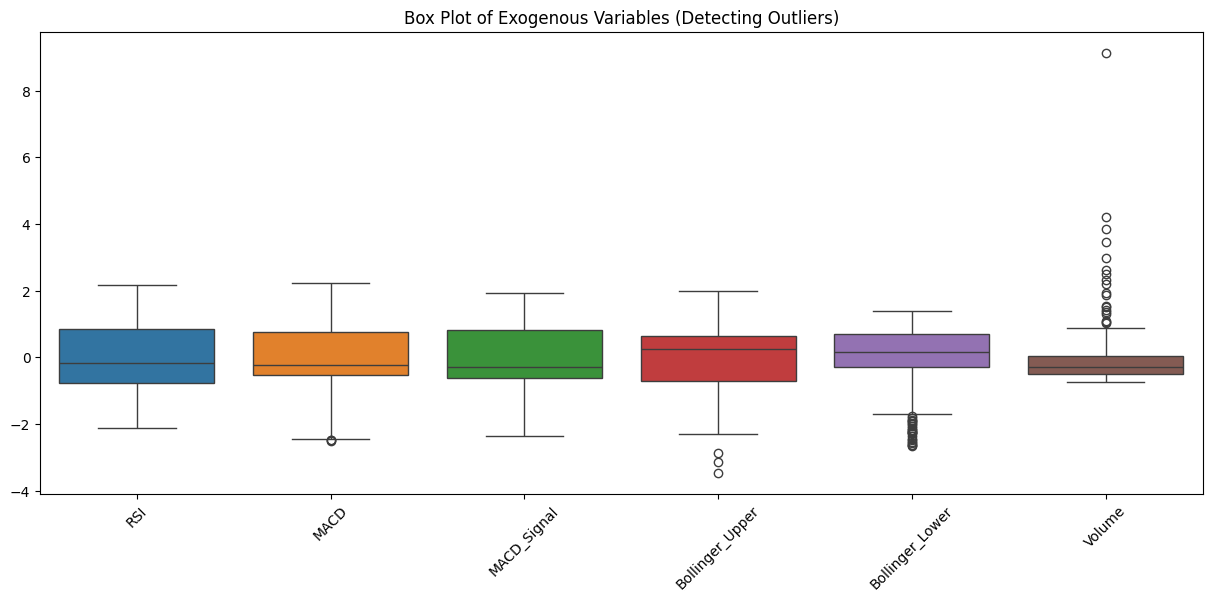

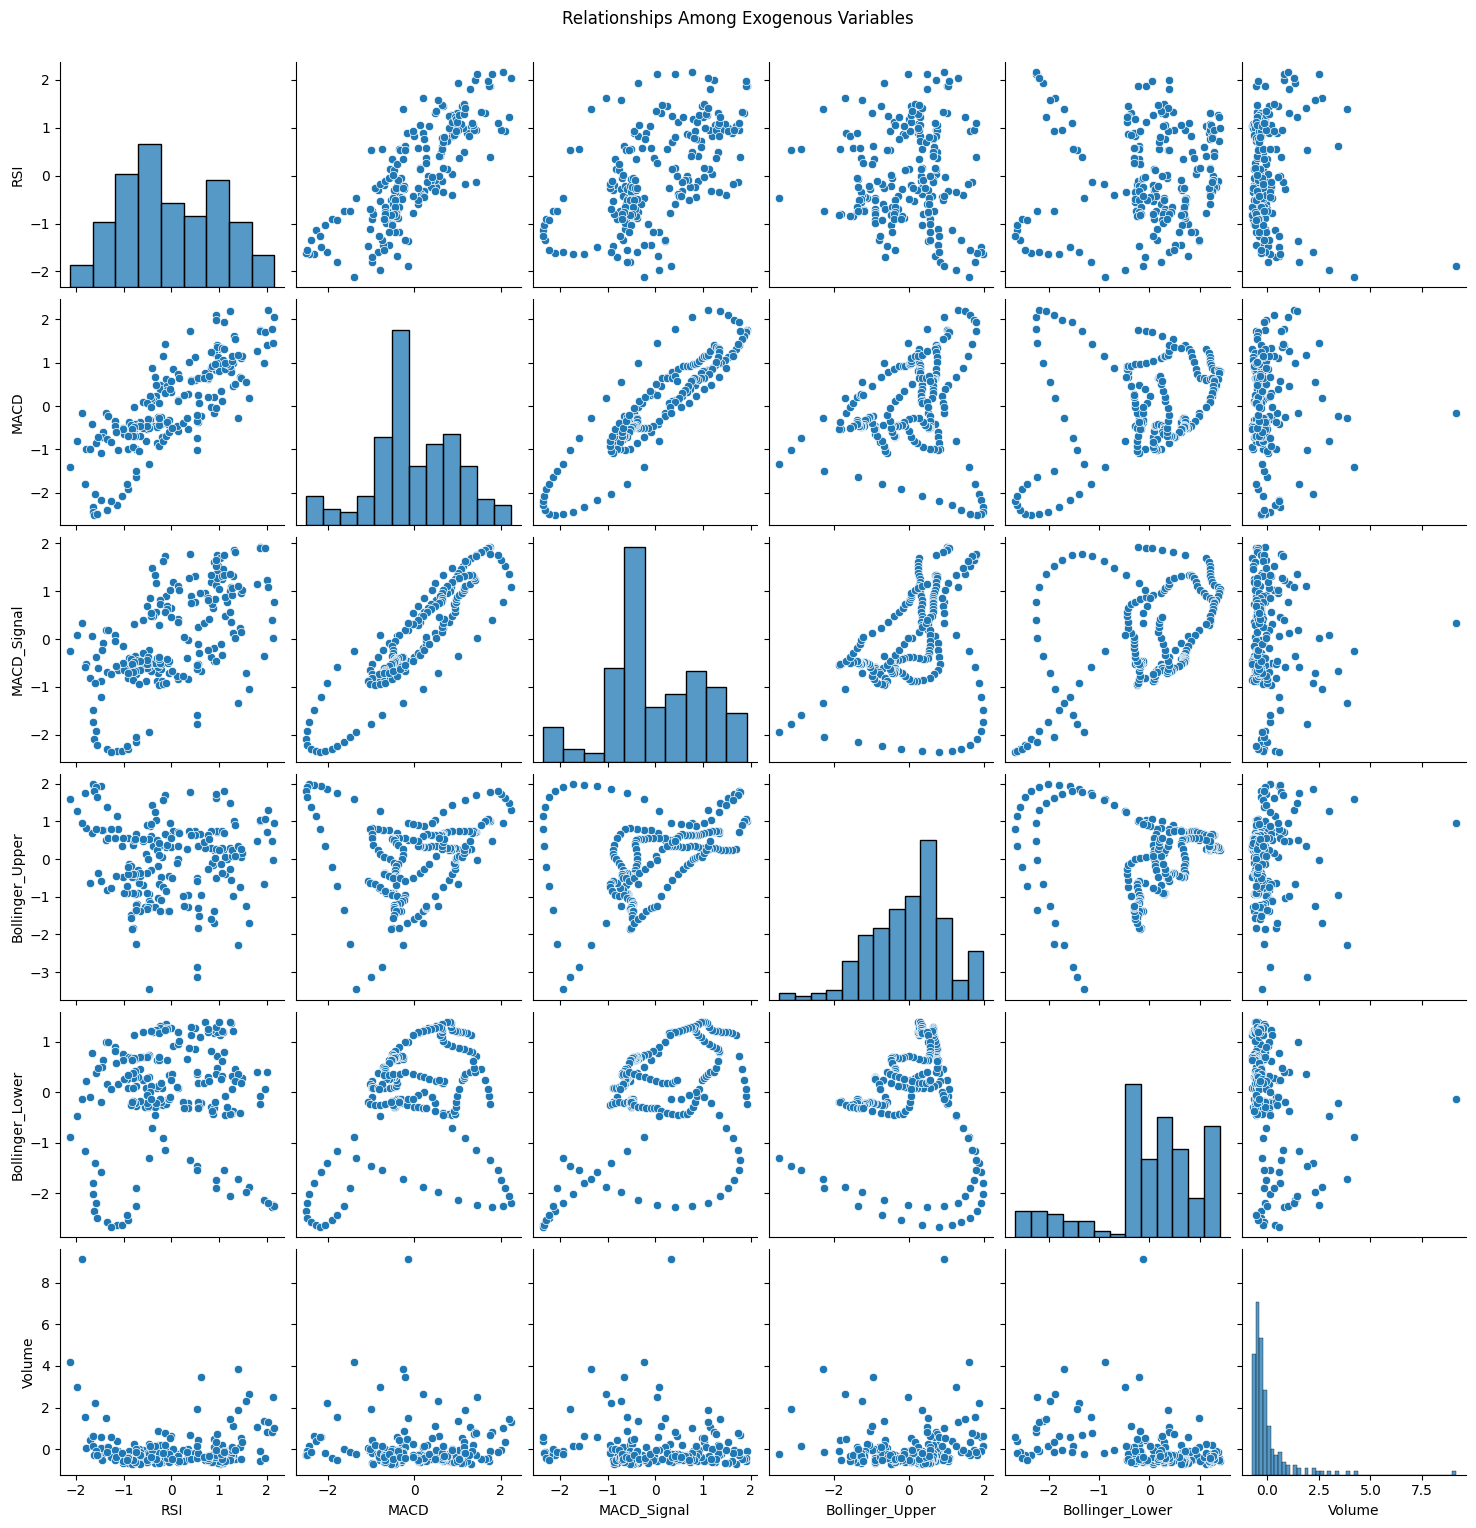

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['Log_Returns'], bins=50, kde=True)
plt.title('Distribution of Log Returns')
plt.show()

# Box plot to detect outliers in exogenous variables
plt.figure(figsize=(15, 6))
sns.boxplot(data=exog_vars)
plt.title('Box Plot of Exogenous Variables (Detecting Outliers)')
plt.xticks(rotation=45)
plt.show()

# Scatter plot to detect relationships among indicators
sns.pairplot(exog_vars)
plt.suptitle('Relationships Among Exogenous Variables', y=1.02)
plt.show()


In [ ]:
from scipy.stats import zscore

# Calculate z-scores for log returns and exogenous variables
data['Log_Returns_Z'] = zscore(data['Log_Returns'])
exog_vars_z = exog_vars.apply(zscore)

# Filter out outliers (z-score > 3)
filtered_data = data[np.abs(data['Log_Returns_Z']) < 3]
filtered_exog_vars = exog_vars_z[(np.abs(exog_vars_z) < 3).all(axis=1)]

print(f"Filtered Data Size: {filtered_data.shape}, Filtered Exogenous Variables Size: {filtered_exog_vars.shape}")


Filtered Data Size: (216, 9), Filtered Exogenous Variables Size: (211, 6)


Filtered Data Size: (1631, 2)

ARIMA Forecasted Log Returns for the Next 5 Days:
2024-10-28 00:00:00-04:00    0.000934
2024-10-29 00:00:00-04:00    0.000934
2024-10-30 00:00:00-04:00    0.000934
2024-10-31 00:00:00-04:00    0.000934
2024-11-01 00:00:00-04:00    0.000934
Freq: B, Name: predicted_mean, dtype: float64

Metrics:
RMSE: 2.8947, MAPE: 1.69%, MdAPE: 1.28%


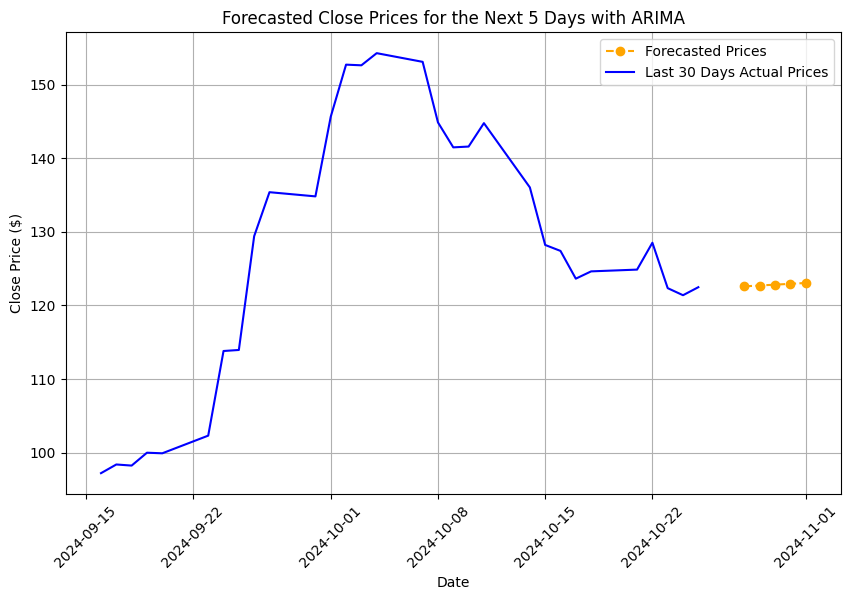


Forecasted Close Prices for the Next 5 Days:
2024-10-28: $122.58
2024-10-29: $122.70
2024-10-30: $122.81
2024-10-31: $122.93
2024-11-01: $123.04

Forecasted prices saved to 'forecasted_prices.csv'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import yfinance as yf
import warnings

# =========================================
# 1. Data Preprocessing and Cleanup
# =========================================

warnings.filterwarnings("ignore")  # Suppress warnings for clean output

def fetch_pdd_data():
    """Fetch historical stock data for PDD."""
    stock = yf.Ticker("PDD")
    data = stock.history(period="max")
    return data[['Close']]

# Fetch and preprocess data
data = fetch_pdd_data()
data.index = pd.to_datetime(data.index)
data = data.asfreq('B').ffill()  # Align with business days and forward-fill missing values
data['Log_Returns'] = np.log(data['Close']).diff()
filtered_data = data.dropna()

print(f"Filtered Data Size: {filtered_data.shape}")

# =========================================
# 2. ARIMA Model Training and Forecasting
# =========================================

def convert_returns_to_prices(start_price, returns):
    """Convert log returns to actual prices."""
    prices = [start_price]
    for ret in returns:
        next_price = prices[-1] * np.exp(ret)  # Reverse log return to price
        prices.append(next_price)
    return prices[1:]  # Exclude the initial start price

# Fit the ARIMA model on the entire dataset
model = ARIMA(filtered_data['Log_Returns'], order=(0, 1, 1))
result = model.fit()

# Forecast the next 5 days' log returns
forecasted_returns = result.get_forecast(steps=5).predicted_mean
print("\nARIMA Forecasted Log Returns for the Next 5 Days:")
print(forecasted_returns)

# Convert forecasted returns to prices
last_close = filtered_data['Close'].iloc[-1]  # Last observed close price
forecasted_prices = convert_returns_to_prices(last_close, forecasted_returns)

# Generate forecast dates
forecast_dates = pd.date_range(start=filtered_data.index[-1] + pd.Timedelta(days=1), periods=5, freq='B')

# =========================================
# 3. Define Metrics: RMSE, MAPE, MdAPE
# =========================================

def mean_absolute_percentage_error(y_true, y_pred):
    """Compute MAPE."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    epsilon = 1e-10  # To avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

def median_absolute_percentage_error(y_true, y_pred):
    """Compute MdAPE."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    epsilon = 1e-10
    return np.median(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Example: Using the last 5 actual prices for cross-validation (adjust as needed)
actual_prices = filtered_data['Close'].iloc[-5:].values

# Calculate Metrics
rmse = np.sqrt(mean_squared_error(actual_prices, forecasted_prices))
mape = mean_absolute_percentage_error(actual_prices, forecasted_prices)
mdape = median_absolute_percentage_error(actual_prices, forecasted_prices)

print(f"\nMetrics:\nRMSE: {rmse:.4f}, MAPE: {mape:.2f}%, MdAPE: {mdape:.2f}%")

# =========================================
# 4. Plot Forecasted Prices
# =========================================

plt.figure(figsize=(10, 6))
plt.plot(forecast_dates, forecasted_prices, marker='o', linestyle='--', color='orange', label='Forecasted Prices')
plt.plot(filtered_data.index[-30:], filtered_data['Close'][-30:], label='Last 30 Days Actual Prices', color='blue')

plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.title('Forecasted Close Prices for the Next 5 Days with ARIMA')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

# =========================================
# 5. Print Forecasted Prices
# =========================================

print("\nForecasted Close Prices for the Next 5 Days:")
for date, price in zip(forecast_dates, forecasted_prices):
    print(f"{date.date()}: ${price:.2f}")

# =========================================
# 6. Save Forecast Results to CSV
# =========================================

forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Close': forecasted_prices})
forecast_df.to_csv('forecasted_prices.csv', index=False)

print("\nForecasted prices saved to 'forecasted_prices.csv'.")


[I 2024-10-27 05:42:19,400] A new study created in memory with name: no-name-f5a231b9-8bb0-455a-b8d4-682e55667c56


Fetching data...
Preprocessing data...
Performing feature engineering...

Starting hyperparameter tuning with Optuna...


INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MSE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler         | TemporalNorm  | 0      | train
3 | model          | ModuleList    | 907 K  | train
4 | enc_embedding  | DataEmbedding | 180    | train
5 | layer_norm     | LayerNorm     | 120    | train
6 | predict_linear | Linear        | 234    | train
7 | projection     | Linear        | 61     | train
-----------------------------------------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

[I 2024-10-27 05:42:19,817] Trial 0 finished with value: inf and parameters: {'input_size': 12, 'hidden_size': 60, 'conv_hidden_size': 90, 'top_k': 2, 'num_kernels': 4, 'encoder_layers': 1, 'learning_rate': 1.7215468267279062e-05, 'batch_size': 64, 'max_steps': 382, 'scaler_type': 'standard'}. Best is trial 0 with value: inf.
INFO:lightning_fabric.utilities.seed:Seed set to 1


RuntimeError during cross-validation with input_size=12: maximum size for tensor at dimension 2 is 13 but size is 18


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MSE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler         | TemporalNorm  | 0      | train
3 | model          | ModuleList    | 4.0 M  | train
4 | enc_embedding  | DataEmbedding | 300    | train
5 | layer_norm     | LayerNorm     | 200    | train
6 | predict_linear | Linear        | 546    | train
7 | projection     | Linear        | 101    | train
---------------------------------------------------------
4.0 M     Trainable params
0         Non

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

[I 2024-10-27 05:42:20,319] Trial 1 finished with value: inf and parameters: {'input_size': 20, 'hidden_size': 100, 'conv_hidden_size': 120, 'top_k': 1, 'num_kernels': 4, 'encoder_layers': 2, 'learning_rate': 1.3437996389724187e-05, 'batch_size': 16, 'max_steps': 289, 'scaler_type': 'minmax'}. Best is trial 0 with value: inf.
INFO:lightning_fabric.utilities.seed:Seed set to 1


RuntimeError during cross-validation with input_size=20: maximum size for tensor at dimension 2 is 21 but size is 26


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MSE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler         | TemporalNorm  | 0      | train
3 | model          | ModuleList    | 770 K  | train
4 | enc_embedding  | DataEmbedding | 300    | train
5 | layer_norm     | LayerNorm     | 200    | train
6 | predict_linear | Linear        | 456    | train
7 | projection     | Linear        | 101    | train
---------------------------------------------------------
771 K     Trainable params
0         Non

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

[I 2024-10-27 05:42:20,796] Trial 2 finished with value: inf and parameters: {'input_size': 18, 'hidden_size': 100, 'conv_hidden_size': 110, 'top_k': 3, 'num_kernels': 3, 'encoder_layers': 1, 'learning_rate': 0.0008937390621713299, 'batch_size': 16, 'max_steps': 304, 'scaler_type': 'standard'}. Best is trial 0 with value: inf.
INFO:lightning_fabric.utilities.seed:Seed set to 1


RuntimeError during cross-validation with input_size=18: maximum size for tensor at dimension 2 is 19 but size is 24


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MSE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler         | TemporalNorm  | 0      | train
3 | model          | ModuleList    | 1.3 M  | train
4 | enc_embedding  | DataEmbedding | 330    | train
5 | layer_norm     | LayerNorm     | 220    | train
6 | predict_linear | Linear        | 456    | train
7 | projection     | Linear        | 111    | train
---------------------------------------------------------
1.3 M     Trainable params
0         Non

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

[I 2024-10-27 05:42:21,298] Trial 3 finished with value: inf and parameters: {'input_size': 18, 'hidden_size': 110, 'conv_hidden_size': 70, 'top_k': 6, 'num_kernels': 4, 'encoder_layers': 1, 'learning_rate': 0.0009237826802622776, 'batch_size': 128, 'max_steps': 391, 'scaler_type': 'minmax'}. Best is trial 0 with value: inf.
INFO:lightning_fabric.utilities.seed:Seed set to 1


RuntimeError during cross-validation with input_size=18: maximum size for tensor at dimension 2 is 19 but size is 24


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MSE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler         | TemporalNorm  | 0      | train
3 | model          | ModuleList    | 2.0 M  | train
4 | enc_embedding  | DataEmbedding | 300    | train
5 | layer_norm     | LayerNorm     | 200    | train
6 | predict_linear | Linear        | 546    | train
7 | projection     | Linear        | 101    | train
---------------------------------------------------------
2.0 M     Trainable params
0         Non

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

[I 2024-10-27 05:42:21,920] Trial 4 finished with value: inf and parameters: {'input_size': 20, 'hidden_size': 100, 'conv_hidden_size': 60, 'top_k': 7, 'num_kernels': 5, 'encoder_layers': 1, 'learning_rate': 0.0005585461147713571, 'batch_size': 64, 'max_steps': 233, 'scaler_type': 'minmax'}. Best is trial 0 with value: inf.
INFO:lightning_fabric.utilities.seed:Seed set to 1


RuntimeError during cross-validation with input_size=20: maximum size for tensor at dimension 2 is 21 but size is 26


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MSE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler         | TemporalNorm  | 0      | train
3 | model          | ModuleList    | 45.1 M | train
4 | enc_embedding  | DataEmbedding | 270    | train
5 | layer_norm     | LayerNorm     | 180    | train
6 | predict_linear | Linear        | 176    | train
7 | projection     | Linear        | 91     | train
---------------------------------------------------------
45.1 M    Trainable params
0         Non

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

[I 2024-10-27 05:42:24,309] Trial 5 finished with value: inf and parameters: {'input_size': 10, 'hidden_size': 90, 'conv_hidden_size': 110, 'top_k': 5, 'num_kernels': 7, 'encoder_layers': 5, 'learning_rate': 9.143658926101036e-05, 'batch_size': 128, 'max_steps': 183, 'scaler_type': 'minmax'}. Best is trial 0 with value: inf.
INFO:lightning_fabric.utilities.seed:Seed set to 1


RuntimeError during cross-validation with input_size=10: maximum size for tensor at dimension 2 is 11 but size is 16


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MSE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler         | TemporalNorm  | 0      | train
3 | model          | ModuleList    | 13.6 M | train
4 | enc_embedding  | DataEmbedding | 300    | train
5 | layer_norm     | LayerNorm     | 200    | train
6 | predict_linear | Linear        | 176    | train
7 | projection     | Linear        | 101    | train
---------------------------------------------------------
13.6 M    Trainable params
0         Non

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

[I 2024-10-27 05:42:25,653] Trial 6 finished with value: inf and parameters: {'input_size': 10, 'hidden_size': 100, 'conv_hidden_size': 50, 'top_k': 8, 'num_kernels': 8, 'encoder_layers': 2, 'learning_rate': 0.0007202947732806331, 'batch_size': 128, 'max_steps': 376, 'scaler_type': 'standard'}. Best is trial 0 with value: inf.
INFO:lightning_fabric.utilities.seed:Seed set to 1


RuntimeError during cross-validation with input_size=10: maximum size for tensor at dimension 2 is 11 but size is 16


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MSE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler         | TemporalNorm  | 0      | train
3 | model          | ModuleList    | 13.8 M | train
4 | enc_embedding  | DataEmbedding | 330    | train
5 | layer_norm     | LayerNorm     | 220    | train
6 | predict_linear | Linear        | 456    | train
7 | projection     | Linear        | 111    | train
---------------------------------------------------------
13.8 M    Trainable params
0         Non

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

[I 2024-10-27 05:42:26,955] Trial 7 finished with value: inf and parameters: {'input_size': 18, 'hidden_size': 110, 'conv_hidden_size': 110, 'top_k': 2, 'num_kernels': 6, 'encoder_layers': 2, 'learning_rate': 0.0007382680780332507, 'batch_size': 32, 'max_steps': 426, 'scaler_type': 'standard'}. Best is trial 0 with value: inf.
INFO:lightning_fabric.utilities.seed:Seed set to 1


RuntimeError during cross-validation with input_size=18: maximum size for tensor at dimension 2 is 19 but size is 24


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MSE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler         | TemporalNorm  | 0      | train
3 | model          | ModuleList    | 52.4 M | train
4 | enc_embedding  | DataEmbedding | 210    | train
5 | layer_norm     | LayerNorm     | 140    | train
6 | predict_linear | Linear        | 546    | train
7 | projection     | Linear        | 71     | train
---------------------------------------------------------
52.4 M    Trainable params
0         Non

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

[I 2024-10-27 05:42:29,339] Trial 8 finished with value: inf and parameters: {'input_size': 20, 'hidden_size': 70, 'conv_hidden_size': 110, 'top_k': 7, 'num_kernels': 8, 'encoder_layers': 5, 'learning_rate': 0.00013453286065935114, 'batch_size': 128, 'max_steps': 358, 'scaler_type': 'minmax'}. Best is trial 0 with value: inf.
INFO:lightning_fabric.utilities.seed:Seed set to 1


RuntimeError during cross-validation with input_size=20: maximum size for tensor at dimension 2 is 21 but size is 26


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MSE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler         | TemporalNorm  | 0      | train
3 | model          | ModuleList    | 841 K  | train
4 | enc_embedding  | DataEmbedding | 360    | train
5 | layer_norm     | LayerNorm     | 240    | train
6 | predict_linear | Linear        | 546    | train
7 | projection     | Linear        | 121    | train
---------------------------------------------------------
842 K     Trainable params
0         Non

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

[I 2024-10-27 05:42:29,835] Trial 9 finished with value: inf and parameters: {'input_size': 20, 'hidden_size': 120, 'conv_hidden_size': 50, 'top_k': 9, 'num_kernels': 3, 'encoder_layers': 2, 'learning_rate': 0.00018368505603631039, 'batch_size': 16, 'max_steps': 457, 'scaler_type': 'minmax'}. Best is trial 0 with value: inf.
INFO:lightning_fabric.utilities.seed:Seed set to 1


RuntimeError during cross-validation with input_size=20: maximum size for tensor at dimension 2 is 21 but size is 26


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MSE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler         | TemporalNorm  | 0      | train
3 | model          | ModuleList    | 57.5 M | train
4 | enc_embedding  | DataEmbedding | 180    | train
5 | layer_norm     | LayerNorm     | 120    | train
6 | predict_linear | Linear        | 234    | train
7 | projection     | Linear        | 61     | train
---------------------------------------------------------
57.5 M    Trainable params
0         Non

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

[I 2024-10-27 05:42:32,004] Trial 10 finished with value: inf and parameters: {'input_size': 12, 'hidden_size': 60, 'conv_hidden_size': 90, 'top_k': 4, 'num_kernels': 10, 'encoder_layers': 4, 'learning_rate': 1.2112207163686552e-05, 'batch_size': 64, 'max_steps': 500, 'scaler_type': 'standard'}. Best is trial 0 with value: inf.
INFO:lightning_fabric.utilities.seed:Seed set to 1


RuntimeError during cross-validation with input_size=12: maximum size for tensor at dimension 2 is 13 but size is 18


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MSE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler         | TemporalNorm  | 0      | train
3 | model          | ModuleList    | 7.1 M  | train
4 | enc_embedding  | DataEmbedding | 180    | train
5 | layer_norm     | LayerNorm     | 120    | train
6 | predict_linear | Linear        | 300    | train
7 | projection     | Linear        | 61     | train
---------------------------------------------------------
7.1 M     Trainable params
0         Non

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

[I 2024-10-27 05:42:32,682] Trial 11 finished with value: inf and parameters: {'input_size': 14, 'hidden_size': 60, 'conv_hidden_size': 120, 'top_k': 1, 'num_kernels': 5, 'encoder_layers': 3, 'learning_rate': 1.2448810571399635e-05, 'batch_size': 16, 'max_steps': 110, 'scaler_type': 'standard'}. Best is trial 0 with value: inf.
INFO:lightning_fabric.utilities.seed:Seed set to 1


RuntimeError during cross-validation with input_size=14: maximum size for tensor at dimension 2 is 15 but size is 20


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MSE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler         | TemporalNorm  | 0      | train
3 | model          | ModuleList    | 4.8 M  | train
4 | enc_embedding  | DataEmbedding | 240    | train
5 | layer_norm     | LayerNorm     | 160    | train
6 | predict_linear | Linear        | 374    | train
7 | projection     | Linear        | 81     | train
---------------------------------------------------------
4.8 M     Trainable params
0         Non

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

[I 2024-10-27 05:42:33,282] Trial 12 finished with value: inf and parameters: {'input_size': 16, 'hidden_size': 80, 'conv_hidden_size': 120, 'top_k': 1, 'num_kernels': 4, 'encoder_layers': 3, 'learning_rate': 2.9548150695717297e-05, 'batch_size': 64, 'max_steps': 293, 'scaler_type': 'standard'}. Best is trial 0 with value: inf.
INFO:lightning_fabric.utilities.seed:Seed set to 1


RuntimeError during cross-validation with input_size=16: maximum size for tensor at dimension 2 is 17 but size is 22


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MSE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler         | TemporalNorm  | 0      | train
3 | model          | ModuleList    | 3.3 M  | train
4 | enc_embedding  | DataEmbedding | 150    | train
5 | layer_norm     | LayerNorm     | 100    | train
6 | predict_linear | Linear        | 234    | train
7 | projection     | Linear        | 51     | train
---------------------------------------------------------
3.3 M     Trainable params
0         Non

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

[I 2024-10-27 05:42:33,875] Trial 13 finished with value: inf and parameters: {'input_size': 12, 'hidden_size': 50, 'conv_hidden_size': 100, 'top_k': 3, 'num_kernels': 5, 'encoder_layers': 2, 'learning_rate': 2.917822743919667e-05, 'batch_size': 32, 'max_steps': 287, 'scaler_type': 'minmax'}. Best is trial 0 with value: inf.
INFO:lightning_fabric.utilities.seed:Seed set to 1


RuntimeError during cross-validation with input_size=12: maximum size for tensor at dimension 2 is 13 but size is 18


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MSE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler         | TemporalNorm  | 0      | train
3 | model          | ModuleList    | 378 K  | train
4 | enc_embedding  | DataEmbedding | 180    | train
5 | layer_norm     | LayerNorm     | 120    | train
6 | predict_linear | Linear        | 234    | train
7 | projection     | Linear        | 61     | train
---------------------------------------------------------
379 K     Trainable params
0         Non

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

[I 2024-10-27 05:42:34,412] Trial 14 finished with value: inf and parameters: {'input_size': 12, 'hidden_size': 60, 'conv_hidden_size': 90, 'top_k': 1, 'num_kernels': 3, 'encoder_layers': 1, 'learning_rate': 2.797814563373027e-05, 'batch_size': 16, 'max_steps': 331, 'scaler_type': 'minmax'}. Best is trial 0 with value: inf.
INFO:lightning_fabric.utilities.seed:Seed set to 1


RuntimeError during cross-validation with input_size=12: maximum size for tensor at dimension 2 is 13 but size is 18


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MSE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler         | TemporalNorm  | 0      | train
3 | model          | ModuleList    | 6.4 M  | train
4 | enc_embedding  | DataEmbedding | 210    | train
5 | layer_norm     | LayerNorm     | 140    | train
6 | predict_linear | Linear        | 300    | train
7 | projection     | Linear        | 71     | train
---------------------------------------------------------
6.4 M     Trainable params
0         Non

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

[I 2024-10-27 05:42:35,147] Trial 15 finished with value: inf and parameters: {'input_size': 14, 'hidden_size': 70, 'conv_hidden_size': 80, 'top_k': 3, 'num_kernels': 6, 'encoder_layers': 2, 'learning_rate': 5.649468410108101e-05, 'batch_size': 64, 'max_steps': 228, 'scaler_type': 'standard'}. Best is trial 0 with value: inf.
INFO:lightning_fabric.utilities.seed:Seed set to 1


RuntimeError during cross-validation with input_size=14: maximum size for tensor at dimension 2 is 15 but size is 20


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MSE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler         | TemporalNorm  | 0      | train
3 | model          | ModuleList    | 3.6 M  | train
4 | enc_embedding  | DataEmbedding | 240    | train
5 | layer_norm     | LayerNorm     | 160    | train
6 | predict_linear | Linear        | 234    | train
7 | projection     | Linear        | 81     | train
---------------------------------------------------------
3.6 M     Trainable params
0         Non

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

[I 2024-10-27 05:42:35,742] Trial 16 finished with value: inf and parameters: {'input_size': 12, 'hidden_size': 80, 'conv_hidden_size': 90, 'top_k': 10, 'num_kernels': 4, 'encoder_layers': 3, 'learning_rate': 1.7166450145536028e-05, 'batch_size': 64, 'max_steps': 263, 'scaler_type': 'standard'}. Best is trial 0 with value: inf.
INFO:lightning_fabric.utilities.seed:Seed set to 1


RuntimeError during cross-validation with input_size=12: maximum size for tensor at dimension 2 is 13 but size is 18


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MSE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler         | TemporalNorm  | 0      | train
3 | model          | ModuleList    | 63.8 M | train
4 | enc_embedding  | DataEmbedding | 150    | train
5 | layer_norm     | LayerNorm     | 100    | train
6 | predict_linear | Linear        | 374    | train
7 | projection     | Linear        | 51     | train
---------------------------------------------------------
63.8 M    Trainable params
0         Non

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

[I 2024-10-27 05:42:38,930] Trial 17 finished with value: inf and parameters: {'input_size': 16, 'hidden_size': 50, 'conv_hidden_size': 120, 'top_k': 2, 'num_kernels': 10, 'encoder_layers': 4, 'learning_rate': 6.0250678208999256e-05, 'batch_size': 16, 'max_steps': 171, 'scaler_type': 'minmax'}. Best is trial 0 with value: inf.
INFO:lightning_fabric.utilities.seed:Seed set to 1


RuntimeError during cross-validation with input_size=16: maximum size for tensor at dimension 2 is 17 but size is 22


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MSE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler         | TemporalNorm  | 0      | train
3 | model          | ModuleList    | 8.2 M  | train
4 | enc_embedding  | DataEmbedding | 270    | train
5 | layer_norm     | LayerNorm     | 180    | train
6 | predict_linear | Linear        | 546    | train
7 | projection     | Linear        | 91     | train
---------------------------------------------------------
8.2 M     Trainable params
0         Non

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

[I 2024-10-27 05:42:40,026] Trial 18 finished with value: inf and parameters: {'input_size': 20, 'hidden_size': 90, 'conv_hidden_size': 100, 'top_k': 5, 'num_kernels': 7, 'encoder_layers': 1, 'learning_rate': 1.9858537263400224e-05, 'batch_size': 32, 'max_steps': 407, 'scaler_type': 'minmax'}. Best is trial 0 with value: inf.
INFO:lightning_fabric.utilities.seed:Seed set to 1


RuntimeError during cross-validation with input_size=20: maximum size for tensor at dimension 2 is 21 but size is 26


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MSE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler         | TemporalNorm  | 0      | train
3 | model          | ModuleList    | 3.6 M  | train
4 | enc_embedding  | DataEmbedding | 360    | train
5 | layer_norm     | LayerNorm     | 240    | train
6 | predict_linear | Linear        | 234    | train
7 | projection     | Linear        | 121    | train
---------------------------------------------------------
3.6 M     Trainable params
0         Non

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

[I 2024-10-27 05:42:40,984] Trial 19 finished with value: inf and parameters: {'input_size': 12, 'hidden_size': 120, 'conv_hidden_size': 60, 'top_k': 2, 'num_kernels': 4, 'encoder_layers': 3, 'learning_rate': 0.0003470167834477743, 'batch_size': 64, 'max_steps': 346, 'scaler_type': 'standard'}. Best is trial 0 with value: inf.
INFO:lightning_fabric.utilities.seed:Seed set to 1


RuntimeError during cross-validation with input_size=12: maximum size for tensor at dimension 2 is 13 but size is 18


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MSE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler         | TemporalNorm  | 0      | train
3 | model          | ModuleList    | 4.6 M  | train
4 | enc_embedding  | DataEmbedding | 300    | train
5 | layer_norm     | LayerNorm     | 200    | train
6 | predict_linear | Linear        | 546    | train
7 | projection     | Linear        | 101    | train
---------------------------------------------------------
4.6 M     Trainable params
0         Non

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

[I 2024-10-27 05:42:42,015] Trial 20 finished with value: inf and parameters: {'input_size': 20, 'hidden_size': 100, 'conv_hidden_size': 70, 'top_k': 4, 'num_kernels': 5, 'encoder_layers': 2, 'learning_rate': 5.101602019225515e-05, 'batch_size': 16, 'max_steps': 467, 'scaler_type': 'standard'}. Best is trial 0 with value: inf.
INFO:lightning_fabric.utilities.seed:Seed set to 1


RuntimeError during cross-validation with input_size=20: maximum size for tensor at dimension 2 is 21 but size is 26


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MSE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler         | TemporalNorm  | 0      | train
3 | model          | ModuleList    | 560 K  | train
4 | enc_embedding  | DataEmbedding | 300    | train
5 | layer_norm     | LayerNorm     | 200    | train
6 | predict_linear | Linear        | 456    | train
7 | projection     | Linear        | 101    | train
---------------------------------------------------------
561 K     Trainable params
0         Non

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

[I 2024-10-27 05:42:42,682] Trial 21 finished with value: inf and parameters: {'input_size': 18, 'hidden_size': 100, 'conv_hidden_size': 80, 'top_k': 3, 'num_kernels': 3, 'encoder_layers': 1, 'learning_rate': 0.00022859998623764457, 'batch_size': 16, 'max_steps': 325, 'scaler_type': 'standard'}. Best is trial 0 with value: inf.
INFO:lightning_fabric.utilities.seed:Seed set to 1


RuntimeError during cross-validation with input_size=18: maximum size for tensor at dimension 2 is 19 but size is 24


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MSE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler         | TemporalNorm  | 0      | train
3 | model          | ModuleList    | 840 K  | train
4 | enc_embedding  | DataEmbedding | 300    | train
5 | layer_norm     | LayerNorm     | 200    | train
6 | predict_linear | Linear        | 456    | train
7 | projection     | Linear        | 101    | train
---------------------------------------------------------
841 K     Trainable params
0         Non

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

[I 2024-10-27 05:42:43,187] Trial 22 finished with value: inf and parameters: {'input_size': 18, 'hidden_size': 100, 'conv_hidden_size': 120, 'top_k': 4, 'num_kernels': 3, 'encoder_layers': 1, 'learning_rate': 1.80850856828641e-05, 'batch_size': 16, 'max_steps': 255, 'scaler_type': 'standard'}. Best is trial 0 with value: inf.
INFO:lightning_fabric.utilities.seed:Seed set to 1


RuntimeError during cross-validation with input_size=18: maximum size for tensor at dimension 2 is 19 but size is 24


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MSE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler         | TemporalNorm  | 0      | train
3 | model          | ModuleList    | 1.8 M  | train
4 | enc_embedding  | DataEmbedding | 300    | train
5 | layer_norm     | LayerNorm     | 200    | train
6 | predict_linear | Linear        | 456    | train
7 | projection     | Linear        | 101    | train
---------------------------------------------------------
1.8 M     Trainable params
0         Non

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

[I 2024-10-27 05:42:43,719] Trial 23 finished with value: inf and parameters: {'input_size': 18, 'hidden_size': 100, 'conv_hidden_size': 110, 'top_k': 2, 'num_kernels': 4, 'encoder_layers': 1, 'learning_rate': 0.00037010784199287294, 'batch_size': 16, 'max_steps': 295, 'scaler_type': 'standard'}. Best is trial 0 with value: inf.
INFO:lightning_fabric.utilities.seed:Seed set to 1


RuntimeError during cross-validation with input_size=18: maximum size for tensor at dimension 2 is 19 but size is 24


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MSE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler         | TemporalNorm  | 0      | train
3 | model          | ModuleList    | 756 K  | train
4 | enc_embedding  | DataEmbedding | 180    | train
5 | layer_norm     | LayerNorm     | 120    | train
6 | predict_linear | Linear        | 176    | train
7 | projection     | Linear        | 61     | train
---------------------------------------------------------
757 K     Trainable params
0         Non

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

[I 2024-10-27 05:42:44,313] Trial 24 finished with value: inf and parameters: {'input_size': 10, 'hidden_size': 60, 'conv_hidden_size': 90, 'top_k': 1, 'num_kernels': 3, 'encoder_layers': 2, 'learning_rate': 1.009215103017752e-05, 'batch_size': 16, 'max_steps': 323, 'scaler_type': 'standard'}. Best is trial 0 with value: inf.
INFO:lightning_fabric.utilities.seed:Seed set to 1


RuntimeError during cross-validation with input_size=10: maximum size for tensor at dimension 2 is 11 but size is 16


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MSE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler         | TemporalNorm  | 0      | train
3 | model          | ModuleList    | 1.5 M  | train
4 | enc_embedding  | DataEmbedding | 300    | train
5 | layer_norm     | LayerNorm     | 200    | train
6 | predict_linear | Linear        | 300    | train
7 | projection     | Linear        | 101    | train
---------------------------------------------------------
1.5 M     Trainable params
0         Non

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

[I 2024-10-27 05:42:44,904] Trial 25 finished with value: inf and parameters: {'input_size': 14, 'hidden_size': 100, 'conv_hidden_size': 90, 'top_k': 3, 'num_kernels': 4, 'encoder_layers': 1, 'learning_rate': 3.911627521472396e-05, 'batch_size': 16, 'max_steps': 193, 'scaler_type': 'standard'}. Best is trial 0 with value: inf.
INFO:lightning_fabric.utilities.seed:Seed set to 1


RuntimeError during cross-validation with input_size=14: maximum size for tensor at dimension 2 is 15 but size is 20


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MSE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler         | TemporalNorm  | 0      | train
3 | model          | ModuleList    | 8.2 M  | train
4 | enc_embedding  | DataEmbedding | 180    | train
5 | layer_norm     | LayerNorm     | 120    | train
6 | predict_linear | Linear        | 374    | train
7 | projection     | Linear        | 61     | train
---------------------------------------------------------
8.2 M     Trainable params
0         Non

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

[I 2024-10-27 05:42:45,631] Trial 26 finished with value: inf and parameters: {'input_size': 16, 'hidden_size': 60, 'conv_hidden_size': 120, 'top_k': 2, 'num_kernels': 6, 'encoder_layers': 2, 'learning_rate': 8.10516633020333e-05, 'batch_size': 64, 'max_steps': 427, 'scaler_type': 'minmax'}. Best is trial 0 with value: inf.
INFO:lightning_fabric.utilities.seed:Seed set to 1


RuntimeError during cross-validation with input_size=16: maximum size for tensor at dimension 2 is 17 but size is 22


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MSE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler         | TemporalNorm  | 0      | train
3 | model          | ModuleList    | 3.6 M  | train
4 | enc_embedding  | DataEmbedding | 300    | train
5 | layer_norm     | LayerNorm     | 200    | train
6 | predict_linear | Linear        | 234    | train
7 | projection     | Linear        | 101    | train
---------------------------------------------------------
3.6 M     Trainable params
0         Non

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

[I 2024-10-27 05:42:46,219] Trial 27 finished with value: inf and parameters: {'input_size': 12, 'hidden_size': 100, 'conv_hidden_size': 110, 'top_k': 1, 'num_kernels': 5, 'encoder_layers': 1, 'learning_rate': 0.0001242650087204344, 'batch_size': 32, 'max_steps': 362, 'scaler_type': 'standard'}. Best is trial 0 with value: inf.
INFO:lightning_fabric.utilities.seed:Seed set to 1


RuntimeError during cross-validation with input_size=12: maximum size for tensor at dimension 2 is 13 but size is 18


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MSE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler         | TemporalNorm  | 0      | train
3 | model          | ModuleList    | 784 K  | train
4 | enc_embedding  | DataEmbedding | 240    | train
5 | layer_norm     | LayerNorm     | 160    | train
6 | predict_linear | Linear        | 546    | train
7 | projection     | Linear        | 81     | train
---------------------------------------------------------
785 K     Trainable params
0         Non

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

[I 2024-10-27 05:42:46,766] Trial 28 finished with value: inf and parameters: {'input_size': 20, 'hidden_size': 80, 'conv_hidden_size': 70, 'top_k': 4, 'num_kernels': 3, 'encoder_layers': 2, 'learning_rate': 2.2300501555694234e-05, 'batch_size': 16, 'max_steps': 264, 'scaler_type': 'minmax'}. Best is trial 0 with value: inf.
INFO:lightning_fabric.utilities.seed:Seed set to 1


RuntimeError during cross-validation with input_size=20: maximum size for tensor at dimension 2 is 21 but size is 26


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MSE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler         | TemporalNorm  | 0      | train
3 | model          | ModuleList    | 840 K  | train
4 | enc_embedding  | DataEmbedding | 150    | train
5 | layer_norm     | LayerNorm     | 100    | train
6 | predict_linear | Linear        | 456    | train
7 | projection     | Linear        | 51     | train
---------------------------------------------------------
841 K     Trainable params
0         Non

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

[I 2024-10-27 05:42:47,298] Trial 29 finished with value: inf and parameters: {'input_size': 18, 'hidden_size': 50, 'conv_hidden_size': 100, 'top_k': 6, 'num_kernels': 4, 'encoder_layers': 1, 'learning_rate': 1.5587791021789725e-05, 'batch_size': 128, 'max_steps': 395, 'scaler_type': 'minmax'}. Best is trial 0 with value: inf.
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MSE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler         | TemporalN

RuntimeError during cross-validation with input_size=18: maximum size for tensor at dimension 2 is 19 but size is 24

Best hyperparameters:  {'input_size': 12, 'hidden_size': 60, 'conv_hidden_size': 90, 'top_k': 2, 'num_kernels': 4, 'encoder_layers': 1, 'learning_rate': 1.7215468267279062e-05, 'batch_size': 64, 'max_steps': 382, 'scaler_type': 'standard'}
Best RMSE:  inf

Training final model with best hyperparameters...
Fitting the final model on the entire dataset...


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=382` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Generating future dates for forecasting...
Making forecasts...


Predicting: |          | 0/? [00:00<?, ?it/s]


Preparing forecasts for saving...
Saving forecasts to Excel...
Forecasts saved to 'TimesNet_forecasts.xlsx'.

Plotting the forecasts...


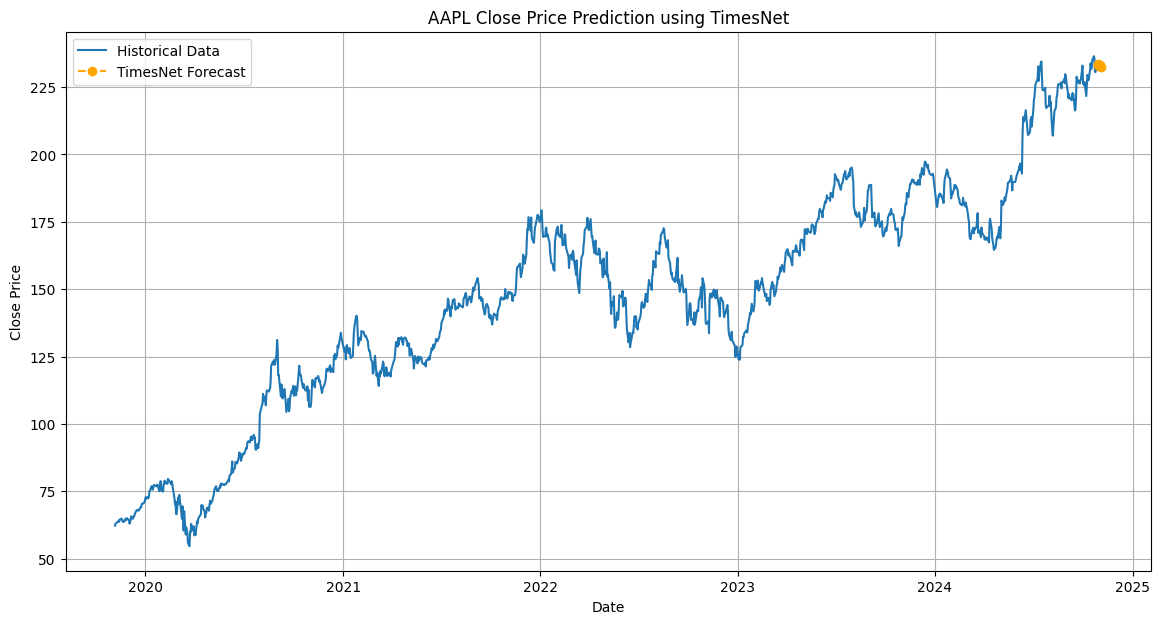

In [ ]:
# =========================================
# 0. Import Necessary Libraries
# =========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import optuna
from sklearn.metrics import mean_squared_error, mean_absolute_error
import yfinance as yf

from neuralforecast import NeuralForecast
from neuralforecast.models import TimesNet
from neuralforecast.losses.pytorch import MSE

from scipy import stats
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# =========================================
# 1. Define Functions for Data Handling
# =========================================

def fetch_stock_data(ticker: str, period: str = "5y") -> pd.DataFrame:
    """
    Fetch historical stock data using yfinance.

    Args:
        ticker (str): Stock ticker symbol.
        period (str): Period to fetch data for (e.g., "5y" for 5 years).

    Returns:
        pd.DataFrame: DataFrame containing historical stock data.
    """
    stock = yf.Ticker(ticker)
    data = stock.history(period=period)
    data = data[['Close']].dropna()
    data = data.reset_index()  # Ensure 'Date' is a column
    return data

def prepare_dataframe(data: pd.DataFrame, unique_id: str) -> pd.DataFrame:
    """
    Prepare the DataFrame for NeuralForecast by renaming columns.

    Args:
        data (pd.DataFrame): Raw stock data with 'Date' and 'Close' columns.
        unique_id (str): Identifier for the time series.

    Returns:
        pd.DataFrame: Prepared DataFrame with 'unique_id', 'ds', and 'y' columns.
    """
    data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
    data['unique_id'] = unique_id
    # Reorder columns
    data = data[['unique_id', 'ds', 'y']]
    return data

def preprocess_data(data: pd.DataFrame) -> pd.DataFrame:
    """
    Preprocess the data by handling missing values and removing outliers.

    Args:
        data (pd.DataFrame): DataFrame to preprocess.

    Returns:
        pd.DataFrame: Preprocessed DataFrame.
    """
    # Handle missing values
    data = data.fillna(method='ffill').dropna()

    # Remove outliers using Z-score
    z_scores = np.abs(stats.zscore(data['y']))
    data = data[(z_scores < 3)]

    return data

def feature_engineering(data: pd.DataFrame) -> pd.DataFrame:
    """
    Add engineered features to the DataFrame.

    Args:
        data (pd.DataFrame): DataFrame to add features to.

    Returns:
        pd.DataFrame: DataFrame with new features.
    """
    # Add date-time features
    data['day_of_week'] = data['ds'].dt.dayofweek
    data['month'] = data['ds'].dt.month
    data['quarter'] = data['ds'].dt.quarter

    # Add lag features
    for lag in range(1, 8):
        data[f'lag_{lag}'] = data['y'].shift(lag)

    # Add rolling statistics
    data['rolling_mean_3'] = data['y'].rolling(window=3).mean()
    data['rolling_std_3'] = data['y'].rolling(window=3).std()

    # Drop rows with NaN values resulting from feature engineering
    data = data.dropna()

    return data

def calculate_metrics(actual: np.ndarray, predicted: np.ndarray) -> dict:
    """
    Calculate RMSE, MAE, and MAPE.

    Args:
        actual (np.ndarray): Actual values.
        predicted (np.ndarray): Predicted values.

    Returns:
        dict: RMSE, MAE, and MAPE.
    """
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual, predicted)
    epsilon = 1e-8  # To prevent division by zero
    mape = np.mean(np.abs((actual - predicted) / (actual + epsilon))) * 100
    return {'RMSE': rmse, 'MAE': mae, 'MAPE': mape}

def generate_future_dataframe(last_date: pd.Timestamp, h: int, unique_id: str) -> pd.DataFrame:
    """
    Generate a future DataFrame with the next 'h' business days.

    Args:
        last_date (pd.Timestamp): The last date from the training set.
        h (int): Forecast horizon (number of future periods).
        unique_id (str): The unique identifier for the time series.

    Returns:
        pd.DataFrame: Future DataFrame with required combinations.
    """
    future_dates = pd.bdate_range(start=last_date + pd.Timedelta(days=1), periods=h)
    future_df = pd.DataFrame({
        'unique_id': [unique_id] * h,
        'ds': future_dates
    })
    return future_df

# =========================================
# 2. Hyperparameter Tuning with Optuna
# =========================================

def hyperparameter_tuning(trial, df: pd.DataFrame, h_fixed: int) -> float:
    """
    Objective function for Optuna to minimize RMSE.

    Args:
        trial: Optuna trial object.
        df (pd.DataFrame): The complete dataset with 'unique_id', 'ds', and 'y' columns.
        h_fixed (int): Fixed forecast horizon.

    Returns:
        float: RMSE of the model.
    """
    # Suggest hyperparameters (excluding 'h' since it's fixed)
    input_size = trial.suggest_categorical('input_size', [10, 12, 14, 16, 18, 20])
    hidden_size = trial.suggest_categorical('hidden_size', [50, 60, 70, 80, 90, 100, 110, 120])
    conv_hidden_size = trial.suggest_categorical('conv_hidden_size', [50, 60, 70, 80, 90, 100, 110, 120])
    top_k = trial.suggest_int('top_k', 1, 10)
    num_kernels = trial.suggest_int('num_kernels', 3, 10)
    encoder_layers = trial.suggest_int('encoder_layers', 1, 5)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-3)
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64, 128])
    max_steps = trial.suggest_int('max_steps', 100, 500)
    scaler_type = trial.suggest_categorical('scaler_type', ['standard', 'minmax'])

    # Initialize TimesNet with fixed 'h' and suggested hyperparameters
    model = TimesNet(
        h=h_fixed,
        input_size=input_size,
        hidden_size=hidden_size,
        conv_hidden_size=conv_hidden_size,
        top_k=top_k,
        num_kernels=num_kernels,
        encoder_layers=encoder_layers,
        loss=MSE(),
        max_steps=max_steps,
        learning_rate=learning_rate,
        batch_size=batch_size,
        scaler_type=scaler_type,
        random_seed=1
    )

    # Initialize NeuralForecast without static features
    fcst = NeuralForecast(models=[model], freq='B')

    # Perform cross-validation
    try:
        forecasts = fcst.cross_validation(
            df=df,
            val_size=1,  # Forecast 1 step ahead for validation
            static_df=None,  # No static features
            n_windows=None,
            test_size=int(len(df) * 0.3),  # 30% for testing
            step_size=1
        )
    except RuntimeError as e:
        # Handle window size mismatch or other runtime errors
        print(f"RuntimeError during cross-validation with input_size={input_size}: {e}")
        return float('inf')  # Assign a high RMSE to avoid selecting this hyperparameter set

    # Drop NaN values
    forecasts = forecasts.dropna()

    # Extract predictions and true values
    if "TimesNet-median" not in list(forecasts.columns.values):
        Y_hat = forecasts["TimesNet"].values
    else:
        Y_hat = forecasts["TimesNet-median"].values
    Y_true = forecasts["y"].values

    # Calculate RMSE
    rmse = np.sqrt(np.mean((Y_true - Y_hat) ** 2))

    return rmse  # Optuna minimizes this value

def perform_hyperparameter_tuning(df: pd.DataFrame, h_fixed: int, n_trials: int =50) -> dict:
    """
    Conduct hyperparameter tuning using Optuna.

    Args:
        df (pd.DataFrame): The complete dataset with 'unique_id', 'ds', and 'y' columns.
        h_fixed (int): Fixed forecast horizon.
        n_trials (int): Number of Optuna trials.

    Returns:
        dict: Best hyperparameters found.
    """
    study = optuna.create_study(direction='minimize')
    study.optimize(lambda trial: hyperparameter_tuning(trial, df, h_fixed), n_trials=n_trials)
    print("\nBest hyperparameters: ", study.best_params)
    print("Best RMSE: ", study.best_value)
    return study.best_params

# =========================================
# 3. Main Execution Flow
# =========================================

def main():
    # =========================================
    # 3.1. Define Parameters
    # =========================================

    ticker = "PDD"  # Example: Apple Inc. Change to desired ticker
    forecast_horizon = 6  # Number of future days to forecast
    period = "5y"  # Period to fetch data for
    n_trials = 30  # Number of Optuna trials for hyperparameter tuning

    # =========================================
    # 3.2. Fetch and Prepare Data
    # =========================================

    print("Fetching data...")
    raw_data = fetch_stock_data(ticker, period=period)
    df_prepared = prepare_dataframe(raw_data, unique_id=ticker)

    print("Preprocessing data...")
    df_prepared = preprocess_data(df_prepared)

    print("Performing feature engineering...")
    df_prepared = feature_engineering(df_prepared)

    # =========================================
    # 3.3. Hyperparameter Tuning
    # =========================================

    print("\nStarting hyperparameter tuning with Optuna...")
    best_params = perform_hyperparameter_tuning(df_prepared, h_fixed=forecast_horizon, n_trials=n_trials)

    # =========================================
    # 3.4. Train Final Model with Best Hyperparameters
    # =========================================

    print("\nTraining final model with best hyperparameters...")
    best_model = TimesNet(
        h=forecast_horizon,  # Set 'h' to forecast_horizon
        input_size=best_params['input_size'],
        hidden_size=best_params['hidden_size'],
        conv_hidden_size=best_params['conv_hidden_size'],
        top_k=best_params['top_k'],
        num_kernels=best_params['num_kernels'],
        encoder_layers=best_params['encoder_layers'],
        loss=MSE(),
        max_steps=best_params['max_steps'],
        learning_rate=best_params['learning_rate'],
        batch_size=best_params['batch_size'],
        scaler_type=best_params['scaler_type'],
        random_seed=1
    )

    fcst_final = NeuralForecast(models=[best_model], freq='B')

    print("Fitting the final model on the entire dataset...")
    fcst_final.fit(df=df_prepared[['unique_id', 'ds', 'y']])

    # =========================================
    # 3.5. Forecast Future Values
    # =========================================

    print("\nGenerating future dates for forecasting...")
    last_train_date = df_prepared['ds'].max()
    future_df = generate_future_dataframe(last_train_date, forecast_horizon, unique_id=ticker)

    print("Making forecasts...")
    forecasts_final = fcst_final.predict(futr_df=future_df)

    # =========================================
    # 3.6. Evaluate Model (Optional)
    # =========================================

    # If you have actual future values, you can compare them here
    # Since this is a forecast, we assume actuals are not available yet

    # =========================================
    # 3.7. Save Forecasts to Excel
    # =========================================

    print("\nPreparing forecasts for saving...")
    if "TimesNet-median" not in list(forecasts_final.columns.values):
        Y_hat_final = forecasts_final["TimesNet"].values
    else:
        Y_hat_final = forecasts_final["TimesNet-median"].values

    # Check if lengths match
    if len(Y_hat_final) != len(future_df):
        print(f"Error: Number of forecasts ({len(Y_hat_final)}) does not match number of future dates ({len(future_df)}).")
        print("This may be due to mismatched 'h' values between the model and forecast horizon.")
        print("Ensure that 'h' is set correctly and matches the forecast horizon.")
        return

    forecast_results = pd.DataFrame({
        'ds': future_df['ds'],
        'Forecast': Y_hat_final
    })

    # Ensure 'ds' is timezone-naive
    if forecast_results['ds'].dt.tz is not None:
        forecast_results['ds'] = forecast_results['ds'].dt.tz_localize(None)

    # Save to Excel
    print("Saving forecasts to Excel...")
    forecast_results.to_excel("TimesNet_forecasts.xlsx", index=False)
    print("Forecasts saved to 'TimesNet_forecasts.xlsx'.")

    # =========================================
    # 3.8. Plot the Forecast Results
    # =========================================

    print("\nPlotting the forecasts...")
    plt.figure(figsize=(14, 7))
    plt.plot(df_prepared['ds'], df_prepared['y'], label='Historical Data')
    plt.plot(forecast_results['ds'], forecast_results['Forecast'], label='TimesNet Forecast', marker='o', linestyle='--', color='orange')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(f'{ticker} Close Price Prediction using TimesNet')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()


In [ ]:
!pip install optuna



Using device: cpu
Total samples: 423
Input shape: (423, 40, 12)
Target shape: (423, 6)
Training samples: 338
Validation samples: 85
Epoch [1/100]
Train Loss: 0.195362 | Train RMSE: 37.436532 | Train MAE: 25.632417 | Train MAPE: 30.90%
Val Loss: 0.043707 | Val RMSE: 19.632107 | Val MAE: 12.023699 | Val MAPE: 13.21%

Validation loss decreased (0.043707 --> 0.043707).  Saving model ...
Validation loss decreased (0.040288 --> 0.040288).  Saving model ...
EarlyStopping counter: 1 out of 10
Validation loss decreased (0.039047 --> 0.039047).  Saving model ...
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
EarlyStopping counter: 3 out of 10
EarlyStopping counter: 4 out of 10
EarlyStopping counter: 5 out of 10
Epoch [10/100]
Train Loss: 0.005870 | Train RMSE: 7.428832 | Train MAE: 4.704656 | Train MAPE: 5.69%
Val Loss: 0.040414 | Val RMSE: 18.009120 | Val MAE: 9.496671 | Val MAPE: 12.10%

EarlyStopping counter: 6 out of 10
EarlyStopping counter: 7 out of 10
Validation los

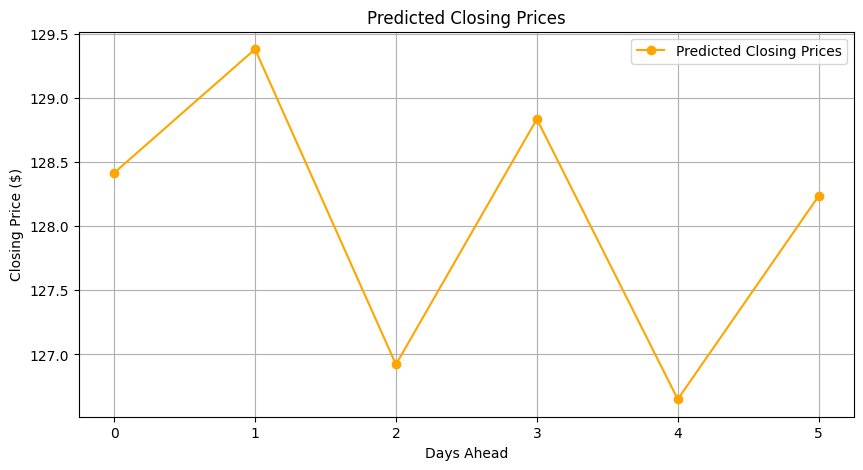

In [ ]:
# Full Script: Stock Price Prediction using Custom Embedding and Inception Blocks with RMSE, MAE, MAPE Metrics, GPU Support, and Early Stopping

# =========================================
# 1. Importing Necessary Libraries
# =========================================

import torch
import torch.nn as nn
import torch.nn.functional as F
import yfinance as yf
import pandas as pd
import numpy as np
import ta  # Technical analysis library
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
import math
import os
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# =========================================
# 2. Defining Custom Layers and Blocks
# =========================================

# -----------------------------------------
# 2.1. Embedding Layers
# -----------------------------------------

class PositionalEmbedding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEmbedding, self).__init__()
        # Compute the positional encodings once in log space.
        pe = torch.zeros(max_len, d_model).float()
        pe.requires_grad = False

        position = torch.arange(0, max_len).float().unsqueeze(1)
        div_term = (torch.arange(0, d_model, 2).float()
                    * -(math.log(10000.0) / d_model)).exp()

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return self.pe[:, :x.size(1)]

class TokenEmbedding(nn.Module):
    def __init__(self, c_in, d_model):
        super(TokenEmbedding, self).__init__()
        padding = 1 if torch.__version__ >= '1.5.0' else 2
        self.tokenConv = nn.Conv1d(in_channels=c_in, out_channels=d_model,
                                   kernel_size=3, padding=padding, padding_mode='circular', bias=False)
        for m in self.modules():
            if isinstance(m, nn.Conv1d):
                nn.init.kaiming_normal_(
                    m.weight, mode='fan_in', nonlinearity='leaky_relu')

    def forward(self, x):
        x = self.tokenConv(x.permute(0, 2, 1)).transpose(1, 2)
        return x

class FixedEmbedding(nn.Module):
    def __init__(self, c_in, d_model):
        super(FixedEmbedding, self).__init__()

        w = torch.zeros(c_in, d_model).float()
        w.requires_grad = False

        position = torch.arange(0, c_in).float().unsqueeze(1)
        div_term = (torch.arange(0, d_model, 2).float()
                    * -(math.log(10000.0) / d_model)).exp()

        w[:, 0::2] = torch.sin(position * div_term)
        w[:, 1::2] = torch.cos(position * div_term)

        self.emb = nn.Embedding(c_in, d_model)
        self.emb.weight = nn.Parameter(w, requires_grad=False)

    def forward(self, x):
        return self.emb(x).detach()

class TemporalEmbedding(nn.Module):
    def __init__(self, d_model, embed_type='fixed', freq='h'):
        super(TemporalEmbedding, self).__init__()

        minute_size = 4
        hour_size = 24
        weekday_size = 7
        day_size = 32
        month_size = 13

        Embed = FixedEmbedding if embed_type == 'fixed' else nn.Embedding
        if freq == 't':
            self.minute_embed = Embed(minute_size, d_model)
        self.hour_embed = Embed(hour_size, d_model)
        self.weekday_embed = Embed(weekday_size, d_model)
        self.day_embed = Embed(day_size, d_model)
        self.month_embed = Embed(month_size, d_model)

    def forward(self, x):
        x = x.long()
        minute_x = self.minute_embed(x[:, :, 4]) if hasattr(
            self, 'minute_embed') else 0.
        hour_x = self.hour_embed(x[:, :, 3])
        weekday_x = self.weekday_embed(x[:, :, 2])
        day_x = self.day_embed(x[:, :, 1])
        month_x = self.month_embed(x[:, :, 0])

        return hour_x + weekday_x + day_x + month_x + minute_x

class TimeFeatureEmbedding(nn.Module):
    def __init__(self, d_model, embed_type='timeF', freq='h'):
        super(TimeFeatureEmbedding, self).__init__()

        freq_map = {'h': 4, 't': 5, 's': 6,
                    'm': 1, 'a': 1, 'w': 2, 'd': 3, 'b': 3}
        d_inp = freq_map[freq]
        self.embed = nn.Linear(d_inp, d_model, bias=False)

    def forward(self, x):
        return self.embed(x)

class DataEmbedding(nn.Module):
    def __init__(self, c_in, d_model, embed_type='fixed', freq='h', dropout=0.1):
        super(DataEmbedding, self).__init__()

        self.value_embedding = TokenEmbedding(c_in=c_in, d_model=d_model)
        self.position_embedding = PositionalEmbedding(d_model=d_model)
        self.temporal_embedding = TemporalEmbedding(d_model=d_model, embed_type=embed_type,
                                                    freq=freq) if embed_type != 'timeF' else TimeFeatureEmbedding(
            d_model=d_model, embed_type=embed_type, freq=freq)
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, x, x_mark=None):
        if x_mark is None:
            x = self.value_embedding(x) + self.position_embedding(x)
        else:
            x = self.value_embedding(
                x) + self.temporal_embedding(x_mark) + self.position_embedding(x)
        return self.dropout(x)

# -----------------------------------------
# 2.2. Convolutional Blocks
# -----------------------------------------

class Inception_Block_V1(nn.Module):
    def __init__(self, in_channels, out_channels, num_kernels=6, init_weight=True):
        super(Inception_Block_V1, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.num_kernels = num_kernels
        kernels = []
        for i in range(self.num_kernels):
            kernels.append(nn.Conv2d(in_channels, out_channels, kernel_size=2 * i + 1, padding=i))
        self.kernels = nn.ModuleList(kernels)
        if init_weight:
            self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)

    def forward(self, x):
        res_list = []
        for i in range(self.num_kernels):
            res_list.append(self.kernels[i](x))
        res = torch.stack(res_list, dim=-1).mean(-1)
        return res

class Inception_Block_V2(nn.Module):
    def __init__(self, in_channels, out_channels, num_kernels=6, init_weight=True):
        super(Inception_Block_V2, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.num_kernels = num_kernels
        kernels = []
        for i in range(self.num_kernels // 2):
            kernels.append(nn.Conv2d(in_channels, out_channels, kernel_size=[1, 2 * i + 3], padding=[0, i + 1]))
            kernels.append(nn.Conv2d(in_channels, out_channels, kernel_size=[2 * i + 3, 1], padding=[i + 1, 0]))
        kernels.append(nn.Conv2d(in_channels, out_channels, kernel_size=1))
        self.kernels = nn.ModuleList(kernels)
        if init_weight:
            self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)

    def forward(self, x):
        res_list = []
        for i in range(self.num_kernels // 2 * 2 + 1):
            res_list.append(self.kernels[i](x))
        res = torch.stack(res_list, dim=-1).mean(-1)
        return res

# -----------------------------------------
# 2.3. TimesBlock
# -----------------------------------------

class TimesBlock(nn.Module):
    def __init__(self, configs):
        super(TimesBlock, self).__init__()
        self.seq_len = configs['seq_len']
        self.pred_len = configs['pred_len']
        self.k = configs['top_k']
        self.conv = nn.Sequential(
            Inception_Block_V1(
                in_channels=configs['d_model'],                # e.g., 64
                out_channels=configs['conv_out_channels'],      # e.g., 32
                num_kernels=configs['conv_num_kernels']        # e.g., 6
            ),
            nn.GELU(),
            Inception_Block_V1(
                in_channels=configs['conv_out_channels'],       # e.g., 32
                out_channels=configs['d_model'],                # e.g., 64
                num_kernels=configs['conv_num_kernels']        # e.g., 6
            )
        )

    def forward(self, x):
        B, T, N = x.size()
        x = x.permute(0, 2, 1).unsqueeze(3)  # Shape: [B, C, T, 1]
        out = self.conv(x)  # After first block: [B, conv_out_channels, T, 1], second block: [B, d_model, T,1]
        out = out.squeeze(3).permute(0, 2, 1)  # Shape: [B, T, d_model]
        return out

# -----------------------------------------
# 2.4. Main Model
# -----------------------------------------

class Model(nn.Module):
    def __init__(self, configs):
        super(Model, self).__init__()
        self.configs = configs
        self.enc_embedding = DataEmbedding(
            c_in=configs['enc_in'],
            d_model=configs['d_model'],
            embed_type=configs['embed'],
            freq=configs['freq'],
            dropout=configs['dropout']
        )
        self.model = nn.ModuleList([TimesBlock(configs) for _ in range(configs['e_layers'])])
        self.layer_norm = nn.LayerNorm(configs['d_model'])
        self.predict_linear = nn.Linear(configs['d_model'], configs['pred_len'])

    def forward(self, x_enc, x_mark=None):
        enc_out = self.enc_embedding(x_enc, x_mark)  # [B, T, C]
        for i in range(self.configs['e_layers']):
            enc_out = self.model[i](enc_out)          # [B, T, C]
            enc_out = self.layer_norm(enc_out)        # [B, T, C]
        dec_out = self.predict_linear(enc_out[:, -1, :])  # [B, pred_len]
        return dec_out.unsqueeze(1)  # [B, 1, pred_len]

# =========================================
# 3. Data Fetching and Preprocessing
# =========================================

# -----------------------------------------
# 3.1. Fetch Historical Data
# -----------------------------------------

def fetch_data(ticker="PDD", period="max"):
    """
    Fetch historical stock data using yfinance.

    Args:
        ticker (str): Stock ticker symbol.
        period (str): Data period (e.g., 'max', '1y', '6mo').

    Returns:
        pd.DataFrame: Historical stock data.
    """
    stock = yf.Ticker(ticker)
    data = stock.history(period=period)
    return data

# -----------------------------------------
# 3.2. Add Technical Indicators
# -----------------------------------------

def add_technical_indicators(data):
    """
    Add technical indicators to the stock data.

    Args:
        data (pd.DataFrame): Stock data with columns ['Open', 'High', 'Low', 'Close', 'Volume'].

    Returns:
        pd.DataFrame: Stock data with added technical indicators.
    """
    data['RSI'] = ta.momentum.RSIIndicator(close=data['Close'], window=14).rsi()
    macd = ta.trend.MACD(close=data['Close'])
    data['MACD'] = macd.macd()
    data['MACD_Signal'] = macd.macd_signal()
    data['MACD_Diff'] = macd.macd_diff()
    data['ATR'] = ta.volatility.AverageTrueRange(
        high=data['High'], low=data['Low'], close=data['Close'], window=14
    ).average_true_range()
    return data

# -----------------------------------------
# 3.3. Prepare Data with Lag Features
# -----------------------------------------

def prepare_lag_features(data, lags=[1,3]):
    """
    Add lag features to the data.

    Args:
        data (pd.DataFrame): Stock data.
        lags (list): List of lag periods.

    Returns:
        pd.DataFrame: Data with lag features.
    """
    for lag in lags:
        data[f'Open_Lag_{lag}'] = data['Open'].shift(lag)
    data = data.dropna()
    return data

# -----------------------------------------
# 3.4. Scaling Data
# -----------------------------------------

def scale_data(data):
    """
    Scale the data using MinMaxScaler.

    Args:
        data (pd.DataFrame): Data to be scaled.

    Returns:
        tuple: Scaled data as numpy array, open scaler, other features scaler.
    """
    scaler_open = MinMaxScaler()
    scaler_other = MinMaxScaler()

    scaled_open = scaler_open.fit_transform(data[['Close']])
    scaled_other = scaler_other.fit_transform(data.drop(columns=['Close']))
    scaled_data = np.hstack([scaled_open, scaled_other])

    return scaled_data, scaler_open, scaler_other

# -----------------------------------------
# 3.5. Create Sequences for Training
# -----------------------------------------

def create_sequences(data, seq_length, pred_length):
    """
    Create input and target sequences for the model.

    Args:
        data (np.ndarray): Scaled data array.
        seq_length (int): Length of input sequences.
        pred_length (int): Length of prediction sequences.

    Returns:
        tuple: Input sequences and target sequences.
    """
    xs = []
    ys = []
    for i in range(len(data) - seq_length - pred_length + 1):
        x = data[i:(i + seq_length)]
        y = data[(i + seq_length):(i + seq_length + pred_length), 0]  # Predict 'Close' prices
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# =========================================
# 4. Model Configuration and Initialization
# =========================================

# -----------------------------------------
# 4.1. Configuration Parameters
# -----------------------------------------

configs = {
    'enc_in': 12,            # Number of features after scaling
    'd_model': 64,           # Dimension of the model
    'conv_out_channels': 32, # Out channels for Inception_Block_V1
    'conv_num_kernels': 6,   # Number of convolutional kernels in Inception_Block_V1
    'seq_len': 40,           # Sequence length
    'pred_len': 6,           # Prediction length
    'top_k': 2,              # Top K (used in TimesBlock, adjust as needed)
    'e_layers': 2,           # Number of encoder layers
    'embed': 'timeF',        # Embedding type
    'freq': 'h',             # Frequency of the data
    'dropout': 0.1           # Dropout rate
}

# =========================================
# 5. Training the Model
# =========================================

# -----------------------------------------
# 5.1. Fetch and Preprocess Data
# -----------------------------------------

# Fetch data
ticker = "PDD"  # You can change this to any stock ticker symbol
period = "2y"  # You can adjust the period as needed
data = fetch_data(ticker=ticker, period=period)

# Select relevant features
features = ['Open', 'High', 'Low', 'Close', 'Volume']
data = data[features].dropna()

# Add technical indicators
data = add_technical_indicators(data)

# Add lag features
data = prepare_lag_features(data, lags=[1,3])

# Drop any remaining NaNs
data = data.dropna()

# Scale data
scaled_data, scaler_open, scaler_other = scale_data(data)

# Update 'enc_in' based on scaled_data
configs['enc_in'] = scaled_data.shape[1]

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Initialize the model with updated 'enc_in'
model = Model(configs).to(device)

# Create sequences
seq_length = configs['seq_len']
pred_length = configs['pred_len']
X, y = create_sequences(scaled_data, seq_length, pred_length)

print(f"Total samples: {len(X)}")
print(f"Input shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split into training and validation sets (80% train, 20% val)
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:], y[train_size:]

print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).to(device)

# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training parameters
num_epochs = 100
batch_size = 32

# Create DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# -----------------------------------------
# 5.2. Define Metric Functions
# -----------------------------------------

def calculate_rmse_np(preds, targets):
    return np.sqrt(np.mean((preds - targets) ** 2))

def calculate_mae_np(preds, targets):
    # To avoid division by zero, add a small epsilon where targets are zero
    epsilon = 1e-8
    return np.median(np.abs((targets - preds) / (targets + epsilon))) * 100


def calculate_mape_np(preds, targets):
    # To avoid division by zero, add a small epsilon where targets are zero
    epsilon = 1e-8
    return np.mean(np.abs((targets - preds) / (targets + epsilon))) * 100

# -----------------------------------------
# 5.3. Early Stopping Class
# -----------------------------------------

class EarlyStopping:
    """
    Early stops the training if validation loss doesn't improve after a given patience.
    """
    def __init__(self, patience=10, verbose=False, delta=0, path='best_model.pth'):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
            verbose (bool): If True, prints a message for each validation loss improvement.
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
            path (str): Path for the checkpoint to be saved to.
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.delta = delta
        self.path = path

    def __call__(self, val_loss, model):

        if self.best_loss is None:
            self.best_loss = val_loss
            self.save_checkpoint(val_loss, model)
        elif val_loss > self.best_loss - self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.best_loss:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)

# -----------------------------------------
# 5.4. Initialize Early Stopping
# -----------------------------------------

early_stopping = EarlyStopping(patience=10, verbose=True, path='best_model.pth')

# -----------------------------------------
# 5.5. Training Loop with Metrics and Early Stopping
# -----------------------------------------

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    train_rmse = 0
    train_mae = 0
    train_mape = 0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)  # Shape: [B, 1, pred_len]
        outputs = outputs.squeeze(1)  # Shape: [B, pred_len]
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * batch_x.size(0)

        # Move tensors to CPU and convert to numpy for inverse scaling
        outputs_np = outputs.detach().cpu().numpy()
        batch_y_np = batch_y.detach().cpu().numpy()

        # Inverse transform to original scale
        outputs_unscaled = scaler_open.inverse_transform(outputs_np)
        batch_y_unscaled = scaler_open.inverse_transform(batch_y_np)

        # Calculate metrics on the original scale
        train_rmse += calculate_rmse_np(outputs_unscaled, batch_y_unscaled) * batch_x.size(0)
        train_mae += calculate_mae_np(outputs_unscaled, batch_y_unscaled) * batch_x.size(0)
        train_mape += calculate_mape_np(outputs_unscaled, batch_y_unscaled) * batch_x.size(0)
    epoch_loss /= len(train_loader.dataset)
    train_rmse /= len(train_loader.dataset)
    train_mae /= len(train_loader.dataset)
    train_mape /= len(train_loader.dataset)

    # Validation
    model.eval()
    val_loss = 0
    val_rmse = 0
    val_mae = 0
    val_mape = 0
    with torch.no_grad():
        for batch_x, batch_y in val_loader:
            outputs = model(batch_x)
            outputs = outputs.squeeze(1)
            loss = criterion(outputs, batch_y)
            val_loss += loss.item() * batch_x.size(0)

            # Move tensors to CPU and convert to numpy for inverse scaling
            outputs_np = outputs.detach().cpu().numpy()
            batch_y_np = batch_y.detach().cpu().numpy()

            # Inverse transform to original scale
            outputs_unscaled = scaler_open.inverse_transform(outputs_np)
            batch_y_unscaled = scaler_open.inverse_transform(batch_y_np)

            # Calculate metrics on the original scale
            val_rmse += calculate_rmse_np(outputs_unscaled, batch_y_unscaled) * batch_x.size(0)
            val_mae += calculate_mae_np(outputs_unscaled, batch_y_unscaled) * batch_x.size(0)
            val_mape += calculate_mape_np(outputs_unscaled, batch_y_unscaled) * batch_x.size(0)
        val_loss /= len(val_loader.dataset)
        val_rmse /= len(val_loader.dataset)
        val_mae /= len(val_loader.dataset)
        val_mape /= len(val_loader.dataset)

    # Logging every 10 epochs and the first epoch
    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}]")
        print(f"Train Loss: {epoch_loss:.6f} | Train RMSE: {train_rmse:.6f} | Train MAE: {train_mae:.6f} | Train MAPE: {train_mape:.2f}%")
        print(f"Val Loss: {val_loss:.6f} | Val RMSE: {val_rmse:.6f} | Val MAE: {val_mae:.6f} | Val MAPE: {val_mape:.2f}%\n")

    # Early Stopping
    early_stopping(val_loss, model)
    if early_stopping.early_stop:
        print("Early stopping triggered.")
        break

# Load the best model
model.load_state_dict(torch.load('best_model.pth'))
print("Loaded the best model from early stopping.")

# =========================================
# 6. Making Predictions
# =========================================

# -----------------------------------------
# 6.1. Prepare the Latest Sequence for Prediction
# -----------------------------------------

SEQ_LENGTH = configs['seq_len']
PRED_LENGTH = configs['pred_len']

if len(scaled_data) < SEQ_LENGTH:
    raise ValueError(f"Not enough data to form a sequence of length {SEQ_LENGTH}.")

last_seq = scaled_data[-SEQ_LENGTH:]  # Shape: (SEQ_LENGTH, feature_size)
last_seq = np.expand_dims(last_seq, axis=0)  # Shape: (1, SEQ_LENGTH, feature_size)

# Convert to tensor
last_seq_tensor = torch.tensor(last_seq, dtype=torch.float32).to(device)

# -----------------------------------------
# 6.2. Load the Trained Model
# -----------------------------------------

# Initialize the model (ensure it's on the correct device)
model = Model(configs).to(device)

# Load the best trained weights from early stopping
model.load_state_dict(torch.load('best_model.pth', map_location=device))
model.eval()
print("Loaded the best trained model for prediction.")

# -----------------------------------------
# 6.3. Make Predictions
# -----------------------------------------

with torch.no_grad():
    prediction = model(last_seq_tensor, x_mark=None).cpu().numpy()

# Inverse transform the predictions to the original scale
predicted_close = scaler_open.inverse_transform(prediction.reshape(-1, 1)).flatten()

print("\nPredicted Closing Prices:")
start_date = data.index[-1] + pd.Timedelta(days=1)  # Start from the day after the last available data
for i, price in enumerate(predicted_close, start=1):
    date = start_date + pd.Timedelta(days=i - 1)
    print(f"{date.date()}: ${price:.2f}")

# =========================================
# 7. Visualizing Predictions
# =========================================

plt.figure(figsize=(10, 5))
plt.plot(predicted_close, marker='o', label='Predicted Closing Prices', color='orange')
plt.title('Predicted Closing Prices')
plt.xlabel('Days Ahead')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=26a6abc9a512ac38a2b864d07428d433bb0df4b3d82cb6fb8cb41d6a09eaf3dd
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
import torch
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import timesfm
from neuralforecast.losses.pytorch import MSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
import ta
# Ensure reproducibility
np.random.seed(42)
torch.manual_seed(42)
# Fetch historical data
def fetch_data(ticker="PDD", period="max"):
    """Fetch historical stock data."""
    stock = yf.Ticker(ticker)
    data = stock.history(period=period)
    return data[['Close']].dropna()

# Add technical indicators (optional)
def add_technical_indicators(data):
    data['RSI'] = ta.momentum.RSIIndicator(data['Close'], window=14).rsi()
    macd = ta.trend.MACD(data['Close'])
    data['MACD'] = macd.macd()
    data['MACD_Signal'] = macd.macd_signal()
    return data
data = fetch_data()  # You can pass ticker and period here if needed
# Fetch and preprocess data
data = add_technical_indicators(data)
data = data.dropna()  # Drop rows with NaNs from technical indicators

# Scale the 'Close' prices
scaler = MinMaxScaler()
data['Close_Scaled'] = scaler.fit_transform(data[['Close']])
# Forecast horizon (6 days)
h = 6

# Prepare the data for TimeSFM
data['unique_id'] = 'PDD'  # Single time series identifier
data['ds'] = data.index  # Timestamp column
data['y'] = data['Close_Scaled']  # Target variable

# Initialize TimeSFM model
model = timesfm.TimesFm(
    horizon_len=h,  # Forecast horizon (6 days)
    input_size=30,  # Number of historical days to consider
    loss=MSE(),  # Loss function
    max_steps=100,  # Training steps
    learning_rate=0.001,  # Learning rate
    early_stop_patience_steps=10,  # Early stopping
)

# Initialize NeuralForecast object
fcst = NeuralForecast(models=[model], freq='B')  # 'B' for business days
# Split the data into train and test sets
split_idx = -h  # Use the last 6 days for testing
train_data = data.iloc[:split_idx]
test_data = data.iloc[split_idx:]

# Fit the model on the training data
fcst.fit(df=train_data[['unique_id', 'ds', 'y']])
# Prepare future dataframe for the next 6 days
future_dates = pd.date_range(
    start=data['ds'].max() + pd.Timedelta(days=1),
    periods=h,
    freq='B'
)
future_df = pd.DataFrame({'unique_id': ['PDD'] * h, 'ds': future_dates})

# Forecast the next 6 days
forecasts_df = fcst.predict(futr_df=future_df)
predicted_scaled = forecasts_df[forecasts_df['unique_id'] == 'PDD']['TimeSFM'].values

# Inverse scale the predictions to original prices
predicted_close = scaler.inverse_transform(predicted_scaled.reshape(-1, 1)).flatten()

print("\nPredicted Close Prices for the Next 6 Days:")
for i, price in enumerate(predicted_close, 1):
    print(f"Day {i}: ${price:.2f}")
def calculate_metrics(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual, predicted)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return {'RMSE': rmse, 'MAE': mae, 'MAPE': mape}

# Prepare validation data
actual_close = scaler.inverse_transform(test_data[['Close_Scaled']]).flatten()

# Calculate metrics
metrics = calculate_metrics(actual_close, predicted_close)
print("\nForecast Metrics:")
print(metrics)
plt.figure(figsize=(10, 5))
plt.plot(test_data['ds'], actual_close, label='Actual Close Prices', marker='o')
plt.plot(future_dates, predicted_close, label='Predicted Close Prices', marker='o', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.title('PDD Close Price Forecast (Next 6 Days)')
plt.legend()
plt.grid(True)
plt.show()


TypeError: TimesFmBase.__init__() got an unexpected keyword argument 'horizon_len'

In [ ]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=3149a37f86e9829912726a566f43b4848329dafaa7e6d740a41ca5a7fd7d4350
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
# -*- coding: utf-8 -*-
"""TimesFM Transformer Forecast

"""

# !pip install -q timesfm
# !pip install -q yfinance

# import the libraries
import timesfm
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
import warnings

warnings.filterwarnings("ignore")

ticker = "NVDA"
df = yf.download(ticker, start="2023-01-01", end="2024-10-01")
print(df.head())

df = df[["Close"]].reset_index(drop=False)
df.columns = ["ds", "y"]
df["unique_id"] = "NVDA"
df.head()

df_train = df[:-64]
df_test = df[-64:]

df_train.shape



[*********************100%***********************]  1 of 1 completed

Price                      Adj Close   Close    High     Low    Open  \
Ticker                          NVDA    NVDA    NVDA    NVDA    NVDA   
Date                                                                   
2023-01-03 00:00:00+00:00  14.305580  14.315  14.996  14.096  14.851   
2023-01-04 00:00:00+00:00  14.739296  14.749  14.853  14.241  14.567   
2023-01-05 00:00:00+00:00  14.255614  14.265  14.564  14.148  14.491   
2023-01-06 00:00:00+00:00  14.849224  14.859  15.010  14.034  14.474   
2023-01-09 00:00:00+00:00  15.617717  15.628  16.056  15.141  15.284   

Price                         Volume  
Ticker                          NVDA  
Date                                  
2023-01-03 00:00:00+00:00  401277000  
2023-01-04 00:00:00+00:00  431324000  
2023-01-05 00:00:00+00:00  389168000  
2023-01-06 00:00:00+00:00  405044000  
2023-01-09 00:00:00+00:00  504231000  


(374, 3)

In [ ]:
# -*- coding: utf-8 -*-
"""TimesFM Transformer Forecast

"""

# !pip install -q timesfm
# !pip install -q yfinance

# import the libraries
import timesfm
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
import warnings
from timesfm import timesfm_base
warnings.filterwarnings("ignore")

ticker = "NVDA"
df = yf.download(ticker, start="2023-01-01", end="2024-10-01")
print(df.head())

df = df[["Close"]].reset_index(drop=False)
df.columns = ["ds", "y"]
df["unique_id"] = "NVDA"
df.head()

df_train = df[:-64]
df_test = df[-64:]

df_train.shape

tfm = timesfm.TimesFm(
    context_len=384,
    horizon_len=64,
    input_patch_len=32,
    output_patch_len=128,
    num_layers=20,
    model_dims=1280,
    backend="gpu",
)
tfm.load_from_checkpoint(repo_id="google/timesfm-1.0-200m")

forecast_df = tfm.forecast_on_df(
    inputs=df_train,
    freq="D",  # daily
    value_name="y",
    num_jobs=-1,
)

forecast_df.head()

test = np.array(df_test["y"])
prediction = np.array(forecast_df["timesfm"])

print(root_mean_squared_error(test, prediction))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
sns.lineplot(x="ds", y="y", data=df)
sns.lineplot(x="ds", y="timesfm", data=forecast_df)

plt.tight_layout()
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
sns.lineplot(x="ds", y="y", data=df_test)
sns.lineplot(x="ds", y="timesfm", data=forecast_df)

plt.tight_layout()
plt.show()



ModuleNotFoundError: No module named 'timesfm'

In [ ]:
!pip install timesfm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.9/819.9 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: traitlets
    Found existing installation: traitlets 5.7.1
    Uninstalling traitlets-5.7.1:
      Successfully uninstalled traitlets-5.7.1
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipyt

In [ ]:
# =========================================
# 1. Import Necessary Libraries
# =========================================

import torch
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS
from neuralforecast.losses.pytorch import MSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
from ripser import ripser
from scipy.stats import wasserstein_distance

# Ensure reproducibility
np.random.seed(42)
torch.manual_seed(42)

# =========================================
# 2. Fetch and Preprocess Data
# =========================================

def fetch_data(ticker="PDD", period="5y"):
    """Fetch historical stock data using Yahoo Finance."""
    stock = yf.Ticker(ticker)
    data = stock.history(period=period)
    return data[['Close']].dropna()

# Fetch PDD data
data = fetch_data()

# Add time-series metadata for NeuralForecast
data['unique_id'] = 'PDD'
data['ds'] = data.index  # Timestamp column
data['y'] = data['Close']

# Calculate percentage change in Close prices
data['pct_change'] = data['Close'].pct_change() * 100
data.dropna(inplace=True)  # Drop first NaN row

# =========================================
# 3. Compute Wasserstein Distance (WD)
# =========================================

def compute_wd(percent_changes):
    """Compute Wasserstein Distance (WD) using PH diagrams."""
    wds = [np.nan]  # First value is NaN

    for i in range(2, len(percent_changes)):
        point_cloud_1 = percent_changes[i - 1:i].reshape(1, -1)
        point_cloud_2 = percent_changes[i - 2:i - 1].reshape(1, -1)

        # Compute PH diagrams and Wasserstein Distance
        ph_t = ripser(point_cloud_1)['dgms'][0]
        ph_t_prev = ripser(point_cloud_2)['dgms'][0]

        if len(ph_t) > 0 and len(ph_t_prev) > 0:
            wd = wasserstein_distance(ph_t.flatten(), ph_t_prev.flatten())
        else:
            wd = np.nan

        wds.append(wd)

    # Ensure the length of WD matches the DataFrame
    while len(wds) < len(percent_changes):
        wds.insert(0, np.nan)

    return np.array(wds)

# Add WD to the dataset
data['WD'] = compute_wd(data['pct_change'].values)
data.dropna(subset=['y', 'pct_change', 'WD'], inplace=True)

# =========================================
# 4. Scale the Data for NBEATS
# =========================================

# Verify data before scaling
if not data[['y']].empty:
    scaler = MinMaxScaler()
    data['y_scaled'] = scaler.fit_transform(data[['y']])
else:
    raise ValueError("Cannot scale data: 'y' column is empty after preprocessing.")

# =========================================
# 5. Split Data for Training and Testing
# =========================================

# Forecast horizon: Predict the next 6 business days
h = 6
split_idx = -h

train_data = data.iloc[:split_idx]
test_data = data.iloc[split_idx:]

# =========================================
# 6. Configure and Train NBEATS Model
# =========================================

# Define NBEATS model parameters
model = NBEATS(
    h=h,
    input_size=30,
    loss=MSE(),
    max_steps=100,
    learning_rate=0.001,
    early_stop_patience_steps=10
)

# Initialize NeuralForecast with NBEATS model
fcst = NeuralForecast(models=[model], freq='B')

# Fit the model
fcst.fit(df=train_data[['unique_id', 'ds', 'y_scaled']].rename(columns={'y_scaled': 'y'}), val_size=h) # Rename 'y_scaled' to 'y' for NeuralForecast

# =========================================
# 7. Forecast the Next 6 Days
# =========================================

# Prepare future dates for forecast
future_dates = pd.date_range(
    start=data['ds'].max() + pd.Timedelta(days=1),
    periods=h,
    freq='B'
)

# Create future DataFrame
future_df = pd.DataFrame({'unique_id': ['PDD'] * h, 'ds': future_dates})

# Make predictions
forecasts_df = fcst.predict(futr_df=future_df)

# Inverse transform predictions to original scale
predicted_scaled = forecasts_df[forecasts_df['unique_id'] == 'PDD']['NBEATS'].values
predicted_close = scaler.inverse_transform(predicted_scaled.reshape(-1, 1)).flatten()

# Print predicted close prices
print("\nPredicted Close Prices for the Next 6 Days:")
for i, price in enumerate(predicted_close, 1):
    print(f"Day {i}: ${price:.2f}")

# =========================================
# 8. Calculate Metrics (RMSE, MAE, MAPE)
# =========================================

def calculate_metrics(actual, predicted):
    """Calculate RMSE, MAE, and MAPE."""
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual, predicted)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return {'RMSE': rmse, 'MAE': mae, 'MAPE': mape}

# Prepare actual and predicted values
actual_close = test_data['y'].values
predicted_close_for_metrics = scaler.inverse_transform(
    test_data[['y_scaled']].values).flatten()

# Calculate metrics
metrics = calculate_metrics(actual_close, predicted_close_for_metrics)
print("\nMetrics on Test Data:")
print(metrics)

# =========================================
# 9. Visualize Predictions
# =========================================

plt.figure(figsize=(10, 5))
plt.plot(test_data['ds'], actual_close, label='Actual Close Prices', marker='o')
plt.plot(future_dates, predicted_close, label='Predicted Close Prices', marker='o', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.title('PDD Close Price Prediction (Next 6 Days) using NBEATS')
plt.legend()
plt.grid(True)
plt.show()

# =========================================
# 10. Save Forecasts to Excel
# =========================================

forecast_results = pd.DataFrame({'ds': future_dates, 'Predicted_Close': predicted_close})
forecast_results.to_excel('PDD_NBEATS_Forecasts.xlsx', index=False)
print("\nForecasts saved to 'PDD_NBEATS_Forecasts.xlsx'.")


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/ripser/ripser.py:247: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ripser/ripser.py:247: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1452: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:10600: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.multiply(np.abs(u_cdf - v_cdf), deltas))
/usr/local/lib/python3.10/dist-packages/ripser/ripser.py:247: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that th

ValueError: Cannot scale data: 'y' column is empty after preprocessing.

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.3541
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2901
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2284
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1770
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1147
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0756
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0402
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0213
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0230
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0190
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


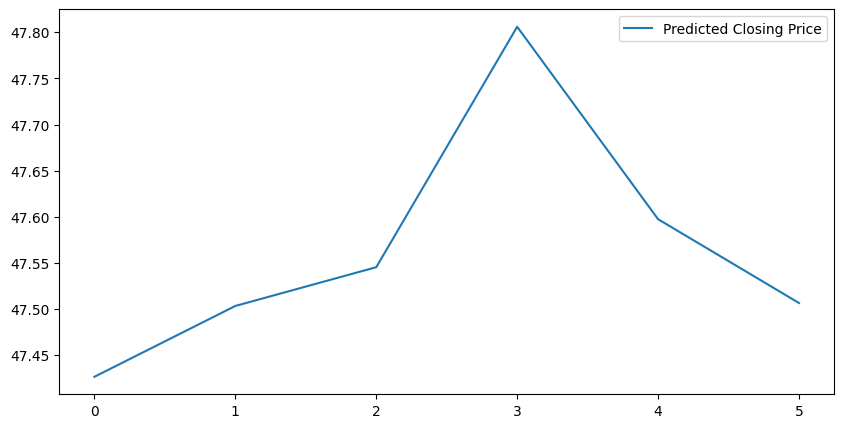

Running auto_arima to tune SARIMAX model, this might take a few moments...
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,0)[6] intercept   : AIC=inf, Time=2.69 sec
 ARIMA(0,0,0)(0,1,0)[6] intercept   : AIC=1689.882, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[6] intercept   : AIC=1584.340, Time=0.48 sec
 ARIMA(0,0,1)(0,1,1)[6] intercept   : AIC=inf, Time=2.13 sec
 ARIMA(0,0,0)(0,1,0)[6]             : AIC=1687.882, Time=0.08 sec
 ARIMA(1,0,0)(0,1,0)[6] intercept   : AIC=1691.738, Time=0.10 sec
 ARIMA(1,0,0)(2,1,0)[6] intercept   : AIC=1533.187, Time=1.24 sec
 ARIMA(1,0,0)(2,1,1)[6] intercept   : AIC=inf, Time=2.40 sec
 ARIMA(1,0,0)(1,1,1)[6] intercept   : AIC=inf, Time=3.05 sec
 ARIMA(0,0,0)(2,1,0)[6] intercept   : AIC=1531.744, Time=2.07 sec
 ARIMA(0,0,0)(1,1,0)[6] intercept   : AIC=1582.726, Time=1.33 sec
 ARIMA(0,0,0)(2,1,1)[6] intercept   : AIC=inf, Time=2.31 sec
 ARIMA(0,0,0)(1,1,1)[6] intercept   : AIC=inf, Time=1.34 sec
 ARIMA(0,0,1)(2,1,0)[6] intercept   : AIC=1533.091, Ti

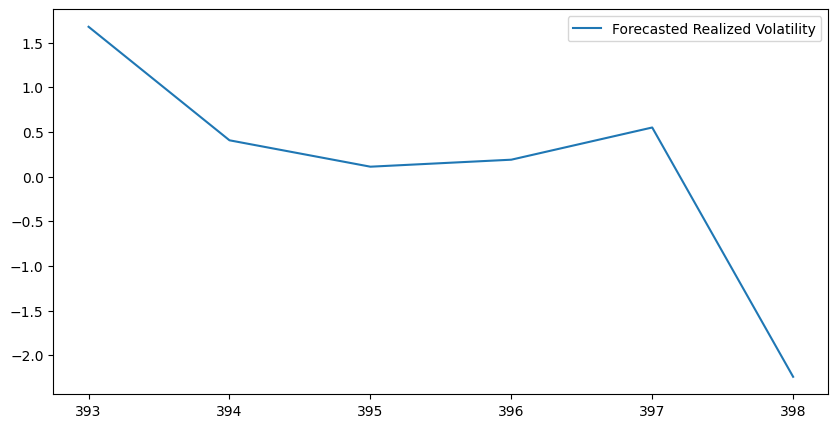

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


  0%|          | 0/6 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Corrected SHAP values shape: (6, 6)
X_test_reshaped shape: (6, 6)


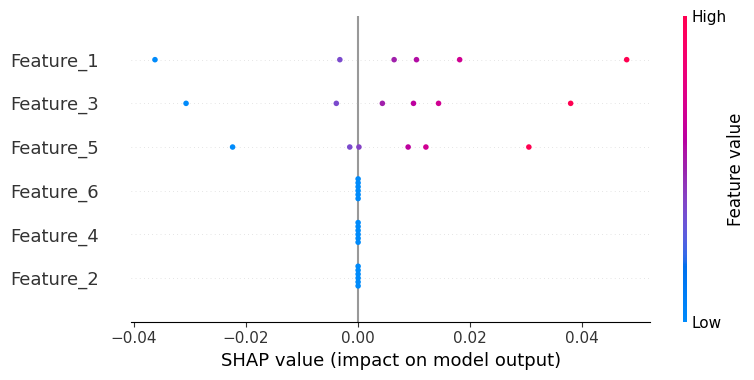


Forecasts saved to 'PDD_Forecasts.xlsx'.


In [ ]:
# =========================================
# 1. Import Necessary Libraries
# =========================================

import yfinance as yf
import numpy as np
import pandas as pd
from ripser import ripser
from scipy.stats import wasserstein_distance
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import shap
import openpyxl
import warnings
warnings.filterwarnings("ignore")
import pmdarima as pm
from pmdarima.arima import auto_arima # Import auto_arima
# =========================================
# 2. Fetch and Preprocess Data
# =========================================

def fetch_data(ticker="MAGS", period="2y"):
    """Fetch historical stock data using Yahoo Finance."""
    stock = yf.Ticker(ticker)
    data = stock.history(period=period)
    return data[['Close']].dropna()

# Fetch data and compute percentage change
data = fetch_data()
data['pct_change'] = data['Close'].pct_change() * 100  # Convert to percentage
data.dropna(inplace=True)  # Drop the first NaN row

# Add time-series metadata
data['unique_id'] = ticker
data['ds'] = data.index  # Timestamp column
data['y'] = data['pct_change']  # Target variable

# =========================================
# 3. Compute Wasserstein Distance (WD)
# =========================================

def compute_wd(percent_changes):
    """Compute Wasserstein Distance (WD) using PH diagrams."""
    wds = [np.nan]  # First value is NaN

    for i in range(2, len(percent_changes)):
        point_cloud_1 = percent_changes[i - 1:i].reshape(1, -1)
        point_cloud_2 = percent_changes[i - 2:i - 1].reshape(1, -1)

        ph_t = ripser(point_cloud_1)['dgms'][0]
        ph_t_prev = ripser(point_cloud_2)['dgms'][0]

        if len(ph_t) > 0 and len(ph_t_prev) > 0:
            wd = wasserstein_distance(ph_t.flatten(), ph_t_prev.flatten())
        else:
            wd = np.nan

        wds.append(wd)

    while len(wds) < len(percent_changes):
        wds.insert(0, np.nan)

    return np.array(wds)

# Compute WD and add it to the dataset
data['WD'] = compute_wd(data['pct_change'].values)
data['WD'].fillna(0, inplace=True)  # Replace NaNs with 0

# =========================================
# 4. Scale Data with MinMaxScaler
# =========================================

if data[['y']].dropna().empty:
    print("Warning: No valid data found in 'y'. Filling NaNs with 0.")
    data['y'].fillna(0, inplace=True)

scaler = MinMaxScaler()
data[['y']] = scaler.fit_transform(data[['y']])

# =========================================
# 5. Prepare Data for LSTM
# =========================================

window_size = 3  # Use 3 days of data for predictions
X, y = [], []

for i in range(window_size, len(data)):
    X.append(data.iloc[i - window_size:i][['y', 'WD']].values)
    y.append(data.iloc[i]['y'])

X, y = np.array(X), np.array(y)

# Train-test split
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# =========================================
# 6. Define and Train LSTM Model
# =========================================

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predict the next 6 days
pred_pct_change = model.predict(X_test[-6:])
pred_pct_change = scaler.inverse_transform(pred_pct_change)

# Invert the predicted percentage change
last_known_close = data['Close'].iloc[-1]  # Get the last known closing price
predicted_closes = last_known_close * (1 + pred_pct_change.flatten() / 100)

# Plot predictions (optional)
plt.figure(figsize=(10, 5))
plt.plot(predicted_closes, label='Predicted Closing Price')
plt.legend()
plt.show()

# =========================================
# 7. Forecast Realized Volatility Using SARIMA
# =========================================

# =========================================
#  Auto-Tune SARIMAX Model with auto_arima
# =========================================

print("Running auto_arima to tune SARIMAX model, this might take a few moments...")

# Perform auto_arima to find the best order and seasonal order
auto_model = auto_arima(
    data['pct_change'],  # Target variable
    start_p=1, max_p=3,  # AR component range
    start_q=1, max_q=3,  # MA component range
    d=None,  # Automatically determine 'd'
    seasonal=True,  # Enable seasonal component
    m=6,  # Seasonality (weekly in this example)
    start_P=0, max_P=2,  # Seasonal AR range
    start_Q=0, max_Q=2,  # Seasonal MA range
    D=1,  # Seasonal differencing
    trace=True,  # Print results for each trial
    error_action='ignore',  # Ignore errors during search
    suppress_warnings=True,  # Suppress warnings
    stepwise=True  # Use stepwise algorithm for faster computation
)

# Display the summary of the best model found
print("\nBest SARIMAX Model Found:")
print(auto_model.summary())

# Extract the best orders from the auto_arima model
best_order = auto_model.order
best_seasonal_order = auto_model.seasonal_order

print(f"\nBest Order: {best_order}")
print(f"Best Seasonal Order: {best_seasonal_order}")

# =========================================
# 4. Fit SARIMAX Model with Best Parameters
# =========================================

sarimax_model = SARIMAX(
    data['pct_change'],
    order=best_order,
    seasonal_order=best_seasonal_order
)
sarimax_results = sarimax_model.fit()

# Display SARIMAX model summary
print("\nSARIMAX Model Summary:")
print(sarimax_results.summary())

# Forecast the next 6 days
vol_forecast = sarimax_results.get_forecast(steps=6).predicted_mean

# Plot forecasted realized volatility
plt.figure(figsize=(10, 5))
vol_forecast.plot(label='Forecasted Realized Volatility', legend=True)
plt.show()

# =========================================
# 8. SHAP Interpretation for LSTM Predictions
# =========================================

# Reshape the input for SHAP compatibility
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)  # Flatten to 2D
X_test_reshaped = X_test[-6:].reshape(-1, X_test.shape[1] * X_test.shape[2])  # Flatten for SHAP

# Dynamically generate feature names to match the flattened input structure
num_features = X_test_reshaped.shape[1]
feature_names = [f'Feature_{i+1}' for i in range(num_features)]

def model_predict(X):
    """Wrapper function for LSTM predictions."""
    X = X.reshape((X.shape[0], window_size, 2))  # Reshape back to LSTM input shape
    predictions = model.predict(X)
    return predictions.reshape(-1, 1)  # Ensure output is 2D

# Create SHAP KernelExplainer with a sample of the training data
explainer = shap.KernelExplainer(model_predict, shap.sample(X_train_reshaped, 100))

# Compute SHAP values for the test samples
shap_values = explainer.shap_values(X_test_reshaped)

# Reshape SHAP values to remove the extra dimension
shap_values_corrected = np.array(shap_values).squeeze(-1)

# Check shapes to ensure alignment
print(f"Corrected SHAP values shape: {shap_values_corrected.shape}")
print(f"X_test_reshaped shape: {X_test_reshaped.shape}")

# Plot SHAP summary plot
shap.summary_plot(shap_values_corrected, X_test_reshaped, feature_names=feature_names)

# =========================================
# 9. Save Forecasts to Excel
# =========================================

forecast_results = pd.DataFrame({
    'Date': pd.date_range(start=data['ds'].max() + pd.Timedelta(days=1), periods=6, freq='B').tz_localize(None), # Remove timezone information
    'Predicted_Close': pred_pct_change.flatten()
})
forecast_results.to_excel('PDD_Forecasts.xlsx', index=False)
print("\nForecasts saved to 'PDD_Forecasts.xlsx'.")


In [ ]:
pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.2 MB/s eta 0:00:00


In Summary
The 6 features in the SHAP plot correspond to:

Feature_1: Scaled closing price from day 1.
Feature_2: WD value from day 1.
Feature_3: Scaled closing price from day 2.
Feature_4: WD value from day 2.
Feature_5: Scaled closing price from day 3.
Feature_6: WD value from day 3.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import wasserstein_distance
from ripser import ripser
import yfinance as yf
import requests
from zipfile import ZipFile
from io import BytesIO
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# =========================================
# 1. Fetch Data
# =========================================

YOUR_FRED_API_KEY = 'd4979ac4eaeaee9d5f24fa40bb02e376'

def fetch_yahoo_data(ticker, column_prefix):
    """Fetch data from Yahoo Finance and rename columns."""
    data = yf.download(ticker)
    return data.rename(columns=lambda col: f"{column_prefix}_{col}")

def fetch_fred_data(series_id, api_key):
    """Fetch data from FRED API."""
    url = f"https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={api_key}&file_type=json"
    response = requests.get(url)
    data = response.json()
    df = pd.DataFrame(data['observations'])
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df[series_id] = pd.to_numeric(df['value'], errors='coerce')
    return df[[series_id]]

def fetch_fama_french_data():
    """Fetch Fama-French factors."""
    url = "http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_5_Factors_2x3_daily_CSV.zip"
    response = requests.get(url)
    with ZipFile(BytesIO(response.content)) as zipfile:
        filename = zipfile.namelist()[0]
        with zipfile.open(filename) as file:
            ff_data = pd.read_csv(file, skiprows=3)
    ff_data = ff_data.rename(columns={'Unnamed: 0': 'date'})
    ff_data['date'] = pd.to_datetime(ff_data['date'], format='%Y%m%d')
    ff_data.set_index('date', inplace=True)
    return ff_data

# Fetch data from sources
pdd_data = fetch_yahoo_data('PDD', 'PDD')
vix_data = fetch_yahoo_data('^VIX', 'VIX')
dxy_data = fetch_yahoo_data('DX-Y.NYB', 'DXY')
threefytp1_data = fetch_fred_data('THREEFYTP1', YOUR_FRED_API_KEY)
t10y3m_data = fetch_fred_data('T10Y3M', YOUR_FRED_API_KEY)
ted_rate_data = fetch_fred_data('TEDRATE', YOUR_FRED_API_KEY)
fama_french_data = fetch_fama_french_data()

# =========================================
# 2. Merge Data Using Outer Join
# =========================================

data = pdd_data[['PDD_Close']].join([
    vix_data[['VIX_Close']],
    dxy_data[['DXY_Close']],
    threefytp1_data,
    t10y3m_data,
    ted_rate_data,
    fama_french_data
], how='outer')

# Fill missing values and sort by date
data.ffill(inplace=True)
data.bfill(inplace=True)
data.sort_index(inplace=True)

# Calculate percentage change
data['PDD_pct_change'] = data['PDD_Close'].pct_change() * 100

# =========================================
# 3. Calculate Realized Volatility and WD
# =========================================

def calculate_realized_volatility(data):
    """Calculate daily, weekly, and monthly realized volatility."""
    data['RV_daily'] = np.log(data['PDD_Close']).diff() ** 2
    data['RV_weekly'] = data['RV_daily'].rolling(window=5).sum()
    data['RV_monthly'] = data['RV_daily'].rolling(window=21).sum()
    return data

def compute_wd(percent_changes):
    """Compute WD using PH diagrams."""
    wds = []
    for i in range(2, len(percent_changes)):
        pc1 = percent_changes[i - 1:i].reshape(1, -1)
        pc2 = percent_changes[i - 2:i - 1].reshape(1, -1)
        ph_t = ripser(pc1, distance_matrix=True)['dgms'][0]
        ph_t_prev = ripser(pc2, distance_matrix=True)['dgms'][0]
        if len(ph_t) > 0 and len(ph_t_prev) > 0:
            wd = wasserstein_distance(ph_t.flatten(), ph_t_prev.flatten())
        else:
            wd = np.nan
        wds.append(wd)

    wds = [np.nan] * (len(percent_changes) - len(wds)) + wds
    return np.array(wds)

data = calculate_realized_volatility(data)
data['WD'] = compute_wd(data['PDD_pct_change'].values)

# Ensure alignment and drop remaining NaNs
data.dropna(inplace=True)

# =========================================
# 4. Prepare Data for Regression
# =========================================

# Shift RV_daily to predict the next day's volatility
data['RV_next_day'] = data['RV_daily'].shift(-1)

# Drop NaNs now to align X and y properly
data.dropna(inplace=True)

# Define dependent and independent variables
y = data['RV_next_day']
X = data[['RV_daily', 'RV_weekly', 'RV_monthly', 'WD', 'DXY_Close', 'TEDRATE', 'THREEFYTP1']]

# Debugging: Check shapes
print(f"X shape: {X.shape}, y shape: {y.shape}")

# Standardize the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = sm.add_constant(X_scaled)

# =========================================
# 5. Check for Multicollinearity using VIF
# =========================================

def calculate_vif(X):
    """Calculate VIF for each feature."""
    vif = pd.DataFrame()
    vif['Variable'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

vif = calculate_vif(pd.DataFrame(X_scaled, columns=['const'] + X.columns.tolist()))
print("\nVIF:")
print(vif)

# Drop features with high VIF if necessary
final_features = vif[vif['VIF'] <= 10]['Variable'].tolist()
X_final = pd.DataFrame(X_scaled, columns=['const'] + X.columns.tolist())[final_features]

# =========================================
# 6. Fit the HAR-WD Model
# =========================================

model = sm.OLS(y, X_final).fit()

# Check for heteroskedasticity
_, pval, _, _ = sm.stats.diagnostic.het_breuschpagan(model.resid, model.model.exog)
if pval < 0.05:
    print("\nHeteroskedasticity detected. Using EGLS.")
    model = sm.GLS(y, X_final).fit()

# Display the regression results
print("\nRegression Results:")
print(model.summary())

# =========================================
# 7. Save Results to Excel
# =========================================

results_df = pd.DataFrame({
    'Variable': model.params.index,
    'Coefficient': model.params.values,
    'P-Value': model.pvalues.values
})
results_df.to_excel('HAR_WD_Model_Results.xlsx', index=False)
print("\nResults saved to 'HAR_WD_Model_Results.xlsx'.")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


X shape: (0, 7), y shape: (0,)


ValueError: Found array with 0 sample(s) (shape=(0, 7)) while a minimum of 1 is required by StandardScaler.

In [ ]:

YOUR_FRED_API_KEY= 'd4979ac4eaeaee9d5f24fa40bb02e376'
import pandas as pd
import yfinance as yf
import requests

# Function to fetch data from Yahoo Finance API
def fetch_yahoo_data(ticker):
    return yf.download(ticker)

def fetch_fred_data(series_id, api_key):
    url = f"https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={YOUR_FRED_API_KEY}&file_type=json"
    response = requests.get(url)
    data = response.json()
    #print(data)  # Print the response to check its structure
    return pd.DataFrame(data['observations'])

# Fetching data for THREEFYTP1 to check the structure
threefytp1_data = fetch_fred_data('THREEFYTP1', YOUR_FRED_API_KEY)

# Function to fetch data from Kenneth R. French Website
def fetch_fama_french_data():
    url = "http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_5_Factors_2x3_daily_CSV.zip"
    response = requests.get(url)
    # You may need to handle zip file extraction here

# Fetching data
vix_data = fetch_yahoo_data('^VIX')
pdd_data = fetch_yahoo_data('PDD')
dxy_data = fetch_yahoo_data('DX-Y.NYB')
threefytp1_data = fetch_fred_data('THREEFYTP1', 'YOUR_FRED_API_KEY')
t10y3m_data = fetch_fred_data('T10Y3M', 'YOUR_FRED_API_KEY')
ted_rate_data = fetch_fred_data('TEDRATE', 'YOUR_FRED_API_KEY')
fama_french_data = fetch_fama_french_data()
pdd_data.to_csv('pdd_data.csv')
print("pdd_data saved to pdd_data.csv")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


pdd_data saved to pdd_data.csv


In [ ]:
YOUR_FRED_API_KEY= 'd4979ac4eaeaee9d5f24fa40bb02e376'
api_key= 'd4979ac4eaeaee9d5f24fa40bb02e376'
#!pip install yfinance requests pandas zipfile io
import pandas as pd
import yfinance as yf
import requests
import zipfile
import io
from zipfile import ZipFile
from io import BytesIO

def fetch_yahoo_data(ticker):
    try:
        return yf.download(ticker)
    except Exception as e:
        print(f"Error fetching Yahoo Finance data for {ticker}: {e}")
        return pd.DataFrame()

def fetch_fred_data(series_id, api_key):
    url = f"https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={api_key}&file_type=json"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return pd.DataFrame(data['observations'])
    else:
        print(f"Error fetching FRED data for {series_id}: {response.status_code}")
        return pd.DataFrame()

def fetch_fama_french_data(url="http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_5_Factors_2x3_daily_CSV.zip"):
    """
    Fetch Fama-French factors, handling header rows correctly.
    """
    response = requests.get(url)
    with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
        with zip_ref.open('F-F_Research_Data_5_Factors_2x3_daily.CSV') as f:
            # Skip the first 3 rows to avoid header issues
            # Use the 4th row as header, and the 1st column as index
            fama_french_df = pd.read_csv(f, header=2, skiprows=[0,1,3], index_col=0)
    # Convert index to datetime objects
    fama_french_df.index = pd.to_datetime(fama_french_df.index, format='%Y%m%d')
    return fama_french_df

# Replace 'YOUR_FRED_API_KEY' with your actual FRED API key
YOUR_FRED_API_KEY = 'd4979ac4eaeaee9d5f24fa40bb02e376'  # Replace with your FRED API key
# Fetch data from sources
pdd_data = fetch_yahoo_data('PDD')
# Rename the 'Close' column to 'PDD_Close' if needed
pdd_data = pdd_data.rename(columns={'Close': 'PDD_Close'})
pdd_data.index.name = 'Date'
# Format the date column to 'yy-m-d'
pdd_data.index = pdd_data.index.strftime('%yyyy-%m-%d')
vix_data = fetch_yahoo_data('^VIX')
dxy_data = fetch_yahoo_data('DX-Y.NYB')
threefytp1_data = fetch_fred_data('THREEFYTP1', YOUR_FRED_API_KEY)
threefytp1_data = threefytp1_data.rename(columns={'date': 'Date'})
t10y3m_data = fetch_fred_data('T10Y3M', YOUR_FRED_API_KEY)
ted_rate_data = fetch_fred_data('TEDRATE', YOUR_FRED_API_KEY)
fama_french_data = fetch_fama_french_data() # This should work now

data = pdd_data[['PDD_Close']].join([threefytp1_data[['value']]
], how='outer')
data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


(PDD_Close, PDD) value
18yyy-07-26         26.700001   NaN
18yyy-07-27         24.600000   NaN
18yyy-07-30         22.500000   NaN
18yyy-07-31         22.590000   NaN
18yyy-08-01         20.309999   NaN

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import wasserstein_distance
from ripser import ripser
import yfinance as yf
import requests
from zipfile import ZipFile
from io import BytesIO
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# =========================================
# 1. Fetch Data
# =========================================

YOUR_FRED_API_KEY = 'd4979ac4eaeaee9d5f24fa40bb02e376'

def fetch_yahoo_data(ticker, column_prefix):
    """Fetch data from Yahoo Finance and rename columns."""
    data = yf.download(ticker)
    return data.rename(columns=lambda col: f"{column_prefix}_{col}")

def fetch_fred_data(series_id, api_key):
    """Fetch data from FRED API."""
    url = f"https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={api_key}&file_type=json"
    response = requests.get(url)
    data = response.json()
    df = pd.DataFrame(data['observations'])
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df[series_id] = pd.to_numeric(df['value'], errors='coerce')
    return df[[series_id]]

def fetch_fama_french_data():
    """Fetch Fama-French factors."""
    url = "http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_5_Factors_2x3_daily_CSV.zip"
    response = requests.get(url)
    with ZipFile(BytesIO(response.content)) as zipfile:
        filename = zipfile.namelist()[0]
        with zipfile.open(filename) as file:
            ff_data = pd.read_csv(file, skiprows=3)
    ff_data = ff_data.rename(columns={'Unnamed: 0': 'date'})
    ff_data['date'] = pd.to_datetime(ff_data['date'], format='%Y%m%d')
    ff_data.set_index('date', inplace=True)
    return ff_data

# Fetch data from sources
pdd_data = fetch_yahoo_data('PDD', 'PDD')
vix_data = fetch_yahoo_data('^VIX', 'VIX')
dxy_data = fetch_yahoo_data('DX-Y.NYB', 'DXY')
threefytp1_data = fetch_fred_data('THREEFYTP1', YOUR_FRED_API_KEY)
t10y3m_data = fetch_fred_data('T10Y3M', YOUR_FRED_API_KEY)
ted_rate_data = fetch_fred_data('TEDRATE', YOUR_FRED_API_KEY)
fama_french_data = fetch_fama_french_data()

# =========================================
# 2. Merge Data Using Outer Join
# =========================================

data = pdd_data[['PDD_Close']].join([
    vix_data[['VIX_Close']],
    dxy_data[['DXY_Close']],
    threefytp1_data,
    t10y3m_data,
    ted_rate_data,
    fama_french_data
], how='outer')
data.head()

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.2823
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1943
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1267
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0644
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0252
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0165
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0152
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0123
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0122
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0103
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step

Predicted Close Prices (Original Scale) for the Next 6 Days:
Day 1: $121.18
Day 2: $120.46
Day 3: $118.38
Day 4: $119.12
Day 5: $120.28
Day 6: $120.24


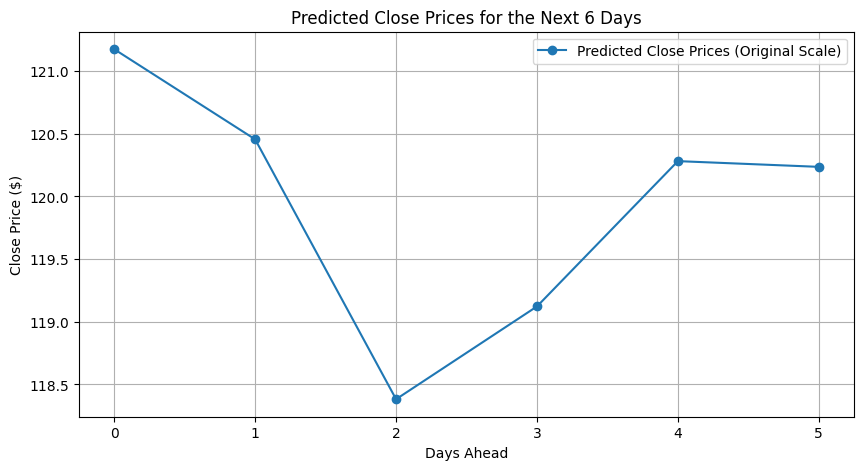

Running auto_arima to tune SARIMAX model...
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,0)[6] intercept   : AIC=3054.208, Time=0.60 sec
 ARIMA(0,0,0)(0,1,0)[6] intercept   : AIC=3056.536, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[6] intercept   : AIC=2919.917, Time=0.82 sec
 ARIMA(0,0,1)(0,1,1)[6] intercept   : AIC=inf, Time=3.71 sec
 ARIMA(0,0,0)(0,1,0)[6]             : AIC=3054.545, Time=0.10 sec
 ARIMA(1,0,0)(0,1,0)[6] intercept   : AIC=3052.482, Time=0.15 sec
 ARIMA(1,0,0)(2,1,0)[6] intercept   : AIC=2854.426, Time=2.13 sec
 ARIMA(1,0,0)(2,1,1)[6] intercept   : AIC=inf, Time=6.62 sec
 ARIMA(1,0,0)(1,1,1)[6] intercept   : AIC=inf, Time=3.05 sec
 ARIMA(0,0,0)(2,1,0)[6] intercept   : AIC=2855.006, Time=1.79 sec
 ARIMA(2,0,0)(2,1,0)[6] intercept   : AIC=2854.774, Time=2.13 sec
 ARIMA(1,0,1)(2,1,0)[6] intercept   : AIC=2854.270, Time=4.65 sec
 ARIMA(1,0,1)(1,1,0)[6] intercept   : AIC=2920.534, Time=4.48 sec
 ARIMA(1,0,1)(2,1,1)[6] intercept   : AIC=inf, Time=7.35 sec
 ARIMA(1,

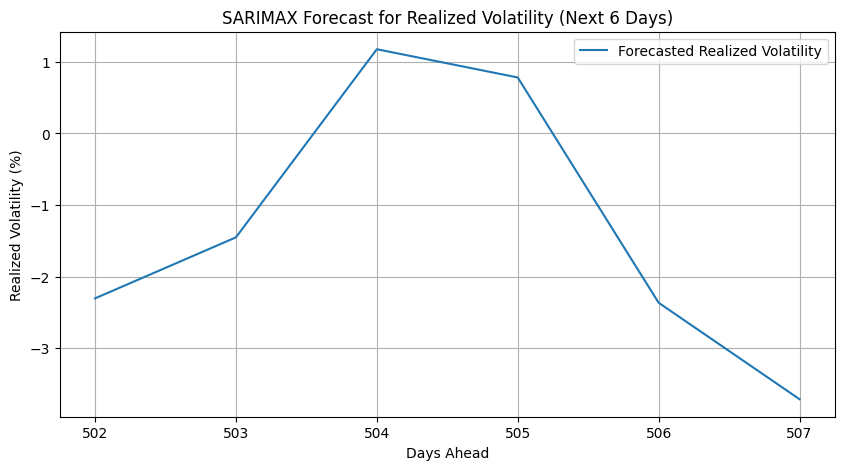

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  


  0%|          | 0/6 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


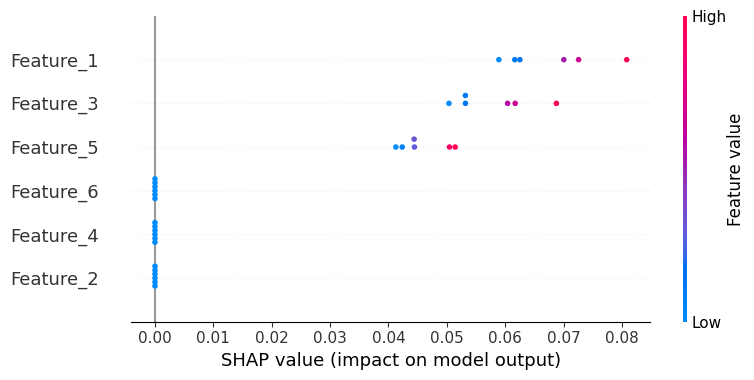


Forecasts saved to 'PDD_Forecasts.xlsx'.


In [ ]:
# =========================================
# 1. Import Necessary Libraries
# =========================================

import yfinance as yf
import numpy as np
import pandas as pd
from ripser import ripser
from scipy.stats import wasserstein_distance
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import shap
import warnings
from pmdarima import auto_arima

# Suppress warnings
warnings.filterwarnings("ignore")

# =========================================
# 2. Fetch and Preprocess Data
# =========================================
ticker="PDD"

def fetch_data(ticker=ticker, period="2Y"):
    """Fetch historical stock data using Yahoo Finance."""
    stock = yf.Ticker(ticker)
    data = stock.history(period=period)
    return data[['Close']].dropna()

# Fetch data
data = fetch_data()

# Compute percentage change to forecast volatility
data['pct_change'] = data['Close'].pct_change() * 100  # Convert to percentage
data.dropna(inplace=True)

# Add time-series metadata
data['unique_id'] = ticker
data['ds'] = data.index  # Timestamp column
data['y'] = data['Close']  # Use 'Close' price as the target variable

# =========================================
# 3. Compute Wasserstein Distance (WD)
# =========================================

def compute_wd(percent_changes):
    """Compute Wasserstein Distance (WD) using persistent homology diagrams."""
    wds = [np.nan]  # First value is NaN
    for i in range(2, len(percent_changes)):
        point_cloud_1 = percent_changes[i - 1:i].reshape(1, -1)
        point_cloud_2 = percent_changes[i - 2:i - 1].reshape(1, -1)

        ph_t = ripser(point_cloud_1)['dgms'][0]
        ph_t_prev = ripser(point_cloud_2)['dgms'][0]

        if len(ph_t) > 0 and len(ph_t_prev) > 0:
            wd = wasserstein_distance(ph_t.flatten(), ph_t_prev.flatten())
        else:
            wd = np.nan

        wds.append(wd)

    while len(wds) < len(percent_changes):
        wds.insert(0, np.nan)

    return np.array(wds)

# Compute WD and add to the dataset
data['WD'] = compute_wd(data['pct_change'].values)
data['WD'].fillna(0, inplace=True)  # Replace NaNs with 0

# =========================================
# 4. Scale Data with MinMaxScaler
# =========================================

scaler = MinMaxScaler()
data[['y']] = scaler.fit_transform(data[['y']])  # Scale 'Close' prices

# =========================================
# 5. Prepare Data for LSTM
# =========================================

window_size = 3  # Use 3-day sliding windows
X, y = [], []

for i in range(window_size, len(data)):
    X.append(data.iloc[i - window_size:i][['y', 'WD']].values)  # Scaled data + WD
    y.append(data.iloc[i]['y'])  # Target

X, y = np.array(X), np.array(y)

# Train-test split
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# =========================================
# 6. Define and Train LSTM Model
# =========================================

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# =========================================
# 7. Predict Prices and Inverse Transform
# =========================================

# Predict scaled values for the next 6 days
pred_scaled = model.predict(X_test[-6:])

# Inverse transform to original scale
predicted_close = scaler.inverse_transform(pred_scaled).flatten()

# Print predicted prices in the original scale
print("\nPredicted Close Prices (Original Scale) for the Next 6 Days:")
for i, price in enumerate(predicted_close, 1):
    print(f"Day {i}: ${price:.2f}")

# Plot predicted prices
plt.figure(figsize=(10, 5))
plt.plot(predicted_close, label='Predicted Close Prices (Original Scale)', marker='o')
plt.xlabel('Days Ahead')
plt.ylabel('Close Price ($)')
plt.title('Predicted Close Prices for the Next 6 Days')
plt.legend()
plt.grid(True)
plt.show()

# =========================================
# 8. Forecast Volatility with SARIMAX
# =========================================

# Auto-tune SARIMAX model
print("Running auto_arima to tune SARIMAX model...")
auto_model = auto_arima(
    data['pct_change'], start_p=1, max_p=3, start_q=1, max_q=3,
    seasonal=True, m=6, start_P=0, max_P=2, start_Q=0, max_Q=2, D=1,
    trace=True, stepwise=True
)

# Extract the best parameters
best_order = auto_model.order
best_seasonal_order = auto_model.seasonal_order

# Fit the SARIMAX model
sarimax_model = SARIMAX(
    data['pct_change'], order=best_order, seasonal_order=best_seasonal_order
)
sarimax_results = sarimax_model.fit()

# Forecast the next 6 days of volatility
vol_forecast = sarimax_results.get_forecast(steps=6).predicted_mean

# Plot volatility forecast
plt.figure(figsize=(10, 5))
vol_forecast.plot(label='Forecasted Realized Volatility', legend=True)
plt.xlabel('Days Ahead')
plt.ylabel('Realized Volatility (%)')
plt.title('SARIMAX Forecast for Realized Volatility (Next 6 Days)')
plt.grid(True)
plt.show()

# =========================================
# 9. SHAP Interpretation of LSTM Predictions
# =========================================

# Reshape input for SHAP compatibility
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test[-6:].reshape(-1, X_test.shape[1] * X_test.shape[2])

# Generate feature names
feature_names = [f'Feature_{i+1}' for i in range(X_test_reshaped.shape[1])]

def model_predict(X):
    """Predict wrapper for SHAP."""
    X = X.reshape((X.shape[0], window_size, 2))
    return model.predict(X).reshape(-1, 1)

# Create SHAP explainer and compute SHAP values
explainer = shap.KernelExplainer(model_predict, shap.sample(X_train_reshaped, 100))
shap_values = explainer.shap_values(X_test_reshaped)
shap.summary_plot(np.array(shap_values).squeeze(-1), X_test_reshaped, feature_names=feature_names)

# =========================================
# 10. Save Forecasts to Excel
# =========================================

# Create future dates for forecast
future_dates = pd.date_range(start=data['ds'].max() + pd.Timedelta(days=1), periods=6, freq='B').tz_localize(None)

# Save predicted prices to Excel
forecast_results = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Close': predicted_close
})
forecast_results.to_excel('PDD_Forecasts.xlsx', index=False)

print("\nForecasts saved to 'PDD_Forecasts.xlsx'.")


In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.6 MB/s eta 0:00:00


Fetched data shape: (504, 1)
Data shape after computing pct_change and dropping NaNs: (503, 2)
Indicators data shape before merging: (504, 3)
Data shape after merging indicators: (504, 5)
Data shape after backfilling: (504, 5)

HAR-WD Model Summary:
                            OLS Regression Results                            
Dep. Variable:             pct_change   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.6540
Date:                Fri, 08 Nov 2024   Prob (F-statistic):              0.687
Time:                        20:28:31   Log-Likelihood:                -1294.2
No. Observations:                 484   AIC:                             2602.
Df Residuals:                     477   BIC:                             2632.
Df Model:                           6                                         
Covariance Type:            nonrobust  

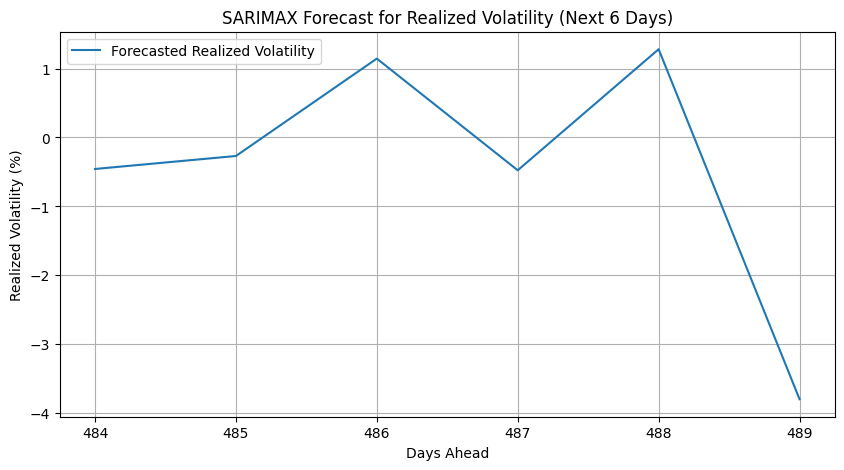

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Predicted Close Prices (Original Scale) for the Next 6 Days:
Day 1: $120.24
Day 2: $119.87
Day 3: $117.95
Day 4: $118.09
Day 5: $117.35
Day 6: $116.55


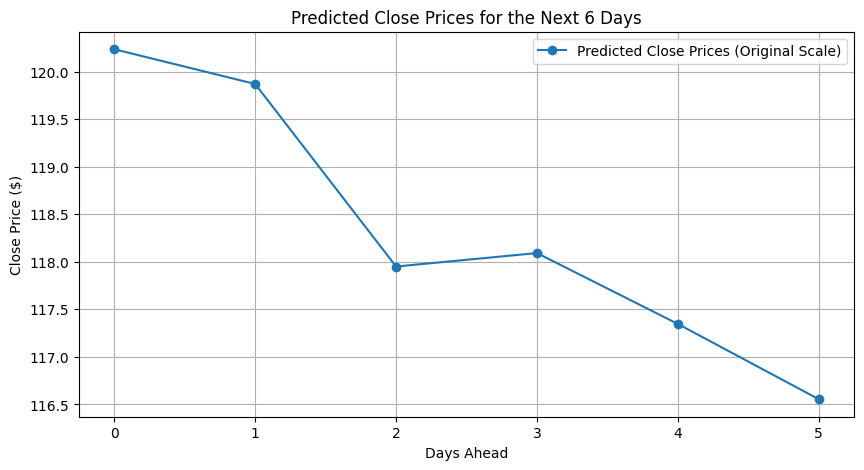

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


  0%|          | 0/93 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s

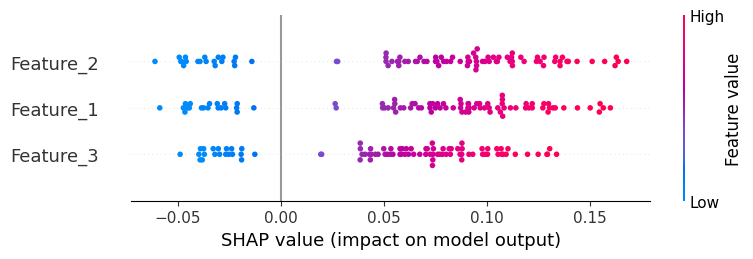


Forecasts saved to 'TSLA_Forecasts.xlsx'.


In [ ]:
# =========================================
# 1. Import Necessary Libraries
# =========================================

import yfinance as yf
import numpy as np
import pandas as pd
from ripser import ripser
from scipy.stats import wasserstein_distance
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.api import add_constant, OLS
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import shap
from pmdarima import auto_arima
import warnings
import persim
from datetime import datetime, timedelta
from sklearn.model_selection import KFold
# Suppress warnings
warnings.filterwarnings("ignore")

# =========================================
# 2. Fetch and Preprocess Data
# =========================================

ticker = "PDD"
period =="2Y"
def fetch_data(ticker=ticker, period=period):
    stock = yf.Ticker(ticker)
    data = stock.history(period=period)
    if data.empty:
        raise ValueError(f"No data fetched for ticker {ticker}. Please check the ticker symbol.")
    data.index = data.index.tz_localize(None)
    return data[['Close']].dropna()

try:
    data = fetch_data()
    print(f"Fetched data shape: {data.shape}")
except ValueError as e:
    print(e)
    exit()

data['pct_change'] = data['Close'].pct_change() * 100
data.dropna(inplace=True)
print(f"Data shape after computing pct_change and dropping NaNs: {data.shape}")

# =========================================
# 3. Merge Control Variables
# =========================================

def fetch_indicator_data(tickers, period=period):
    data_frames = []
    for ticker in tickers:
        temp = yf.Ticker(ticker).history(period=period)[['Close']]
        if temp.empty:
            print(f"Warning: No data fetched for indicator ticker {ticker}.")
            temp = pd.DataFrame(columns=[ticker], index=data.index)
        else:
            temp.columns = [ticker]
            temp.index = temp.index.tz_localize(None)
        data_frames.append(temp)
    indicators = pd.concat(data_frames, axis=1)
    print(f"Indicators data shape before merging: {indicators.shape}")
    return indicators

market_tickers = ['^VIX', 'DX-Y.NYB', '^IRX']
indicators = fetch_indicator_data(market_tickers)
data = data.merge(indicators, left_index=True, right_index=True, how='outer')
print(f"Data shape after merging indicators: {data.shape}")

data.bfill(inplace=True)
data.ffill(inplace=True)
print(f"Data shape after backfilling: {data.shape}")
# Compute Wasserstein Distance (WD)
def compute_wd(percent_changes):
    """Compute Wasserstein Distance (WD) using persistent homology diagrams."""
    wds = [np.nan]  # First value is NaN
    for i in range(2, len(percent_changes)):
        point_cloud_1 = percent_changes[i - 1:i].reshape(1, -1)
        point_cloud_2 = percent_changes[i - 2:i - 1].reshape(1, -1)

        ph_t = ripser(point_cloud_1)['dgms'][0]
        ph_t_prev = ripser(point_cloud_2)['dgms'][0]

        if len(ph_t) > 0 and len(ph_t_prev) > 0:
            wd = wasserstein_distance(ph_t.flatten(), ph_t_prev.flatten())
        else:
            wd = np.nan

        wds.append(wd)

    while len(wds) < len(percent_changes):
        wds.insert(0, np.nan)

    return np.array(wds)

# Compute WD and add to the dataset
data['WD'] = compute_wd(data['pct_change'].values)
data['WD'].fillna(0, inplace=True)  # Replace NaNs with 0
# =========================================
# 5. Compute Realized Volatility Metrics
# =========================================

data['RV_daily'] = data['pct_change'].rolling(2).std()
data['RV_weekly'] = data['pct_change'].rolling(5).std()
data['RV_monthly'] = data['pct_change'].rolling(21).std()
data.dropna(subset=['RV_daily', 'RV_weekly', 'RV_monthly'], inplace=True)
# =========================================
# 5. HAR-WD Model Implementation
# =========================================

features = ['RV_daily', 'RV_weekly', 'RV_monthly', 'WD', '^VIX', 'DX-Y.NYB', '^IRX']
X, y = data[features], data['pct_change']

scaler_1 = StandardScaler()
X_scaled = scaler_1.fit_transform(X)
X_scaled = add_constant(X_scaled)

har_wd_model = OLS(y, X_scaled).fit()
print("\nHAR-WD Model Summary:")
print(har_wd_model.summary())
# Create 'y' column with 'Close' price values
data['y'] = data['Close']  # Assign 'Close' values to 'y' column
# Scale data with MinMaxScaler
scaler = MinMaxScaler()
data[['y']] = scaler.fit_transform(data[['y']])  # Scale 'Close' prices

# =========================================
# 3. Prepare Data for LSTM
# =========================================

def prepare_data(data, window_size):
    """Prepare data for LSTM with a sliding window."""
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# =========================================
# 4. K-Fold Cross-Validation for LSTM
# =========================================

window_size = 3
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=False)

# Loop over each fold for LSTM
fold_scores = []
models = []  # To keep track of trained models
for train_index, val_index in kf.split(data):
    # Prepare training and validation data
    X_train, y_train = prepare_data(data['y'].values[train_index], window_size)
    X_val, y_val = prepare_data(data['y'].values[val_index], window_size)

    # Reshape for LSTM [samples, time steps, features]
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

    # Define and train the model
    model = Sequential()
    model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mae')
    model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val), verbose=0)

    # Evaluate on the validation set
    val_loss = model.evaluate(X_val, y_val, verbose=0)
    fold_scores.append(val_loss)
    models.append(model)  # Store the trained model
    print(f'Fold Validation Loss: {val_loss:.4f}')

# Print average validation loss
print(f'Average Validation Loss: {np.mean(fold_scores):.4f}')

# =========================================
# 5. Forecast Volatility with SARIMAX
# =========================================

# Auto-tune SARIMAX model
print("Running auto_arima to tune SARIMAX model...")
auto_model = auto_arima(
    data['pct_change'], start_p=1, max_p=3, start_q=1, max_q=3,
    seasonal=True, m=6, start_P=0, max_P=2, start_Q=0, max_Q=2, D=1,
    trace=True, stepwise=True
)

# Extract the best parameters
best_order = auto_model.order
best_seasonal_order = auto_model.seasonal_order

# Fit the SARIMAX model
sarimax_model = SARIMAX(
    data['pct_change'], order=best_order, seasonal_order=best_seasonal_order
)
sarimax_results = sarimax_model.fit()

# Forecast the next 6 days of volatility
vol_forecast = sarimax_results.get_forecast(steps=6).predicted_mean

# Plot volatility forecast
plt.figure(figsize=(10, 5))
vol_forecast.plot(label='Forecasted Realized Volatility', legend=True)
plt.xlabel('Days Ahead')
plt.ylabel('Realized Volatility (%)')
plt.title('SARIMAX Forecast for Realized Volatility (Next 6 Days)')
plt.grid(True)
plt.show()

# =========================================
# 6. Predict Prices for the Next 6 Days
# =========================================

# Prepare data for future predictions
X_future = data['y'].values[-window_size:].reshape((1, window_size, 1))

# Predict the next 6 values
predicted_prices = []
for _ in range(6):
    pred_scaled = model.predict(X_future)
    predicted_prices.append(pred_scaled[0][0])  # Store predicted price
    # Update the input for the next prediction
    X_future = np.append(X_future[:, 1:, :], pred_scaled.reshape((1, 1, 1)), axis=1)

# Inverse transform to original scale
predicted_prices_original = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1)).flatten()

# Print predicted prices in the original scale
print("\nPredicted Close Prices (Original Scale) for the Next 6 Days:")
for i, price in enumerate(predicted_prices_original, 1):
    print(f"Day {i}: ${price:.2f}")

# Plot predicted prices
plt.figure(figsize=(10, 5))
plt.plot(predicted_prices_original, label='Predicted Close Prices (Original Scale)', marker='o')
plt.xlabel('Days Ahead')
plt.ylabel('Close Price ($)')
plt.title('Predicted Close Prices for the Next 6 Days')
plt.legend()
plt.grid(True)
plt.show()


# =========================================
# 7. SHAP Interpretation of LSTM Predictions
# =========================================

# Reshape input for SHAP compatibility
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_val_reshaped = X_val.reshape(X_val.shape[0], -1)

# Generate feature names
feature_names = [f'Feature_{i+1}' for i in range(X_val_reshaped.shape[1])]

def model_predict(X):
    """Predict wrapper for SHAP."""
    X = X.reshape((X.shape[0], window_size, 1))
    return model.predict(X).reshape(-1, 1)

# Create SHAP explainer and compute SHAP values
explainer = shap.KernelExplainer(model_predict, shap.sample(X_train_reshaped, 100))
shap_values = explainer.shap_values(X_val_reshaped)
shap.summary_plot(np.array(shap_values).squeeze(-1), X_val_reshaped, feature_names=feature_names)

# =========================================
# 8. Save Forecasts to Excel
# =========================================

# Create future dates for forecast
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=6, freq='B').tz_localize(None)

# Save predicted prices to Excel
forecast_results = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Close': predicted_prices_original
})
forecast_results.to_excel('TSLA_Forecasts.xlsx', index=False)

print(f"\nForecasts saved to 'TSLA_Forecasts.xlsx'.")


Fetched data shape: (4437, 2)
Data shape after computing pct_change and dropping NaNs: (4436, 3)
Indicators data shape before merging: (16435, 3)
Data shape after merging indicators: (4436, 6)
Data shape after backfilling and forwardfilling: (4436, 6)
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Length of wd_values before padding: 4426
Updated WD values summary with direct calculation:
count    4426.000000
mean        0.060075
std         0.058136
min         0.000000
25%         0.024761
50%         0.040025
75%         0.074896
max         0.506309
Name: WD, dtype: float64
Unique WD values: [       nan 0.08757991 0.04867089 ... 0.34842637 0.36145078 0.        ]


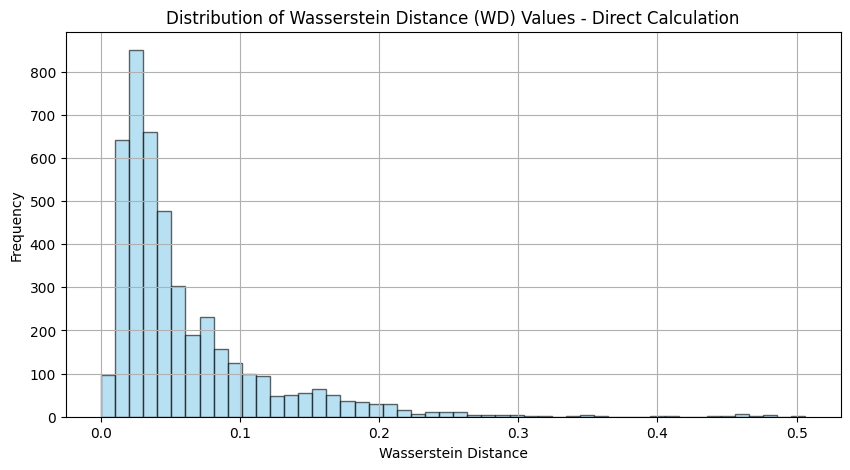

Data shape after computing WD: (4436, 7)
Data shape after handling WD infinities and NaNs: (4436, 7)
Data shape after computing Realized Volatility Metrics: (4436, 10)
Dropped 0 rows due to NaNs in volatility metrics.
Data shape after dropping NaNs in volatility metrics: (4436, 10)
Features shape: (4436, 8)
Target shape: (4436,)
X_scaled shape after scaling and handling NaNs: (4436, 8)

HAR-WD Model Summary:
                            OLS Regression Results                            
Dep. Variable:             pct_change   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     10.36
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           1.81e-14
Time:                        20:24:43   Log-Likelihood:                -12036.
No. Observations:                4436   AIC:                         2.409e+04
Df Residuals:                    44

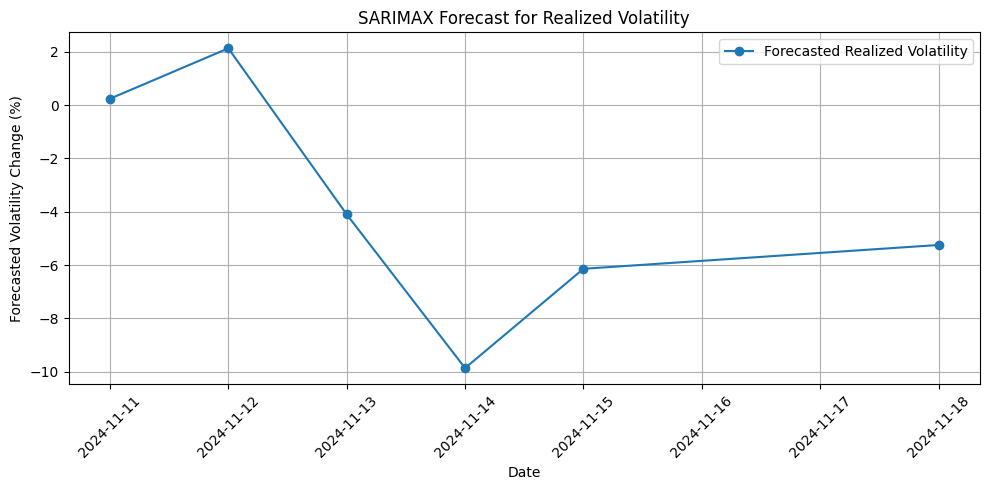


Training LSTM model...
Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1439
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0077
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0042
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0046
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0043
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0044
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0041
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0036
Epoch 9/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0039
Epoch 10/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0037
LSTM model training complete.
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


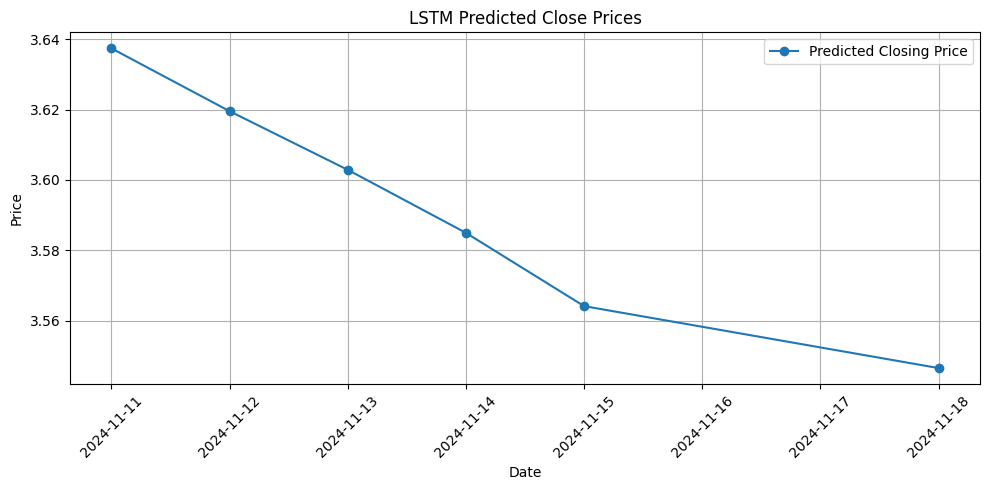

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


  0%|          | 0/20 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
313/313 ━━━━━━

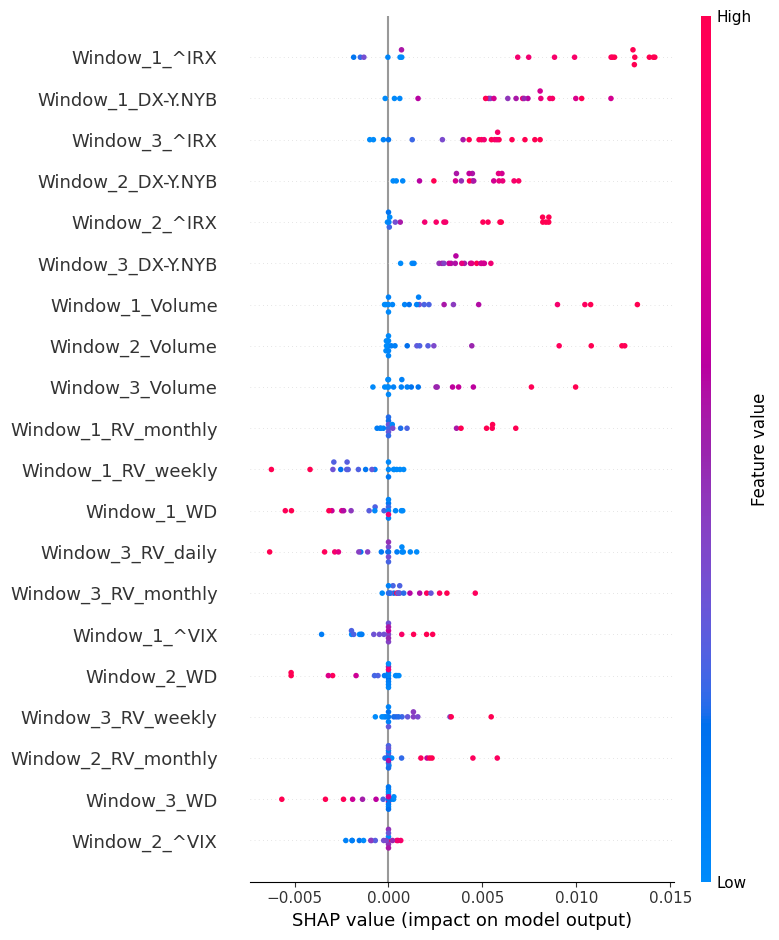

In [ ]:
# =========================================
# 1. Import Necessary Libraries
# =========================================

import yfinance as yf
import numpy as np
import pandas as pd
from ripser import ripser, Rips # Make sure to import Rips from ripser
from scipy.stats import wasserstein_distance
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.api import add_constant, OLS
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import shap
from pmdarima import auto_arima
import warnings
import persim
from datetime import datetime, timedelta
# Suppress warnings
warnings.filterwarnings("ignore")
import seaborn as sns # Import seaborn
from scipy.stats import wasserstein_distance
# =========================================
# 2. Fetch and Preprocess Data
# =========================================

ticker = "SMCI"
period ="max"
def fetch_data(ticker=ticker, period=period):
    stock = yf.Ticker(ticker)
    data = stock.history(period=period)
    if data.empty:
        raise ValueError(f"No data fetched for ticker {ticker}. Please check the ticker symbol.")
    data.index = data.index.tz_localize(None)
    return data[['Close', 'Volume']].dropna()

try:
    data = fetch_data()
    print(f"Fetched data shape: {data.shape}")
except ValueError as e:
    print(e)
    exit()

data['pct_change'] = data['Close'].pct_change() * 100
data.dropna(inplace=True)
print(f"Data shape after computing pct_change and dropping NaNs: {data.shape}")

# =========================================
# 3. Merge Control Variables
# =========================================

def fetch_indicator_data(tickers, period=period):
    data_frames = []
    for ticker in tickers:
        temp = yf.Ticker(ticker).history(period=period)[['Close']]
        if temp.empty:
            print(f"Warning: No data fetched for indicator ticker {ticker}.")
            temp = pd.DataFrame(columns=[ticker], index=data.index)
        else:
            temp.columns = [ticker]
            temp.index = temp.index.tz_localize(None)
        data_frames.append(temp)
    indicators = pd.concat(data_frames, axis=1)
    print(f"Indicators data shape before merging: {indicators.shape}")
    return indicators

market_tickers = ['^VIX', 'DX-Y.NYB', '^IRX']
indicators = fetch_indicator_data(market_tickers)
data = data.merge(indicators, left_index=True, right_index=True, how='inner')
print(f"Data shape after merging indicators: {data.shape}")

data.bfill(inplace=True)
data.ffill(inplace=True)
print(f"Data shape after backfilling and forwardfilling: {data.shape}")


# =========================================
# 4. Improved Wasserstein Distance Calculation
# =========================================

# Define window size for computing persistence diagrams
window_size = 10  # Adjust this as per your requirement

# Function to compute Wasserstein distances between persistence diagrams
def compute_wasserstein_distance(data_frame, window_size=20):
    """
    Compute the Wasserstein distances between persistence diagrams of
    log-returns over consecutive time windows.

    :param data_frame: DataFrame with the stock data (assumed to have a 'Close' column)
    :param window_size: Size of the time window for computing persistence diagrams
    :return: Array of Wasserstein distances
    """
    # Calculate log-returns
    prices = data_frame['Close'].to_numpy()
    log_returns = np.log(np.divide(prices[1:], prices[:len(prices) - 1]))

    # Initialize the Rips object for computing persistence diagrams
    rips = Rips(maxdim=2)

    # Number of windows (segments) to consider
    n = len(log_returns) - window_size + 1

    # Array to store Wasserstein distances
    wasserstein_dists = np.zeros((n, 1))

    # Loop over all time windows and compute Wasserstein distances
    for i in range(n):
        # Create a window of log-returns (reshape to 2D)
        window1 = log_returns[i:i + window_size].reshape(-1, 1)  # Reshaping to 2D array
        window2 = log_returns[i + window_size:i + 2 * window_size].reshape(-1, 1)  # Reshaping to 2D array

        # Check that the window contains valid data before passing to ripser
        if window1.shape[0] == 0 or window2.shape[0] == 0:
            print(f"Warning: Empty window encountered at index {i}. Skipping...")
            continue

        # Compute persistence diagrams for two consecutive windows
        dgm1 = rips.fit_transform(window1)
        dgm2 = rips.fit_transform(window2)

        # Compute Wasserstein distance between the diagrams of the two windows
        wasserstein_dists[i] = persim.wasserstein(dgm1[0], dgm2[0], matching=False)

    return wasserstein_dists

# =========================================
# Compute the Wasserstein distances
# =========================================

try:
    wd_values = compute_wasserstein_distance(data, window_size=window_size)
    print(f"Length of wd_values before padding: {len(wd_values)}")
except Exception as e:
    print(f"Error during Wasserstein distance computation: {e}")
    wd_values = np.array([])  # Return an empty array in case of failure

# =========================================
# Handle Padding or Trimming of wd_values
# =========================================

# Define the expected length (data length - window_size)
expected_length = len(data) - window_size

# Padding or trimming wd_values to match the expected length
if len(wd_values) < expected_length:
    padding_needed = expected_length - len(wd_values)
    wd_values = np.concatenate([np.nan * np.ones(padding_needed), wd_values])
    print(f"Padding wd_values. New length: {len(wd_values)}")
elif len(wd_values) > expected_length:
    wd_values = wd_values[:expected_length]
    print(f"Trimming wd_values. New length: {len(wd_values)}")

# =========================================
# Assign Wasserstein Distances to DataFrame
# =========================================

# Now assign the computed Wasserstein distances to the 'WD' column
data['WD'] = np.nan  # Initialize with NaN for alignment

# Ensure wd_values is flattened before assignment (from shape (492, 1) to (492,))
wd_values = wd_values.flatten()

# Start assigning from window_size-th row
data['WD'].iloc[window_size:] = wd_values

print("Updated WD values summary with direct calculation:")
print(data['WD'].describe())

print("Unique WD values:", data['WD'].unique())


# =========================================
# Visualize WD Value Distribution
# =========================================

# Plot the histogram to visualize the distribution
plt.figure(figsize=(10, 5))
plt.hist(data['WD'].dropna(), bins=50, alpha=0.6, color='skyblue', edgecolor='black')
plt.title("Distribution of Wasserstein Distance (WD) Values - Direct Calculation")
plt.xlabel("Wasserstein Distance")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

print(f"Data shape after computing WD: {data.shape}")

# Clean up WD column (handling NaNs, infinities, etc.)
data['WD'].replace([np.inf, -np.inf], np.nan, inplace=True)
data['WD'].fillna(0, inplace=True)

print(f"Data shape after handling WD infinities and NaNs: {data.shape}")

# =========================================
# 5. Compute Realized Volatility Metrics
# =========================================

data['RV_daily'] = data['pct_change'].rolling(window=2).std()
data['RV_weekly'] = data['pct_change'].rolling(window=5).std()
data['RV_monthly'] = data['pct_change'].rolling(window=21).std()

print(f"Data shape after computing Realized Volatility Metrics: {data.shape}")

data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)
initial_shape = data.shape
data.dropna(subset=['RV_daily', 'RV_weekly', 'RV_monthly'], inplace=True)
print(f"Dropped {initial_shape[0] - data.shape[0]} rows due to NaNs in volatility metrics.")
print(f"Data shape after dropping NaNs in volatility metrics: {data.shape}")

# =========================================
# 6. HAR-WD Model Implementation
# =========================================

features = ['RV_daily', 'RV_weekly', 'RV_monthly', 'WD', '^VIX', 'DX-Y.NYB', '^IRX','Volume']
X, y = data[features], data['pct_change']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
X_scaled = np.nan_to_num(X_scaled)
print(f"X_scaled shape after scaling and handling NaNs: {X_scaled.shape}")

X_scaled = add_constant(X_scaled)
har_wd_model = OLS(y, X_scaled).fit()
print("\nHAR-WD Model Summary:")
print(har_wd_model.summary())

# =========================================
# 7. SARIMAX Forecast for Realized Volatility
# =========================================

auto_model = auto_arima(data['pct_change'], start_p=1, max_p=3, start_q=1, max_q=3,
                        seasonal=True, m=6, start_P=0, max_P=2, start_Q=0, max_Q=2, D=1, trace=True, stepwise=True)

best_order, best_seasonal_order = auto_model.order, auto_model.seasonal_order
print(f"Best ARIMA order: {best_order}, Best seasonal order: {best_seasonal_order}")

sarimax_model = SARIMAX(data['pct_change'], order=best_order, seasonal_order=best_seasonal_order)
sarimax_results = sarimax_model.fit()
vol_forecast = sarimax_results.get_forecast(steps=6).predicted_mean

# Get the local date without timezone offsets and set tomorrow as the start date
start_date = datetime.now().replace(hour=0, minute=0, second=0, microsecond=0) + timedelta(days=0)
print(start_date)

# Create a 6-day date range starting from tomorrow, using business days
forecast_dates = pd.date_range(start=start_date, periods=6, freq='B')

# Plot SARIMAX Forecast with consistent dates
plt.figure(figsize=(10, 5))
plt.plot(forecast_dates, vol_forecast[:6], label='Forecasted Realized Volatility', marker='o')
plt.title('SARIMAX Forecast for Realized Volatility')
plt.xlabel('Date')
plt.ylabel('Forecasted Volatility Change (%)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# =========================================
# 8. Prepare Data for LSTM Model
# =========================================

data = data[features + ['pct_change', 'Close']].dropna()
X, y = data[features], data['pct_change']

scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

window_size = 3

def prepare_lstm_data(X, y, window_size):
    X_lstm, y_lstm = [], []
    for i in range(window_size, len(X)):
        X_lstm.append(X[i - window_size:i])
        y_lstm.append(y[i])
    return np.array(X_lstm), np.array(y_lstm)

X_lstm, y_lstm = prepare_lstm_data(X_scaled, y_scaled, window_size)

train_size = int(0.8 * len(X_lstm))
X_train, X_test = X_lstm[:train_size], X_lstm[train_size:]
y_train, y_test = y_lstm[:train_size], y_lstm[train_size:]

# =========================================
# 9. Train LSTM Model
# =========================================

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

print("\nTraining LSTM model...")
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
print("LSTM model training complete.")

# =========================================
# 10. Predict Future Prices
# =========================================

y_pred_scaled = model.predict(X_test)
predicted_pct_change = scaler_y.inverse_transform(y_pred_scaled).flatten()

predicted_closes = []
last_known_close = data['Close'].iloc[train_size + window_size - 1]
current_close = last_known_close

for pct in predicted_pct_change:
    next_close = current_close * (1 + pct / 100)
    predicted_closes.append(next_close)
    current_close = next_close



# Assuming the LSTM forecast also has 6 points or needs to be aligned to the 6-day range
plt.figure(figsize=(10, 5))
plt.plot(forecast_dates, predicted_closes[:6], label='Predicted Closing Price', marker='o')
plt.title('LSTM Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# =========================================
# 11. SHAP Interpretation with Kernel SHAP
# =========================================

X_test_flat = X_test.reshape(X_test.shape[0], -1)
X_train_flat = X_train.reshape(X_train.shape[0], -1)

sample_size = min(100, X_train_flat.shape[0])
random_indices = np.random.choice(X_train_flat.shape[0], sample_size, replace=False)
X_train_sample = X_train_flat[random_indices]

def lstm_predict(x):
    x_reshaped = x.reshape(x.shape[0], window_size, X_train.shape[2])
    return model.predict(x_reshaped).flatten()

explainer = shap.KernelExplainer(lstm_predict, X_train_sample)

shap_sample_size = min(20, X_test_flat.shape[0])
shap_test_indices = np.random.choice(X_test_flat.shape[0], shap_sample_size, replace=False)
X_test_sample = X_test_flat[shap_test_indices]

shap_values = explainer.shap_values(X_test_sample, nsamples=100)

window_feature_names = [f'Window_{w+1}_{feature}' for w in range(window_size) for feature in features]
shap.summary_plot(shap_values, X_test_sample, feature_names=window_feature_names)


In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.6 MB/s eta 0:00:00


In [ ]:
pip install ripser

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 834.5/834.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 1.2 MB/s eta 0:00:00
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18102 sha256=b510ba80d53c424ea3ef1bbb72b94b218ca2dac97196694b9fe15d2e85638cce
  Stored in directory: /root/.cache/pip/wheels/ef/0f/3b/0f931844eecc34addd90e72d54cd39c08b7066c5f25c00b9a4
Successfully built hopcroftkarp


Fetched data shape: (1584, 2)
Data shape after computing pct_change and dropping NaNs: (1583, 3)
Indicators data shape before merging: (1582, 3)
Data shape after merging indicators: (1582, 6)
Data shape after recalculating and filtering to non-NaN pct_change rows: (1581, 6)
Length of wd_values before padding: 1580
Trimming wd_values. New length: 1576
Updated WD values summary:
count    1576.000000
mean        2.280025
std         2.886645
min         0.000000
25%         0.529999
50%         1.320004
75%         2.992504
max        39.869995
Name: WD, dtype: float64
Unique WD values: [           nan 9.00001526e-02 2.28000069e+00 6.49999619e-01
 5.90000153e-01 1.09000015e+00 7.29999542e-01 6.19998932e-01
 2.70000458e-01 4.89999771e-01 6.99996948e-02 4.40000534e-01
 1.29999924e+00 1.34000015e+00 4.00009155e-02 4.99992371e-02
 2.00000763e-01 3.50000381e-01 1.95000076e+00 3.70000839e-01
 1.60999870e+00 3.15999985e+00 1.36000061e+00 1.39999962e+00
 3.10001373e-01 4.59999084e-01 1.70000076e-

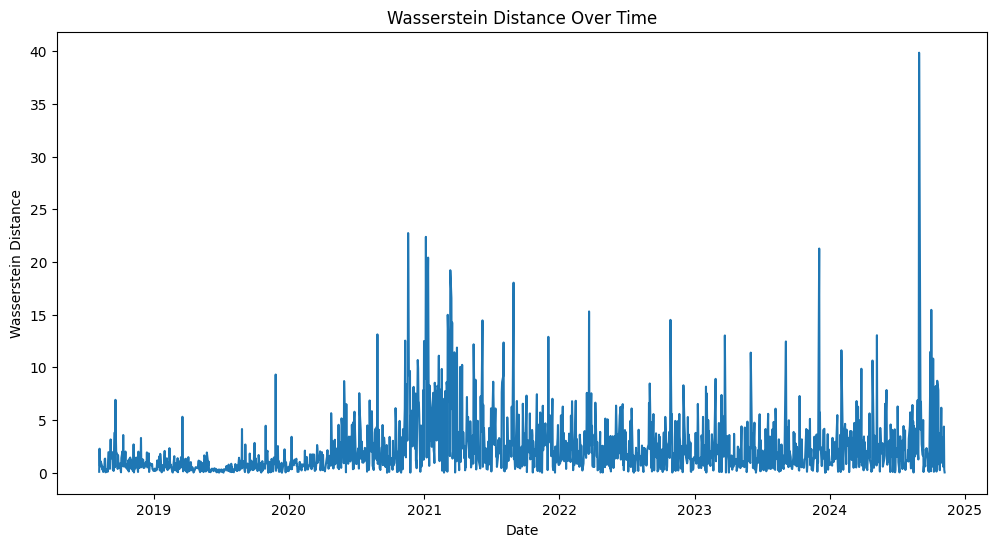

Length of data: 1581
Length of wd_values: 1576


In [ ]:

import yfinance as yf
import numpy as np
import pandas as pd
from ripser import ripser
from scipy.stats import wasserstein_distance
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.api import add_constant, OLS
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import shap
from pmdarima import auto_arima
import warnings
import seaborn as sns  # Import seaborn
from datetime import datetime, timedelta
import persim

# Suppress warnings
warnings.filterwarnings("ignore")


# =========================================
# 2. Fetch and Preprocess Data
# =========================================

ticker = "PDD"
period = "max"

def fetch_data(ticker=ticker, period=period):
    stock = yf.Ticker(ticker)
    data = stock.history(period=period)
    if data.empty:
        raise ValueError(f"No data fetched for ticker {ticker}. Please check the ticker symbol.")
    data.index = data.index.tz_localize(None)
    return data[['Close', 'Volume']].dropna()

try:
    data = fetch_data()
    print(f"Fetched data shape: {data.shape}")
except ValueError as e:
    print(e)
    exit()

data['pct_change'] = data['Close'].pct_change() * 100
data.dropna(inplace=True)
print(f"Data shape after computing pct_change and dropping NaNs: {data.shape}")

# =========================================
# 3. Merge Control Variables
# =========================================

def fetch_indicator_data(tickers, start_date, end_date): # Use start_date, end_date
    data_frames = []
    for ticker in tickers:
        temp = yf.Ticker(ticker).history(start=start_date, end=end_date)[['Close']]  # Fetch within stock data date range
        if temp.empty:
            print(f"Warning: No data fetched for indicator ticker {ticker}.")
            temp = pd.DataFrame(columns=[ticker], index=data.index)
        else:
            temp.columns = [ticker]
            temp.index = temp.index.tz_localize(None)
        data_frames.append(temp)
    indicators = pd.concat(data_frames, axis=1)
    print(f"Indicators data shape before merging: {indicators.shape}")
    return indicators

market_tickers = ['^VIX', 'DX-Y.NYB', '^IRX']
start_date = data.index.min()  # Get stock data start date
end_date = data.index.max()    # Get stock data end date
indicators = fetch_indicator_data(market_tickers, start_date, end_date)

data = data.merge(indicators, left_index=True, right_index=True, how='inner') # Use 'inner' join
print(f"Data shape after merging indicators: {data.shape}")

# Recalculate pct_change after merging to remove forward/backward filled values
data['pct_change'] = data['Close'].pct_change() * 100

# Drop rows where pct_change is NaN
data.dropna(subset=['pct_change'], inplace=True)

# Confirm the filtering worked by checking the data shape
print(f"Data shape after recalculating and filtering to non-NaN pct_change rows: {data.shape}")


# =========================================
# Compute Wasserstein Distances
# =========================================


# =========================================
# Ensure Alignment of Lengths
# =========================================

def compute_wasserstein_distance(data_frame):
    """
    Compute the Wasserstein distances between consecutive 'Close' price values.
    The function assumes 'Close' is the column to use for distance computation.
    """
    distances = []
    for i in range(1, len(data_frame)):
        prev_close = data_frame['Close'].iloc[i-1]
        curr_close = data_frame['Close'].iloc[i]
        # Compute Wasserstein distance (a simple univariate case)
        distance = wasserstein_distance([prev_close], [curr_close])
        distances.append(distance)
    return np.array(distances)

# Compute Wasserstein distances
wd_values = compute_wasserstein_distance(data)
print(f"Length of wd_values before padding: {len(wd_values)}")

# =========================================
# 5. Handle Padding or Trimming of wd_values
# =========================================

# Define the expected length (data length - window_size)
window_size = 5  # Adjust window size as per your model
expected_length = len(data) - window_size

# Padding or trimming wd_values to match the expected length
if len(wd_values) < expected_length:
    padding_needed = expected_length - len(wd_values)
    wd_values = np.concatenate([np.nan * np.ones(padding_needed), wd_values])
    print(f"Padding wd_values. New length: {len(wd_values)}")
elif len(wd_values) > expected_length:
    wd_values = wd_values[:expected_length]
    print(f"Trimming wd_values. New length: {len(wd_values)}")

# =========================================
# 6. Assign Wasserstein Distances to DataFrame
# =========================================

# Now assign the computed Wasserstein distances to the 'WD' column
data['WD'] = np.nan  # Initialize with NaN for alignment
data['WD'].iloc[window_size:] = wd_values  # Start assigning from window_size-th row
# Check the result
print("Updated WD values summary:")
print(data['WD'].describe())
print("Unique WD values:", data['WD'].unique())



# If needed, plot the Wasserstein distances over time
plt.figure(figsize=(12, 6))
plt.plot(data.index[window_size:], data['WD'].iloc[window_size:])
plt.title('Wasserstein Distance Over Time')
plt.xlabel('Date')
plt.ylabel('Wasserstein Distance')
plt.show()
print(f"Length of data: {len(data)}")
print(f"Length of wd_values: {len(wd_values)}")



In [ ]:
pip install ripser

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 834.5/834.5 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.3 MB/s eta 0:00:00
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18102 sha256=5692fd831989e7d6f026bad581840ded4ca9e959974455044168a41ce33dfc7e
  Stored in directory: /root/.cache/pip/wheels/ef/0f/3b/0f931844eecc34addd90e72d54cd39c08b7066c5f25c00b9a4
Successfully built hopcroftkarp


[*********************100%***********************]  1 of 1 completed


Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


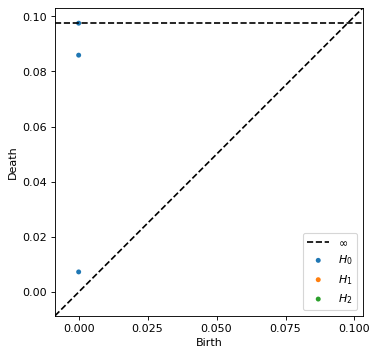

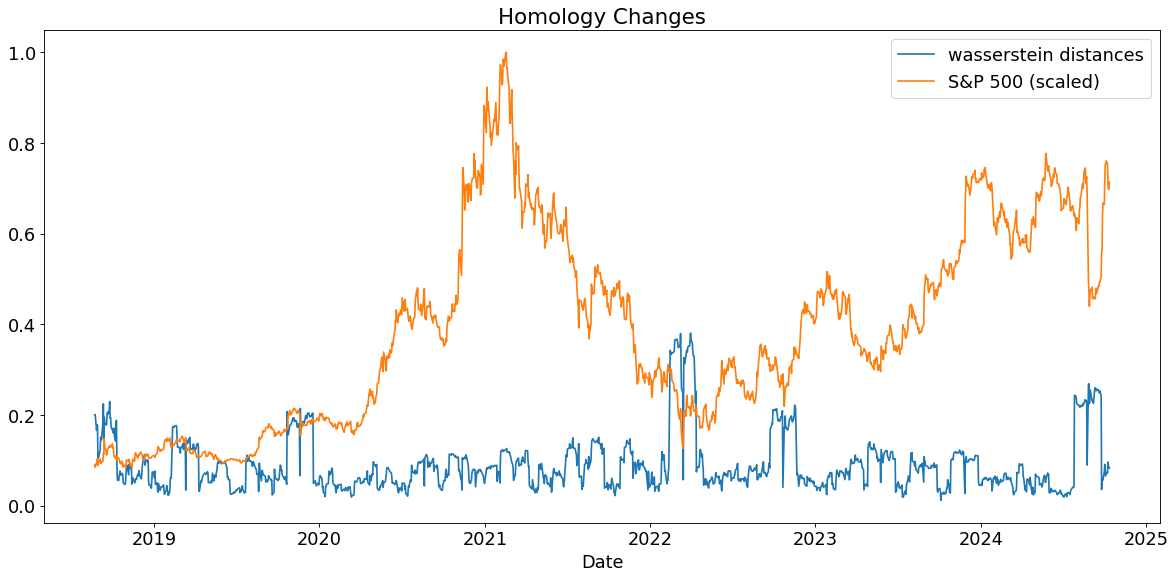

In [ ]:
"""

@author: Hugo Gobato Souto
International School of Business at HAN University of Applied Sciences, Ruitenberglaan 31, 6826 CC Arnhem, the Netherlands;
H.GobatoSouto@han.nl; https://orcid.org/0000-0002-7039-0572
"""

# This algorithm requires the installment of ripster library
# One can do so by !pip install ripser

import yfinance as yf
import numpy as np
import pandas as pd

from ripser import Rips
import persim

import matplotlib.pyplot as plt

# Using Yahoo Finance's API
# define index names: E.g. ^GSPC = S&P 500, ^DJI = DOW Jones, ^RUT = Russell 2000
index_names = ['PDD']

# define date range: E.g from 2000-01-01 until 2022-03-30
start_date_string = "2000-01-01"
end_date_string = "2024-11-08"

# pull data from yahoo finance
raw_data = yf.download(index_names, start=start_date_string, end=end_date_string)

#Using own stock data in Excel
#raw_data = pd.read_excel("Doc.xlsx", index_col='Date')
#or CSV
#raw_data = pd.read_csv("Doc.csv", index_col='Date')

# cleaning data and keeping only adjusted closing prices
df_close = raw_data['Adj Close'].dropna(axis='rows')

# define array of adjusted closing prices
P = df_close.to_numpy()
# define array of log-returns defined as the log of the ratio between closing values of two subsequent days
r = np.log(np.divide(P[1:],P[:len(P)-1]))

# Instantiate Vietoris-Rips solver
rips = Rips(maxdim = 2)

#D=number of considered days for Homology Persistence Diagram
D=3
dgm = rips.fit_transform(r[0:D])

plt.figure(figsize=(5, 5), dpi=80)
plt.rcParams.update({'font.size': 10})
persim.plot_diagrams(dgm)

#plt.savefig("homology_persistence-diagram.png", dpi='figure', format=None, metadata=None,
#        bbox_inches=None, pad_inches=0.1,
#       facecolor='white', edgecolor='auto')

# Instantiate Vietoris-Rips solver again if you wish to change the number of considered dimensions
#rips = Rips(maxdim = 2)

# some parameters
w = 20 # time window size
n = len(df_close)-(2*w)+1 # number of time segments. Here a whole business month was chosen
wasserstein_dists = np.zeros((n,1)) # initialize array for wasserstein distances

# compute wasserstein distances between persistence diagrams for subsequent time windows
for i in range(n):

    # Compute persistence diagrams for adjacent time windows
    dgm1 = rips.fit_transform(r[i:i+w])
    dgm2 = rips.fit_transform(r[i+w+1:i+(2*w)+1])

    # Compute wasserstein distance between diagrams
    wasserstein_dists[i] = persim.wasserstein(dgm1[0], dgm2[0], matching=False)

# plot wasserstein distances over time if you wish. Here they are plotted together with S&P 500 scaled prices
plt.figure(figsize=(18, 8), dpi=80)
plt.rcParams.update({'font.size': 16})

plt.plot(raw_data.index[w:n+w],wasserstein_dists)
plt.plot(raw_data.index[w:n+w],df_close.iloc[w:n+w,0]/max(df_close.iloc[w:n+w,0]))
plt.legend(['wasserstein distances', 'S&P 500 (scaled)', 'Crash of 2020'])
plt.xlabel('Date')
plt.title('Homology Changes')
plt.show()

# Save data
Data={"Date": df_close.index[w:n+w],
      "wasserstein_dists":wasserstein_dists.reshape(len(wasserstein_dists))}
df=pd.DataFrame(data=Data)
df.to_csv("wasserstein_dists.csv")

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.5 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death time

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/persim/wasserstein.py:51: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/persim/wasserstein.py:61: UserWarning: dgm2 has points with non-finite death times;ignoring those p

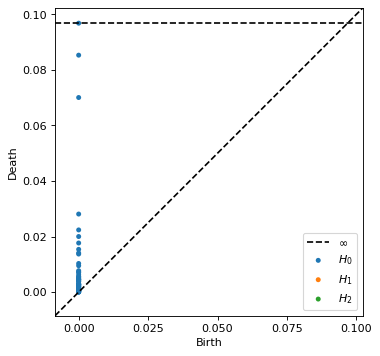

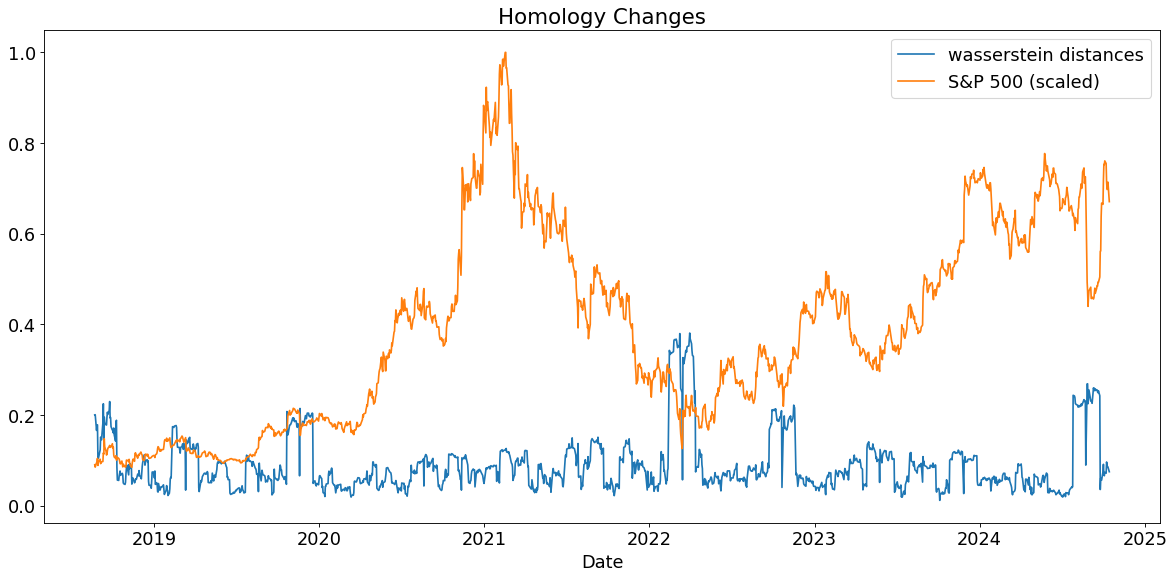

In [ ]:
"""

@author: Hugo Gobato Souto
International School of Business at HAN University of Applied Sciences, Ruitenberglaan 31, 6826 CC Arnhem, the Netherlands;
H.GobatoSouto@han.nl; https://orcid.org/0000-0002-7039-0572
"""

# This algorithm requires the installment of ripster library
# One can do so by !pip install ripser

import yfinance as yf
import numpy as np
import pandas as pd

from ripser import Rips
import persim

import matplotlib.pyplot as plt

# Using Yahoo Finance's API
# define index names: E.g. ^GSPC = S&P 500, ^DJI = DOW Jones, ^RUT = Russell 2000
index_names = ['PDD']

# define date range: E.g from 2000-01-01 until 2022-03-30
start_date_string = "2018-01-01"
end_date_string = "2024-11-10"

# pull data from yahoo finance
raw_data = yf.download(index_names, start=start_date_string, end=end_date_string)

#Using own stock data in Excel
#raw_data = pd.read_excel("Doc.xlsx", index_col='Date')
#or CSV
#raw_data = pd.read_csv("Doc.csv", index_col='Date')

# cleaning data and keeping only adjusted closing prices
df_close = raw_data['Adj Close'].dropna(axis='rows')

# define array of adjusted closing prices
P = df_close.to_numpy()
# define array of log-returns defined as the log of the ratio between closing values of two subsequent days
r = np.log(np.divide(P[1:],P[:len(P)-1]))

# Instantiate Vietoris-Rips solver
rips = Rips(maxdim = 2)

#D=number of considered days for Homology Persistence Diagram
D=60
dgm = rips.fit_transform(r[0:D])

plt.figure(figsize=(5, 5), dpi=80)
plt.rcParams.update({'font.size': 10})
persim.plot_diagrams(dgm)

#plt.savefig("homology_persistence-diagram.png", dpi='figure', format=None, metadata=None,
#        bbox_inches=None, pad_inches=0.1,
#       facecolor='white', edgecolor='auto')

# Instantiate Vietoris-Rips solver again if you wish to change the number of considered dimensions
#rips = Rips(maxdim = 2)

# some parameters
w = 20 # time window size
n = len(df_close)-(2*w)+1 # number of time segments. Here a whole business month was chosen
wasserstein_dists = np.zeros((n,1)) # initialize array for wasserstein distances

# compute wasserstein distances between persistence diagrams for subsequent time windows
for i in range(n):

    # Compute persistence diagrams for adjacent time windows
    dgm1 = rips.fit_transform(r[i:i+w])
    dgm2 = rips.fit_transform(r[i+w+1:i+(2*w)+1])

    # Compute wasserstein distance between diagrams
    wasserstein_dists[i] = persim.wasserstein(dgm1[0], dgm2[0], matching=False)

# plot wasserstein distances over time if you wish. Here they are plotted together with S&P 500 scaled prices
plt.figure(figsize=(18, 8), dpi=80)
plt.rcParams.update({'font.size': 16})

plt.plot(raw_data.index[w:n+w],wasserstein_dists)
plt.plot(raw_data.index[w:n+w],df_close.iloc[w:n+w,0]/max(df_close.iloc[w:n+w,0]))
plt.legend(['wasserstein distances', 'S&P 500 (scaled)', 'Crash of 2020'])
plt.xlabel('Date')
plt.title('Homology Changes')
plt.show()

# Save data
Data={"Date": df_close.index[w:n+w],
      "wasserstein_dists":wasserstein_dists.reshape(len(wasserstein_dists))}
df=pd.DataFrame(data=Data)
df.to_csv("wasserstein_dists.csv")

In [ ]:
!pip install persim